In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, gc, joblib, marshal
warnings.filterwarnings('ignore')
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.linear_model import LinearRegression, PassiveAggressiveRegressor, Lasso, Ridge, ElasticNet, HuberRegressor, ARDRegression, RANSACRegressor, TweedieRegressor, PoissonRegressor, BayesianRidge, SGDRegressor, GammaRegressor, TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from scipy.stats import probplot
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_regression, RFE, SequentialFeatureSelector
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = pd.read_csv('concrete_data.csv')
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age  Strength  
0            1040.0           676.0   28     79.99  
1            1055.0           676.0   28     61.89  
2             932.0           594.0  270     40.27  
3             932.0           594.0  365     41.05  
4             978.4           825.5  360     44.30

In [3]:
df.shape

(1030, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.204660        972.918932      773.580485    45.662136   
std            5.973841         77.753954       80.175980    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.400000        968.000000      779.500000    28.000000   
75%           10.200000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

          Strength  
count  1030.000000  
mean     35.817961  
std      16.705742  
min       2.330000  
25%      23.710000  
50%      34.445000  
75%      46.135000  
max      82.600000

In [6]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [7]:
df.duplicated().sum()

25

In [8]:
df = df.drop_duplicates()
df.shape

(1005, 9)

Skewness of Cement: 0.5649589710818717
Kurtosis of Cement: -0.4324579679178684


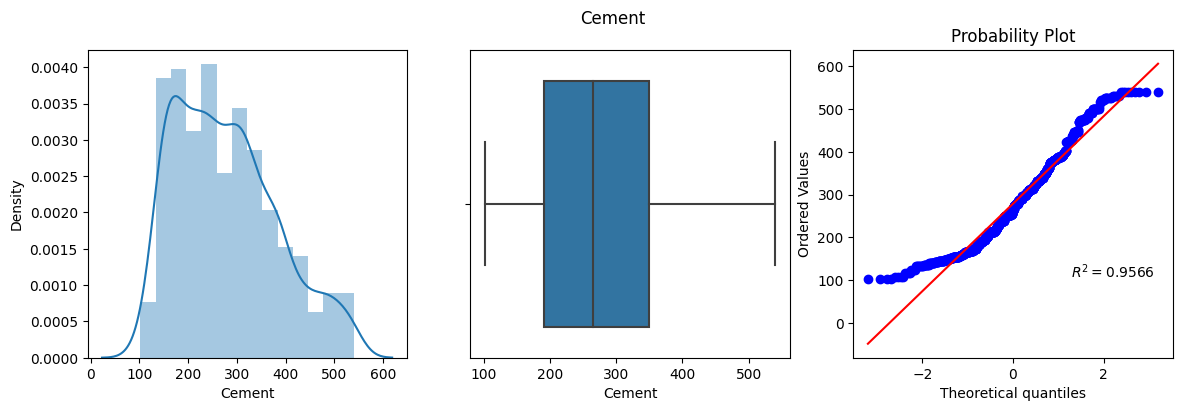

Skewness of Blast Furnace Slag: 0.8552248976041229
Kurtosis of Blast Furnace Slag: -0.4071793829767163


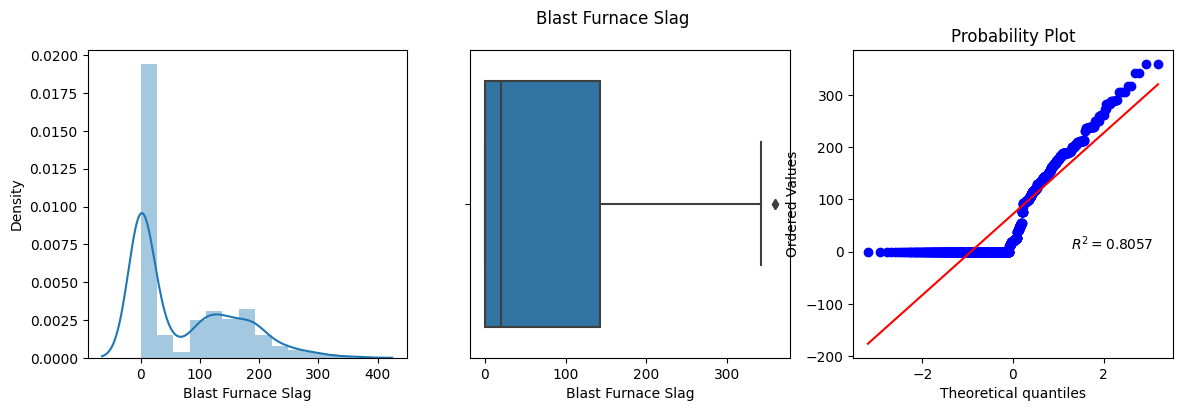

Skewness of Fly Ash: 0.4972312662135868
Kurtosis of Fly Ash: -1.3666936376512488


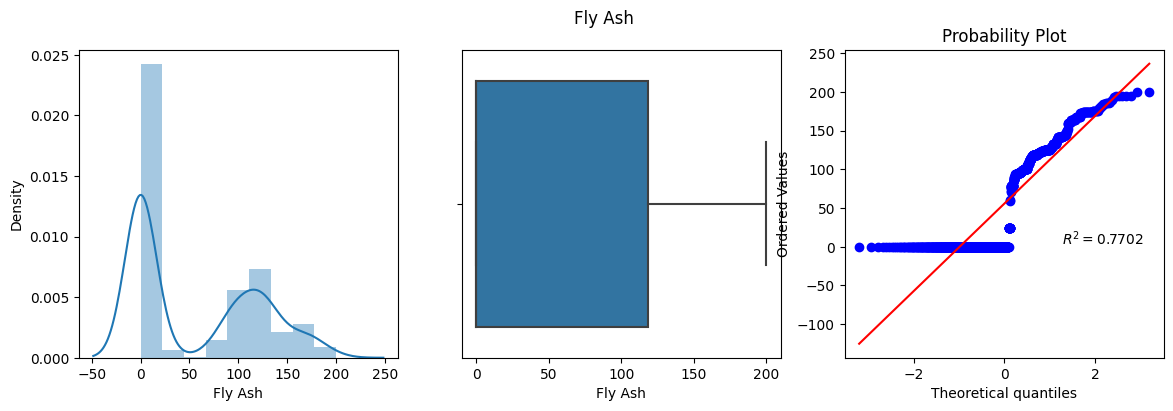

Skewness of Water: 0.034433208021637955
Kurtosis of Water: 0.16732903836419455


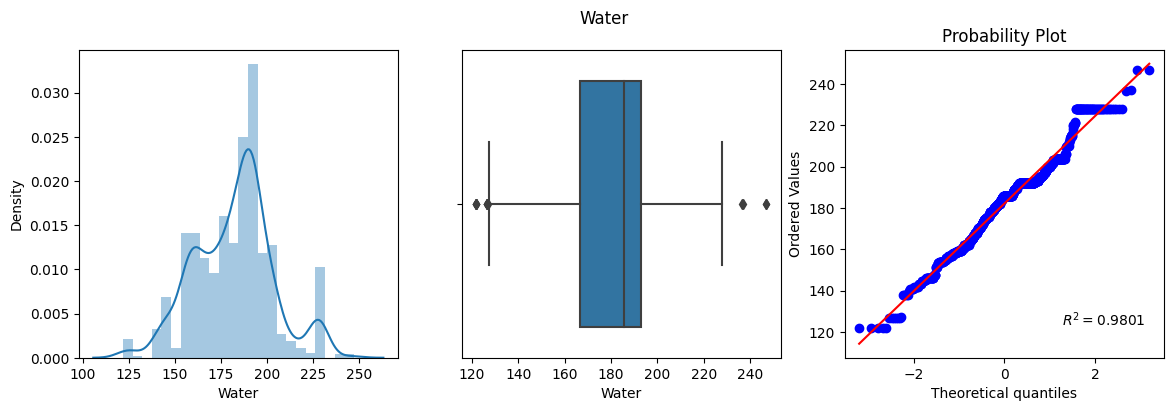

Skewness of Superplasticizer: 0.9806043204539713
Kurtosis of Superplasticizer: 1.6953960364552123


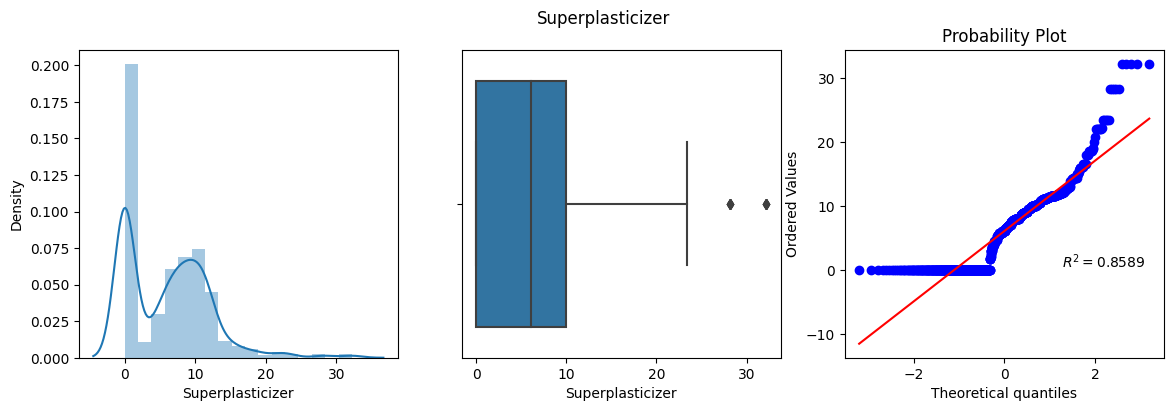

Skewness of Coarse Aggregate: -0.065255998835077
Kurtosis of Coarse Aggregate: -0.5830486495364529


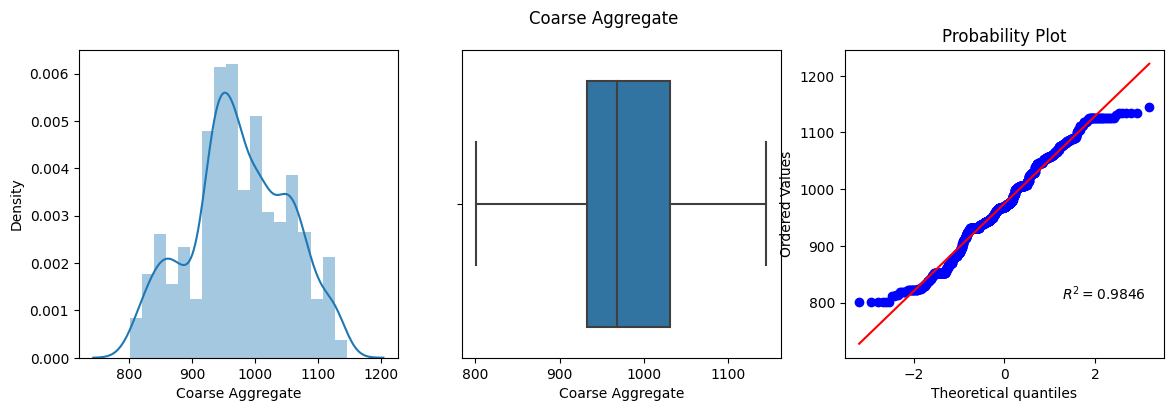

Skewness of Fine Aggregate: -0.25235318089800507
Kurtosis of Fine Aggregate: -0.10588130604972834


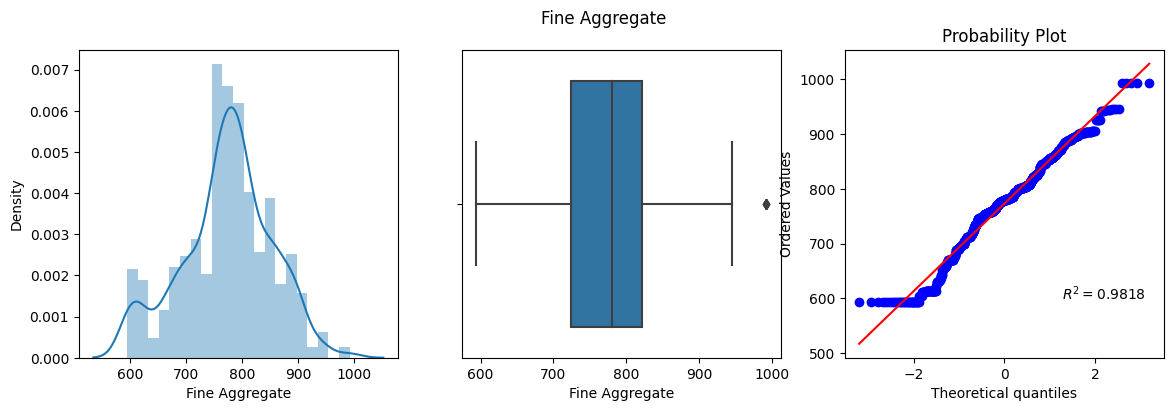

Skewness of Age: 3.2539737173312044
Kurtosis of Age: 11.961963428899287


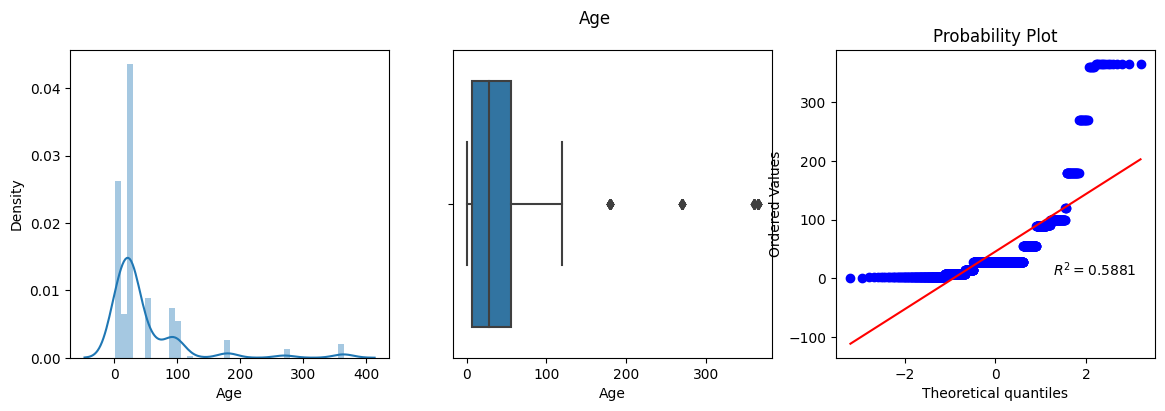

Skewness of Strength: 0.3956961343153939
Kurtosis of Strength: -0.3053086176667841


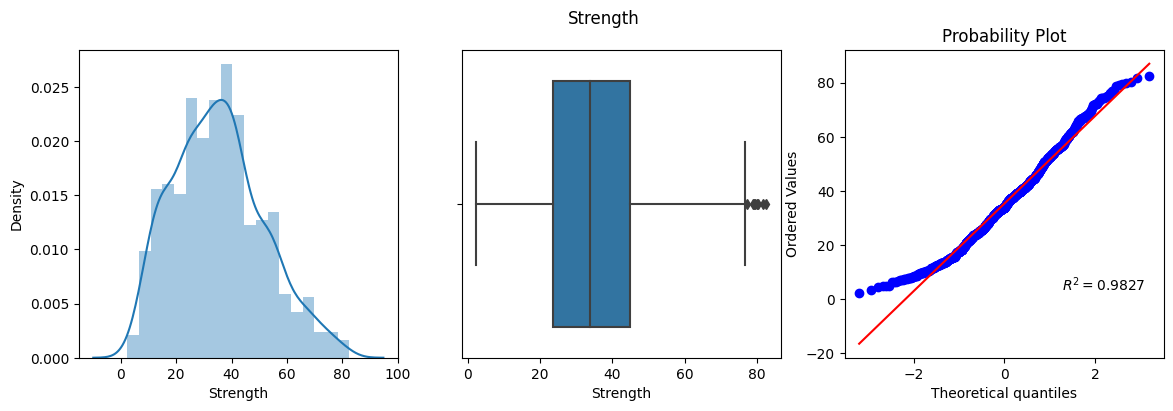

In [9]:
for col in df.columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show()
    gc.collect();

There are several features that have skewed distributions i.e. outliers are present in them. Those features are "Blast Furnace Slag", "Water", "Superplasticizer", "Fine Aggregate", "Age" and the target feature "Strength" as well. 

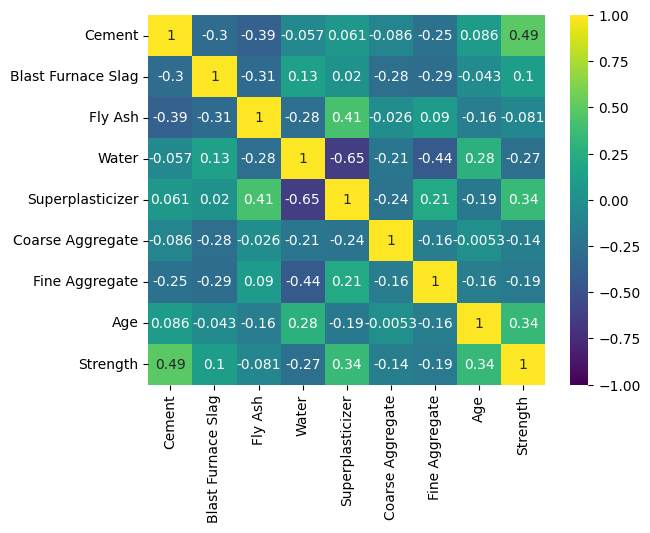

In [10]:
fig = sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1.0,vmax=1.0)
plt.show(fig)
plt.close('all')
del fig
gc.collect();

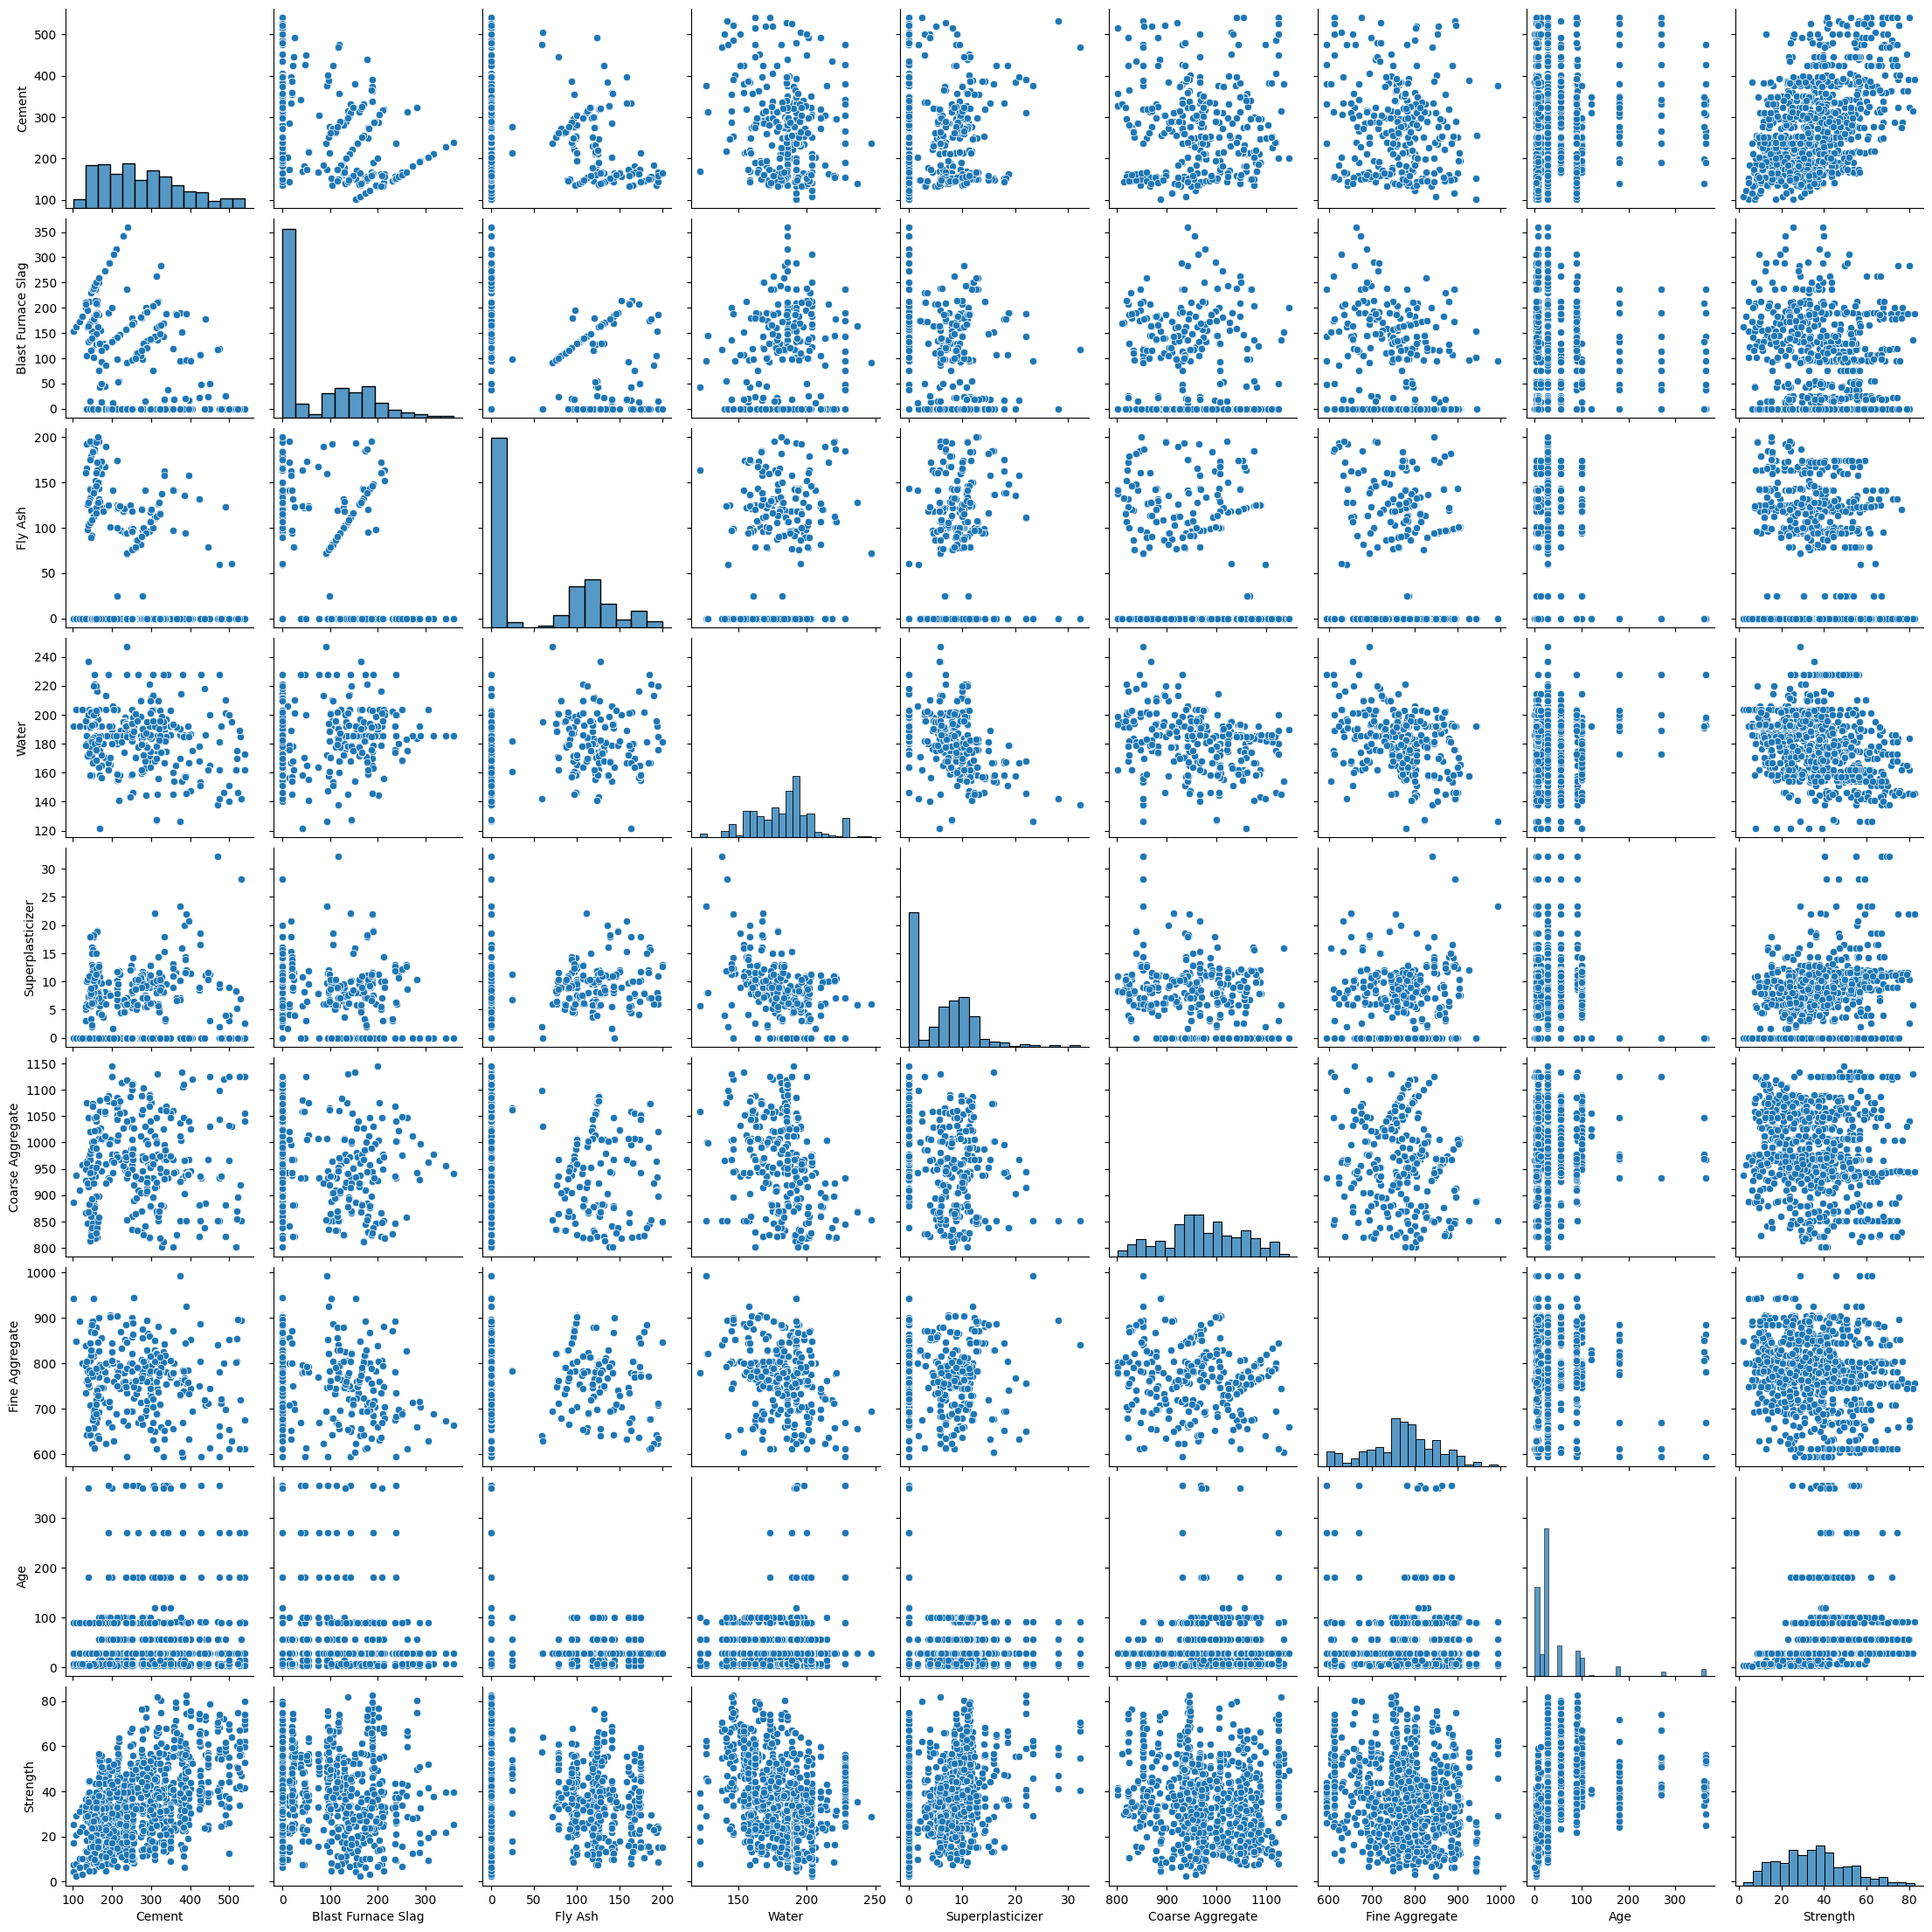

In [11]:
fig = sns.pairplot(df)
plt.show(fig)
plt.close('all')
del fig
gc.collect();

## Feature Engineering

### Feature Transformation

In [12]:
skewed_cols = ['Cement','Blast Furnace Slag','Water','Superplasticizer','Fine Aggregate','Age','Strength','Fly Ash','Coarse Aggregate']

In [13]:
def apply_transform(transformer,col):
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f"{col} Before Transform")
    plt.show()
    col_tf = transformer.fit_transform(df[[col]])
    col_tf = np.array(col_tf).reshape(col_tf.shape[0])
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(col_tf)
    plt.subplot(132)
    sns.boxplot(col_tf)
    plt.subplot(133)
    probplot(col_tf,rvalue=True,dist='norm',plot=plt)
    plt.suptitle(f"{col} After Transform")
    plt.show()
    gc.collect();

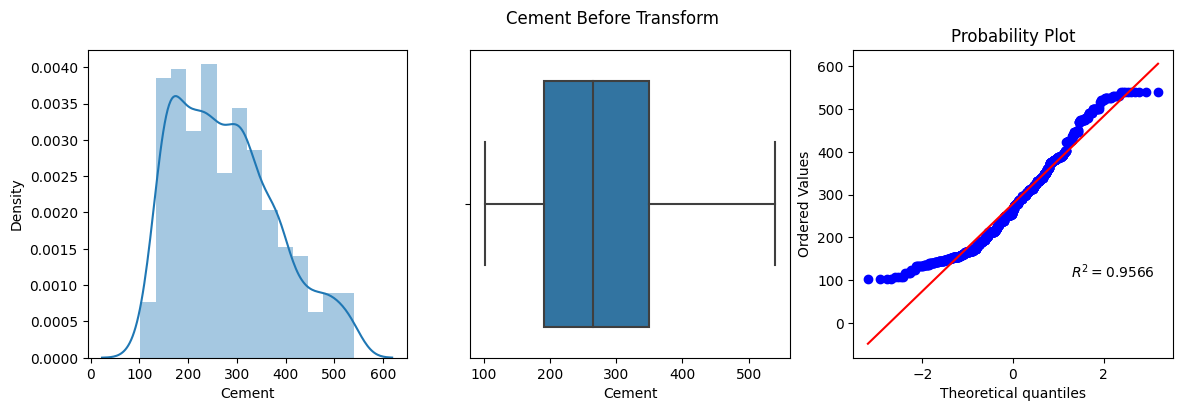

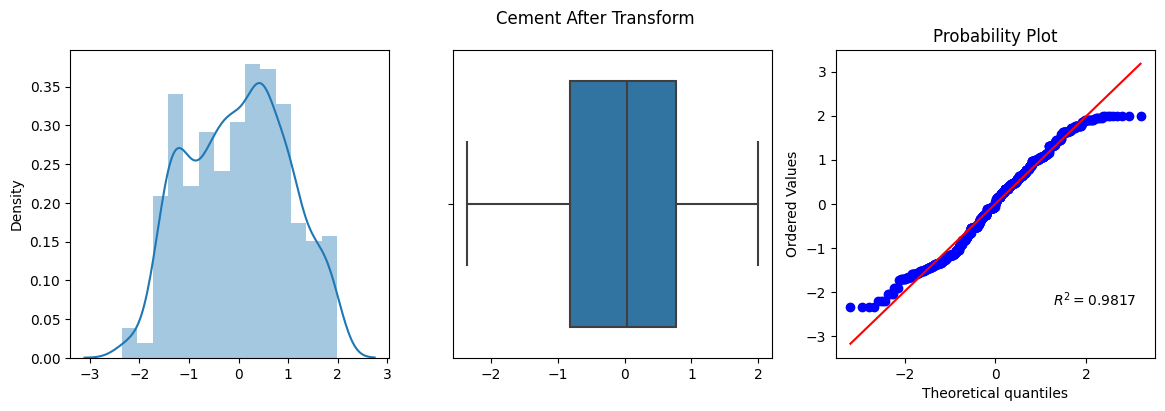

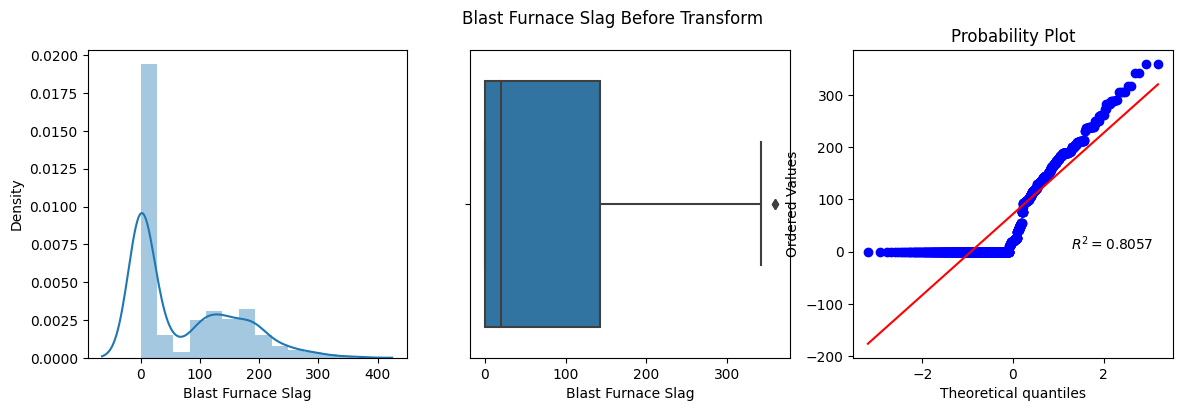

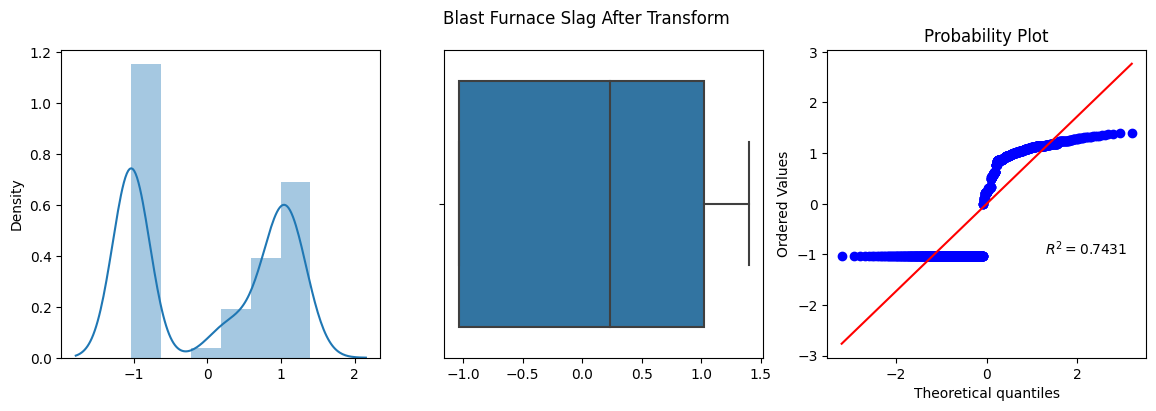

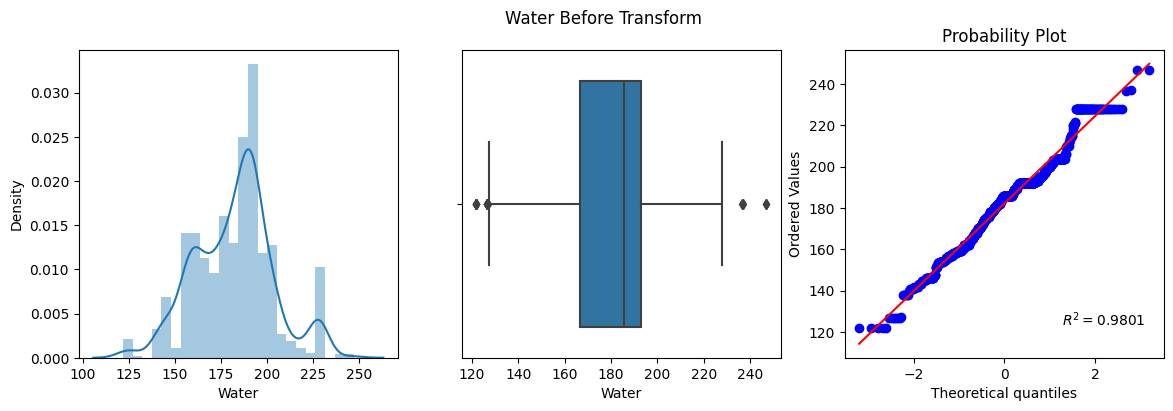

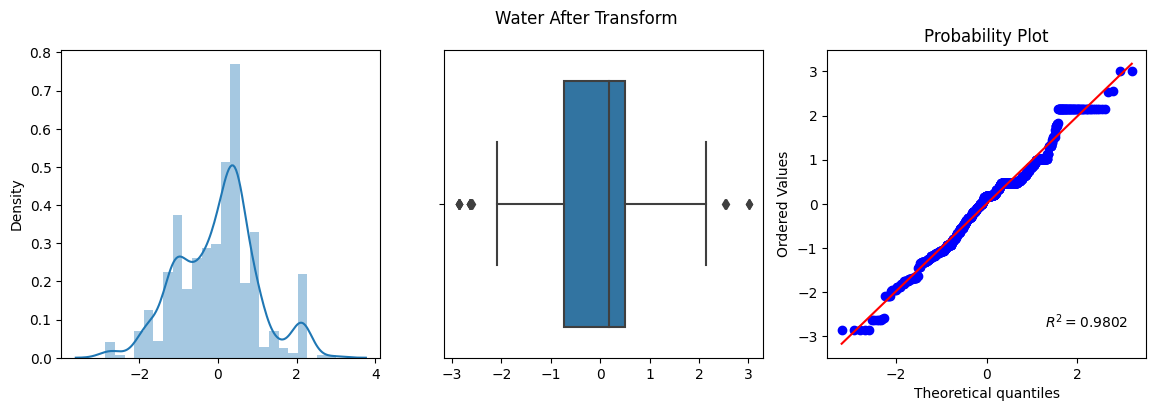

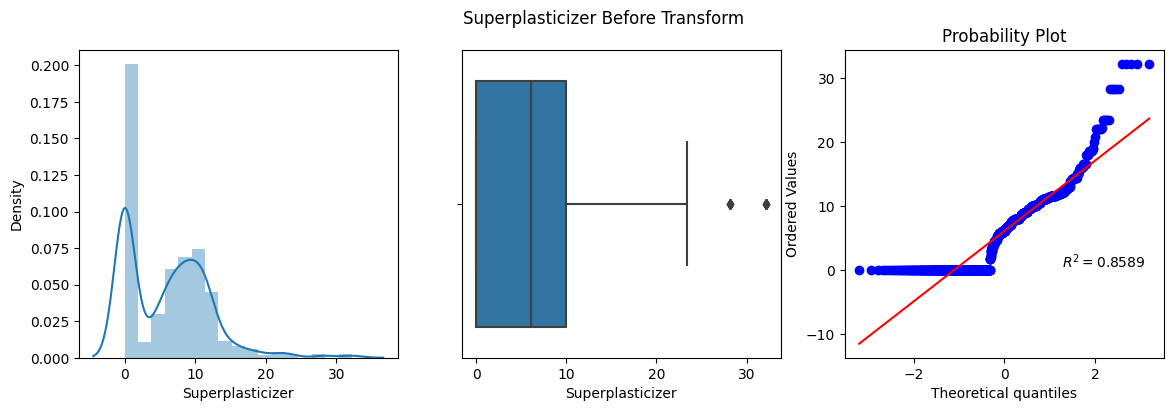

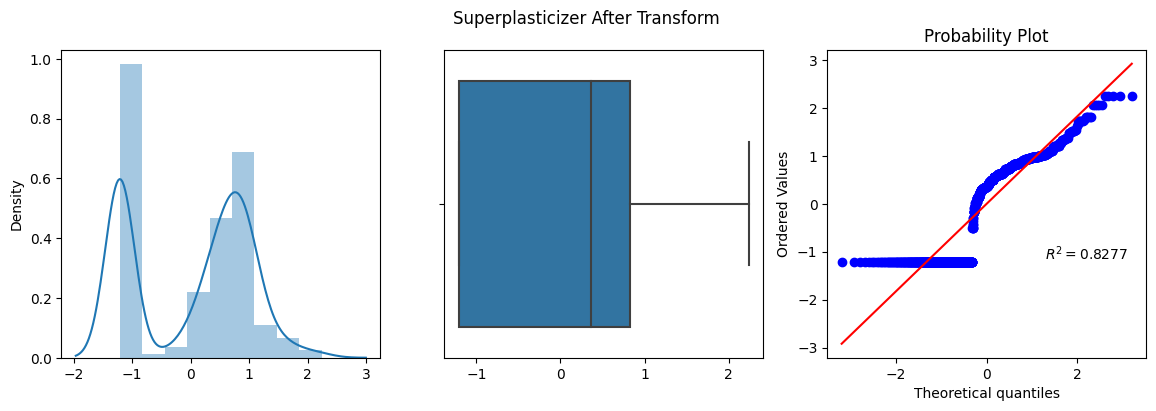

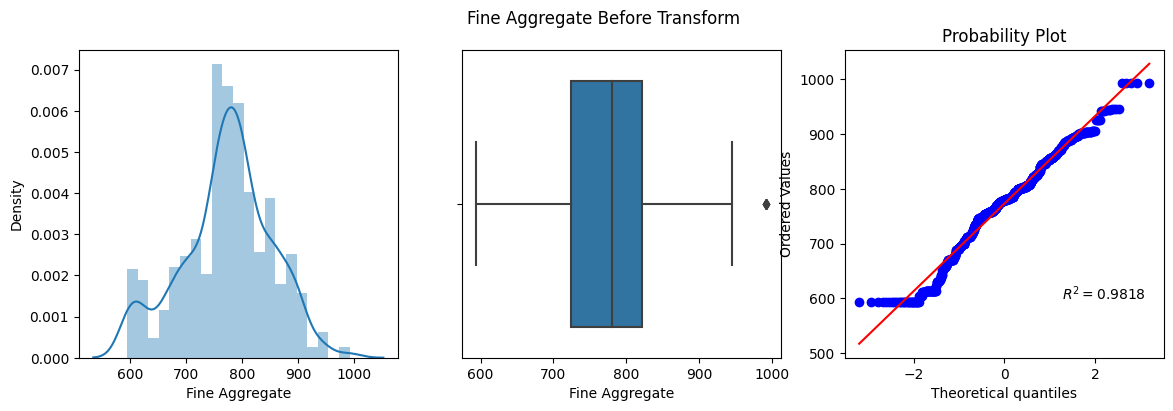

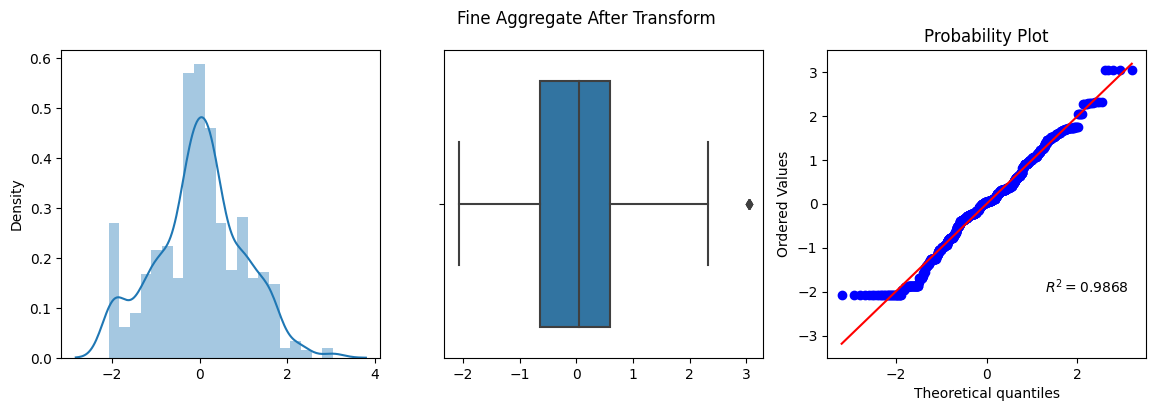

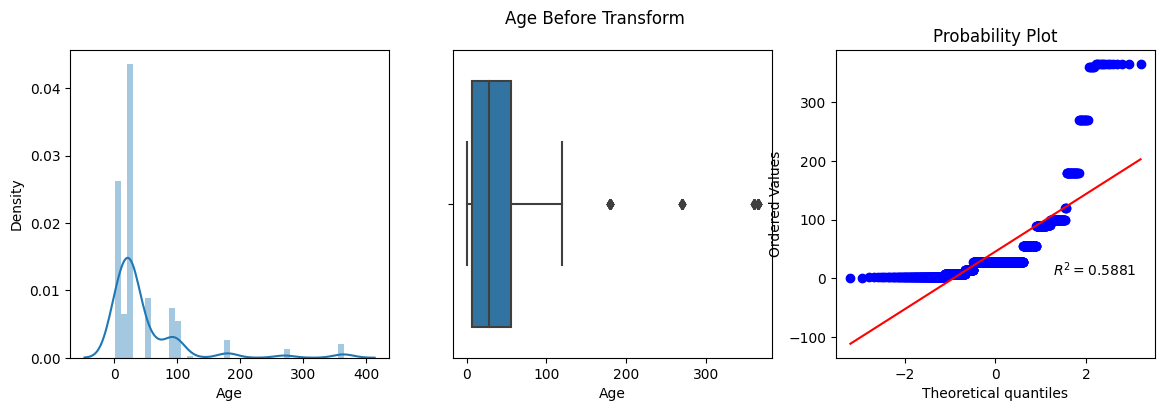

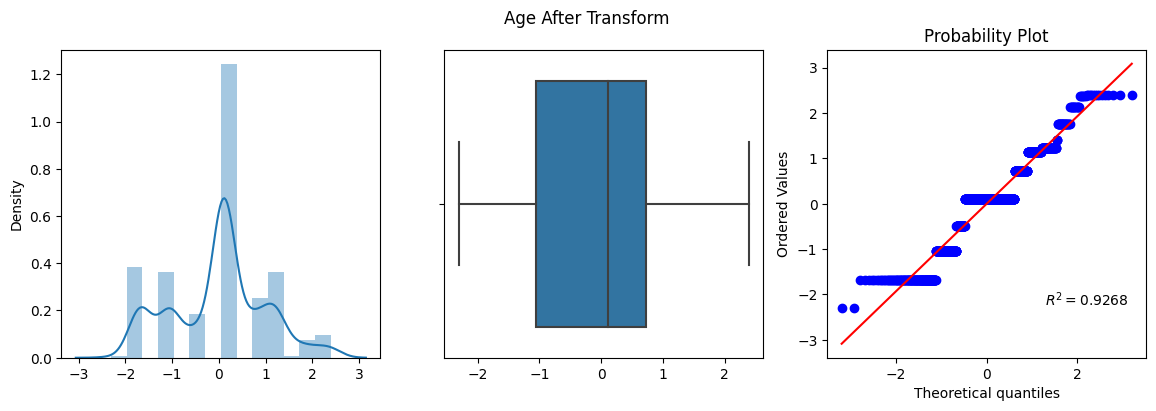

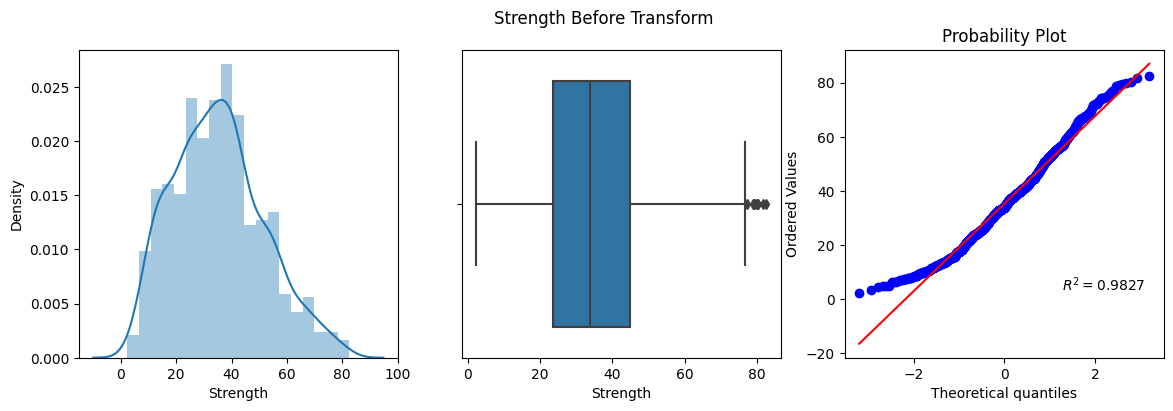

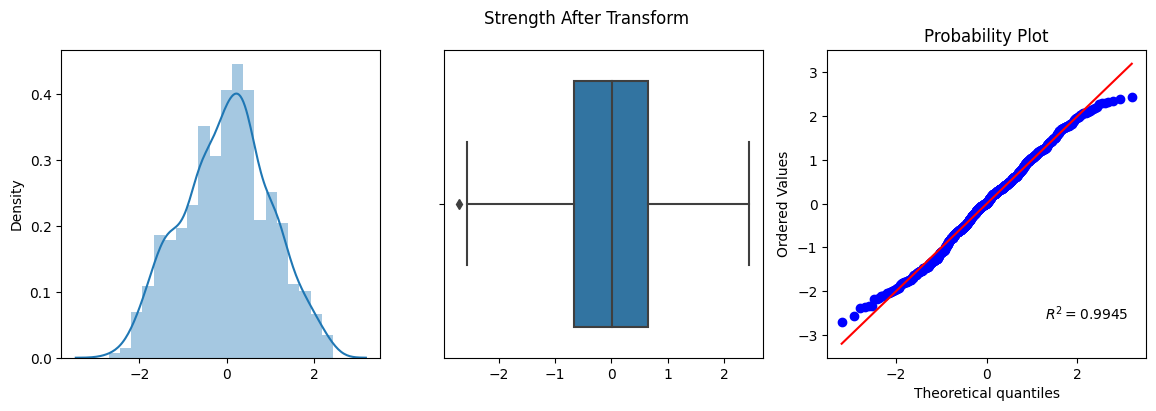

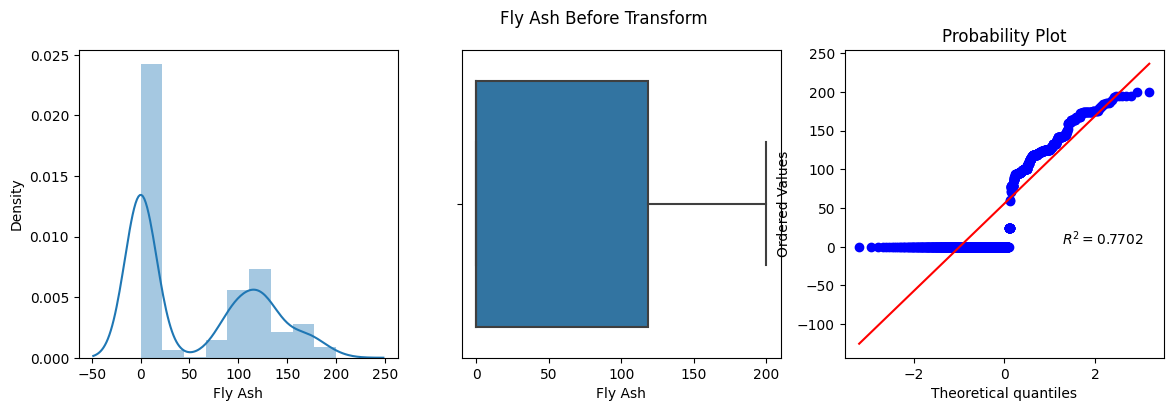

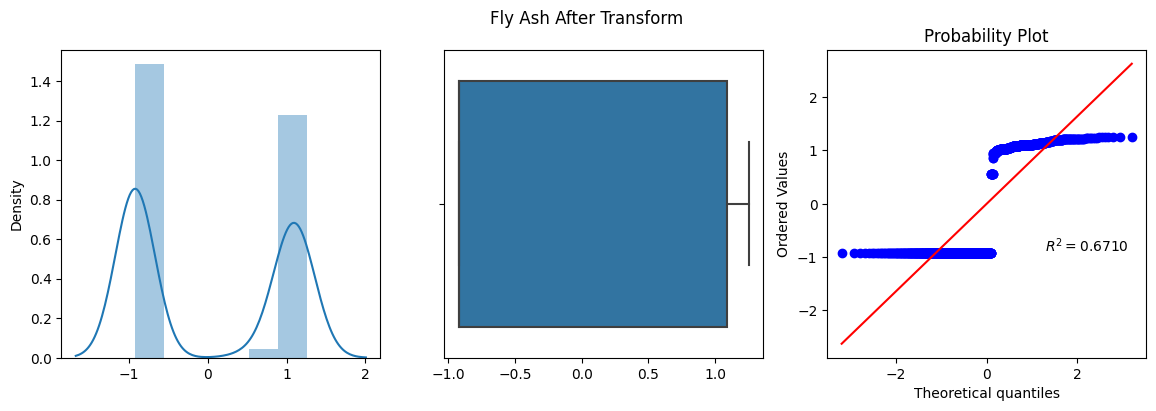

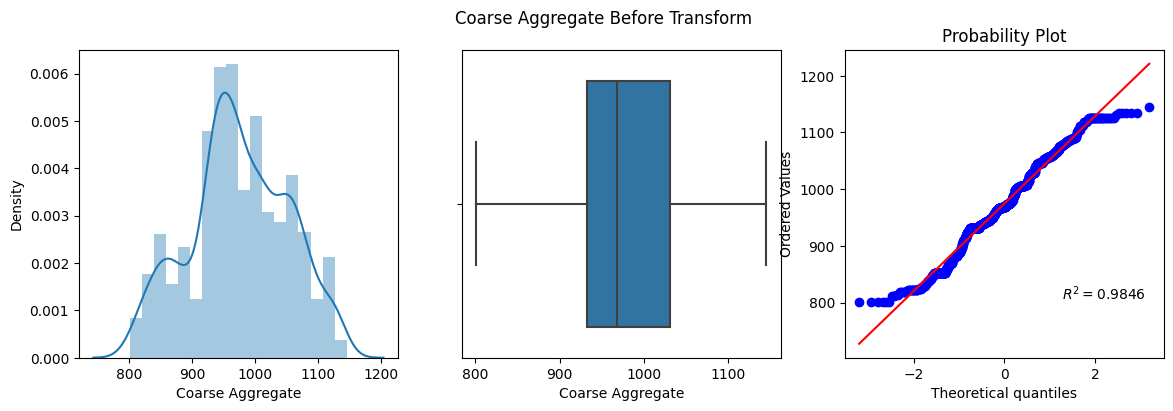

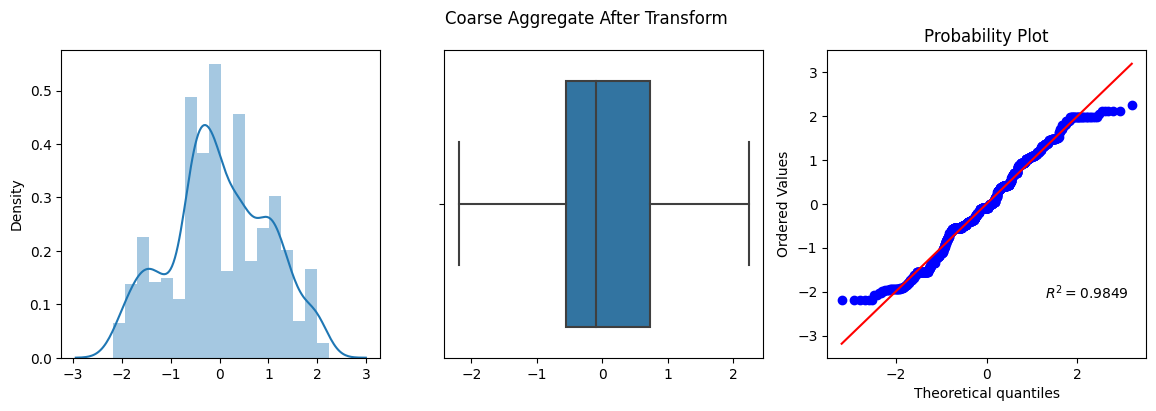

In [14]:
for col in skewed_cols:
    apply_transform(PowerTransformer(),col)

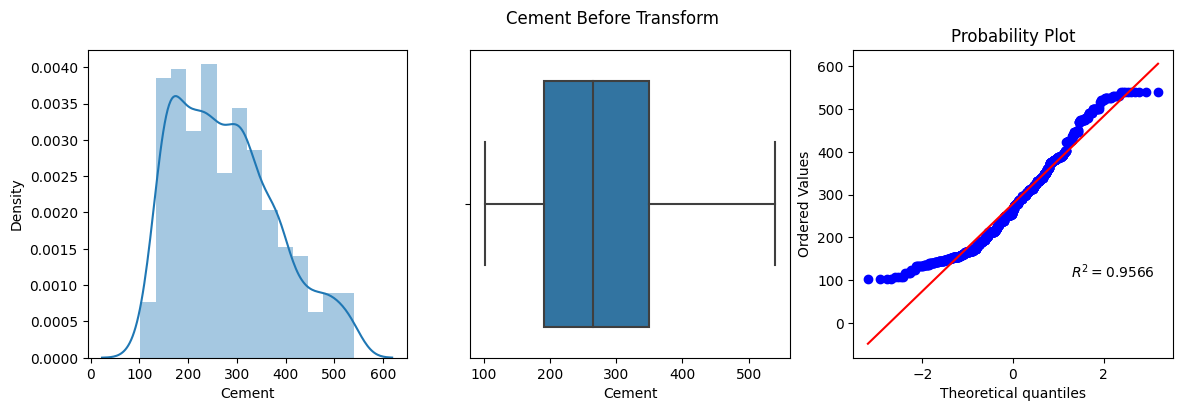

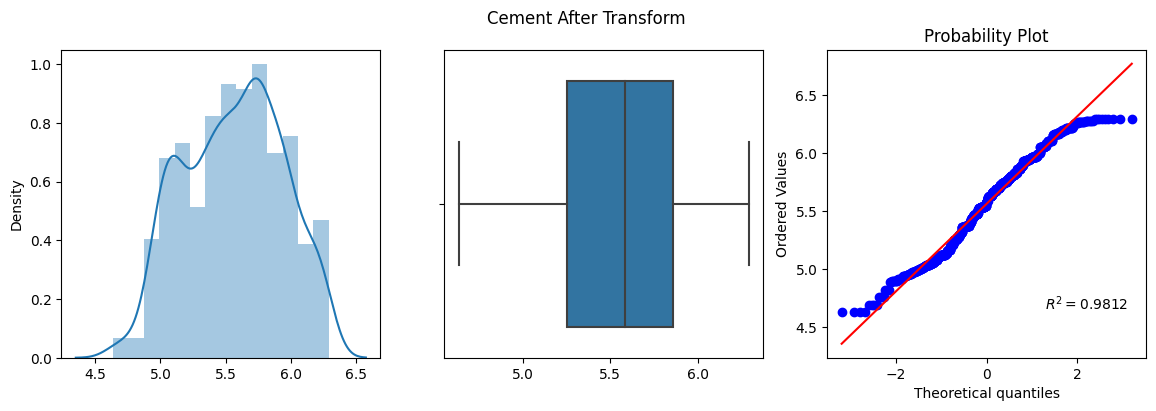

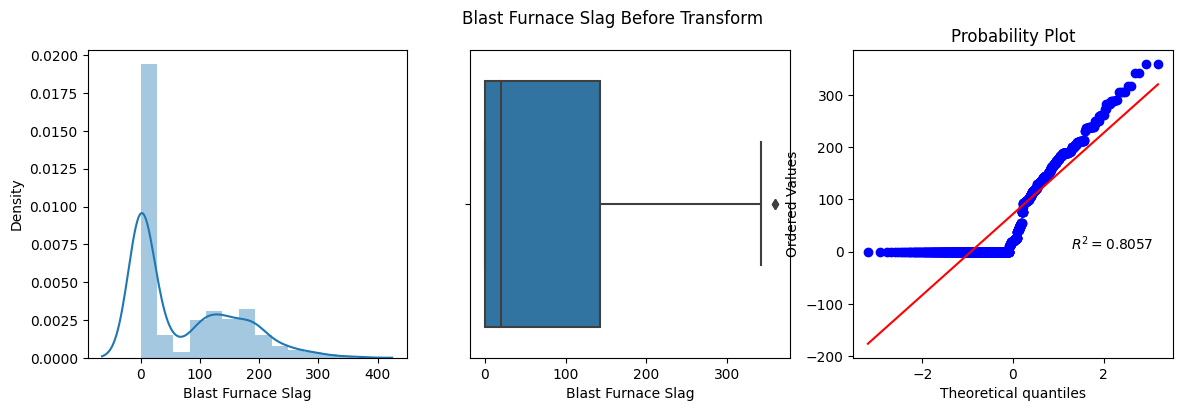

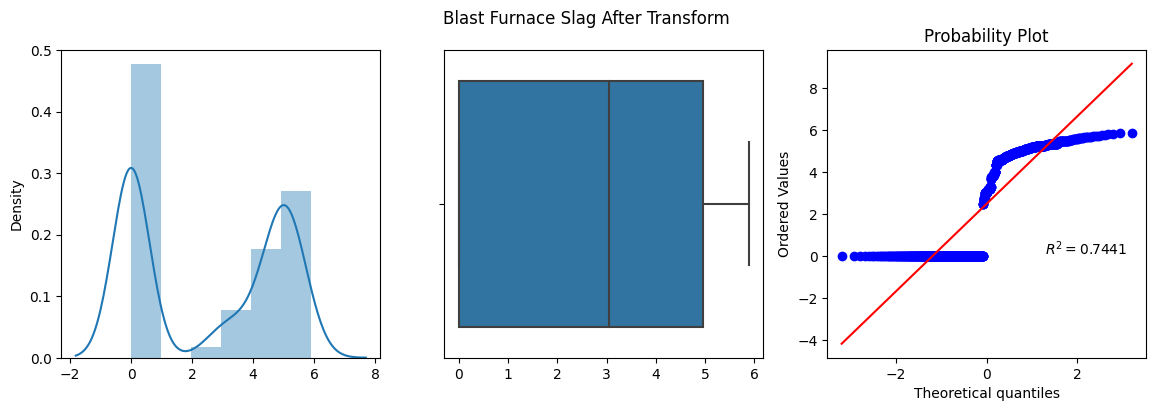

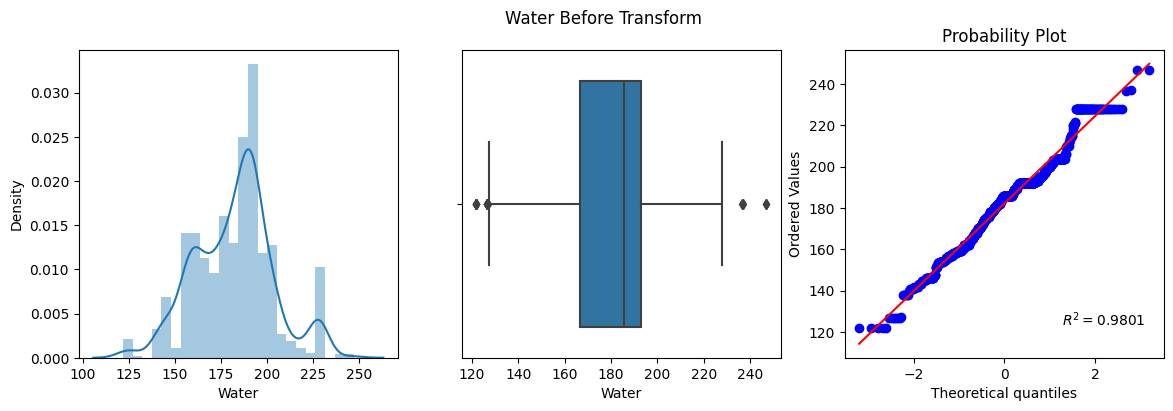

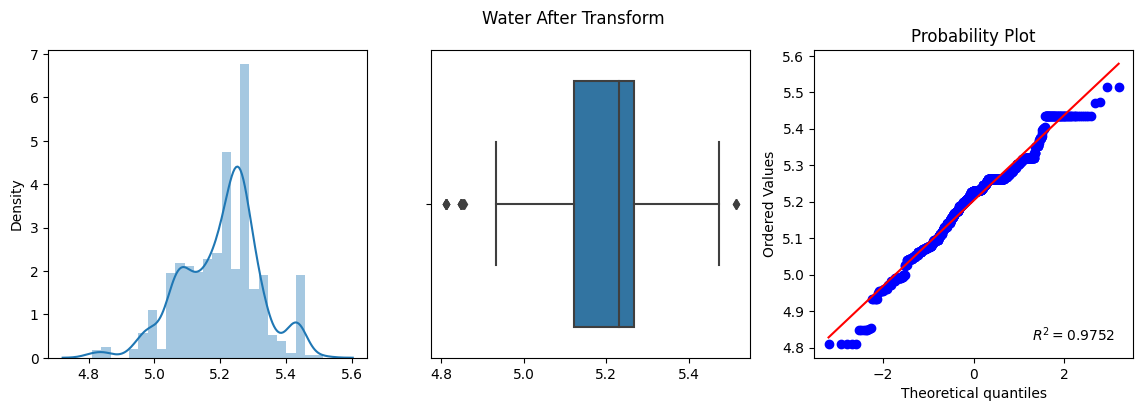

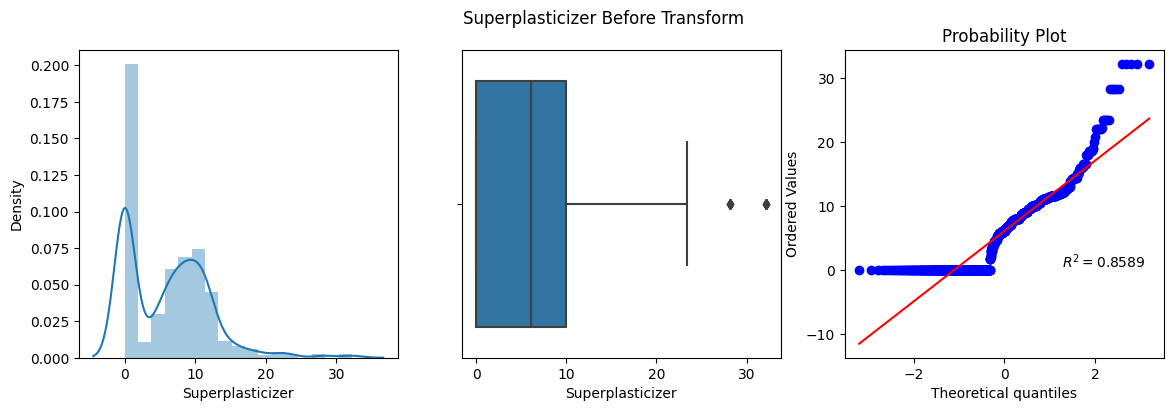

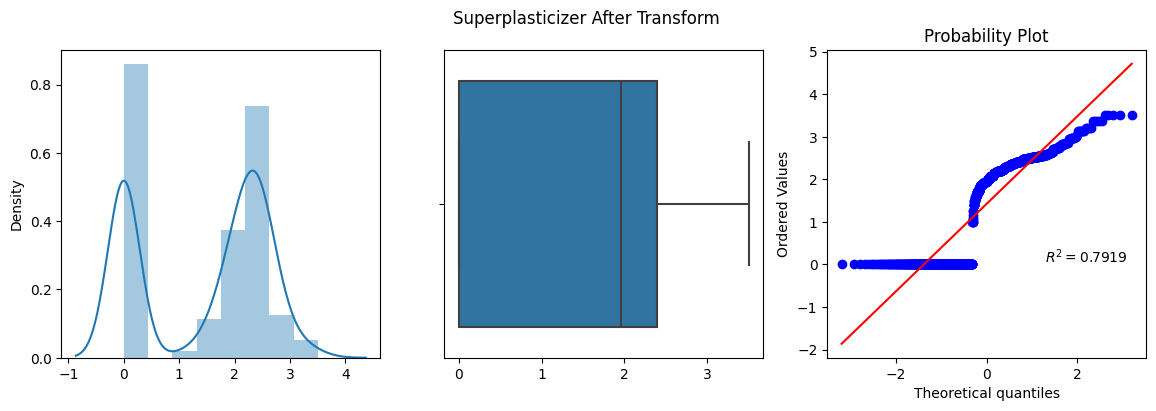

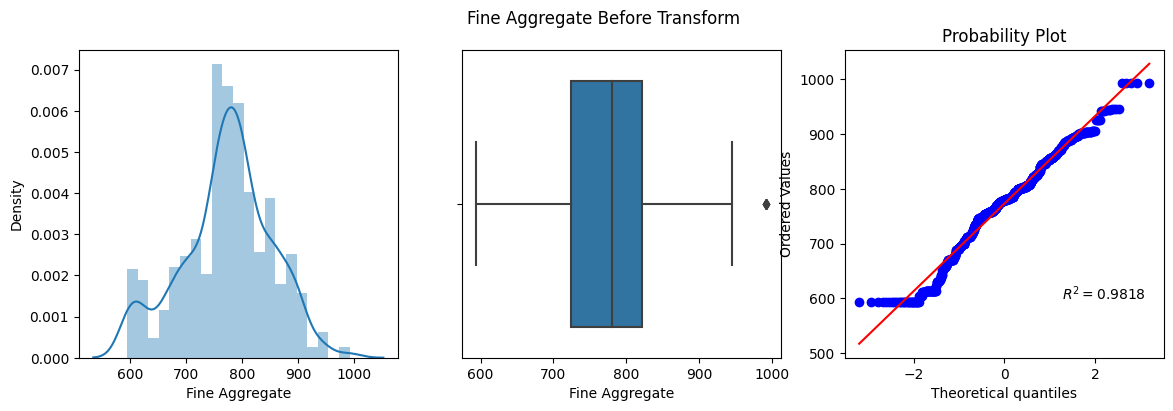

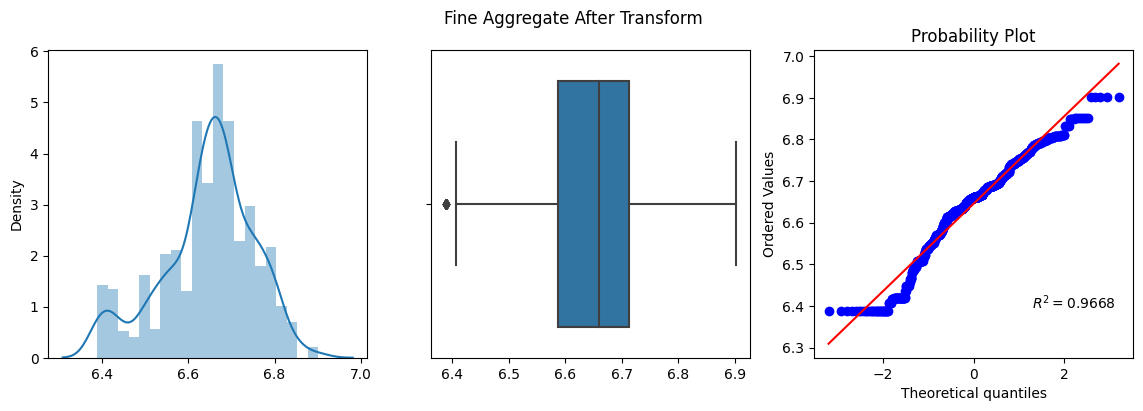

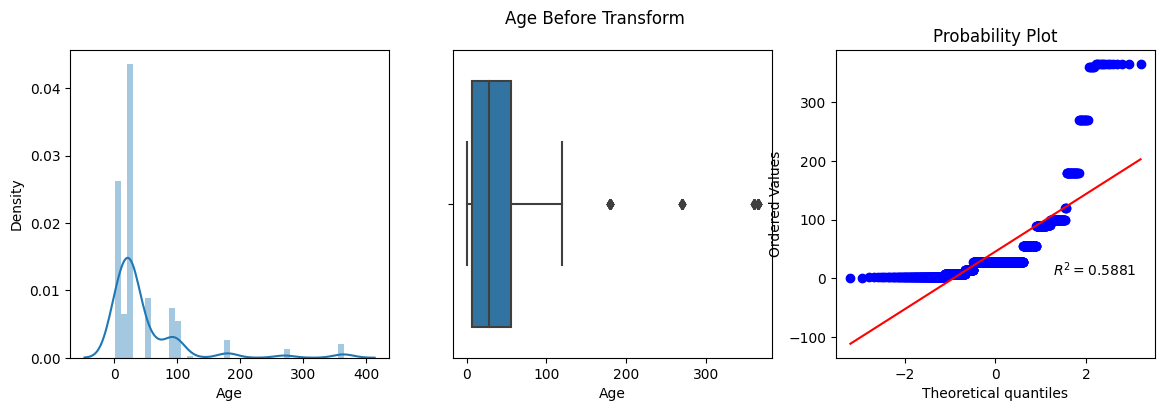

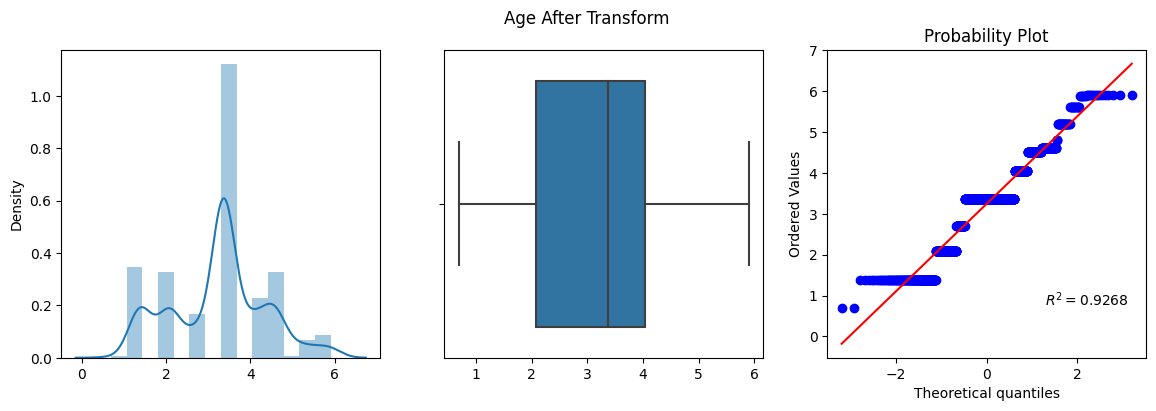

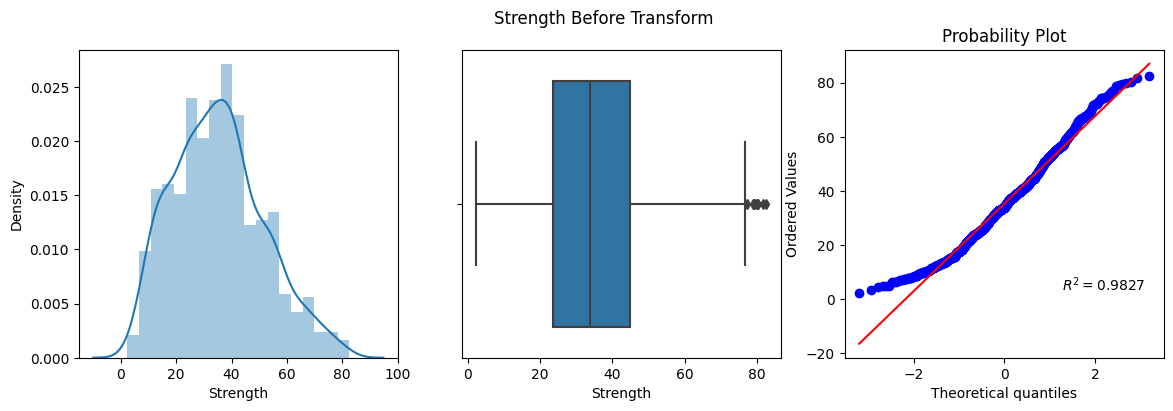

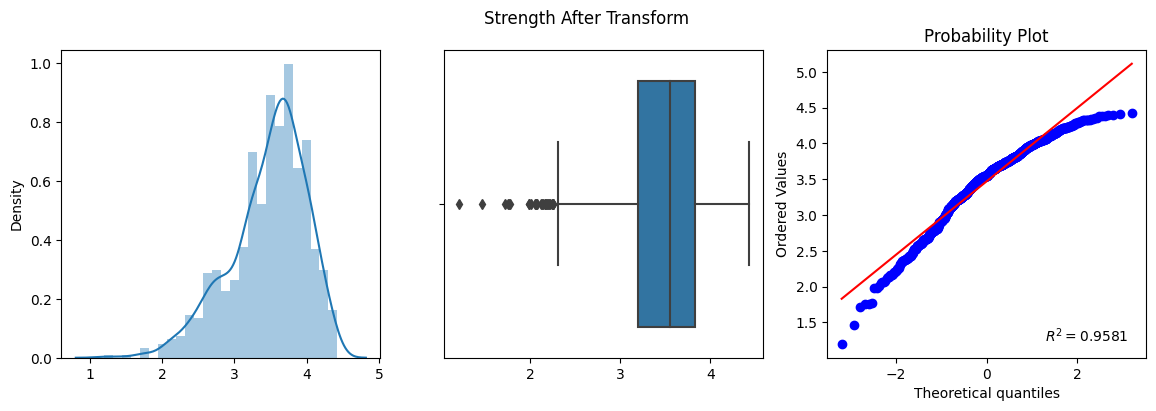

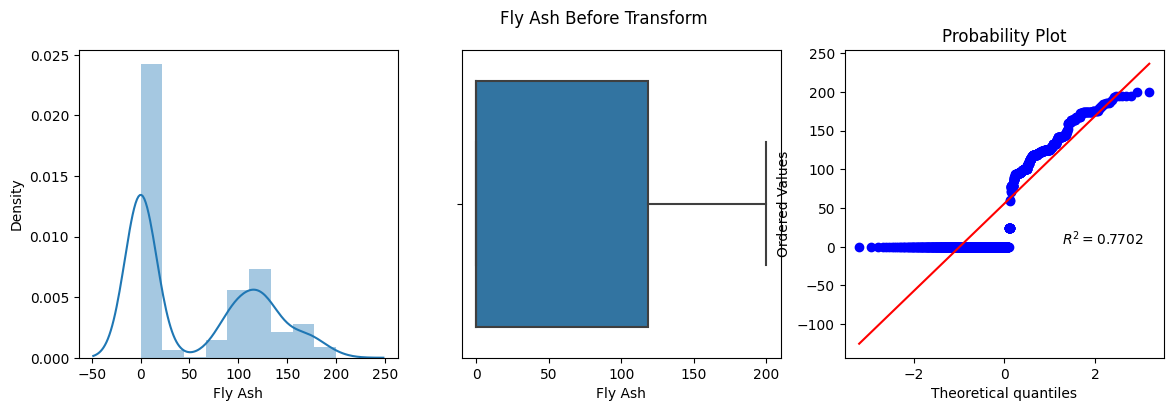

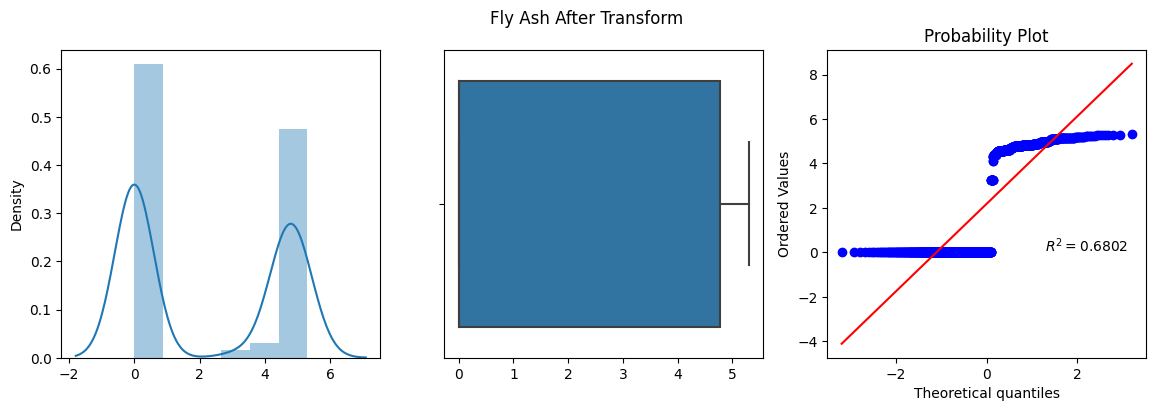

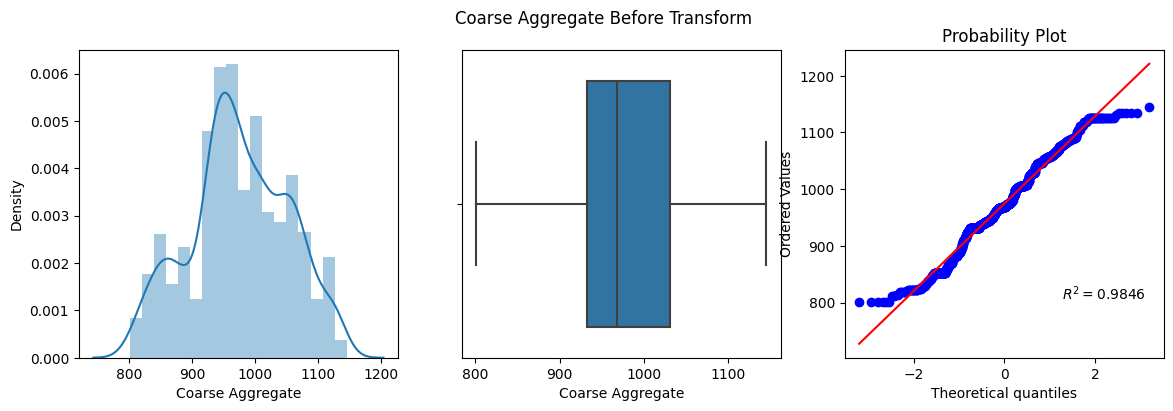

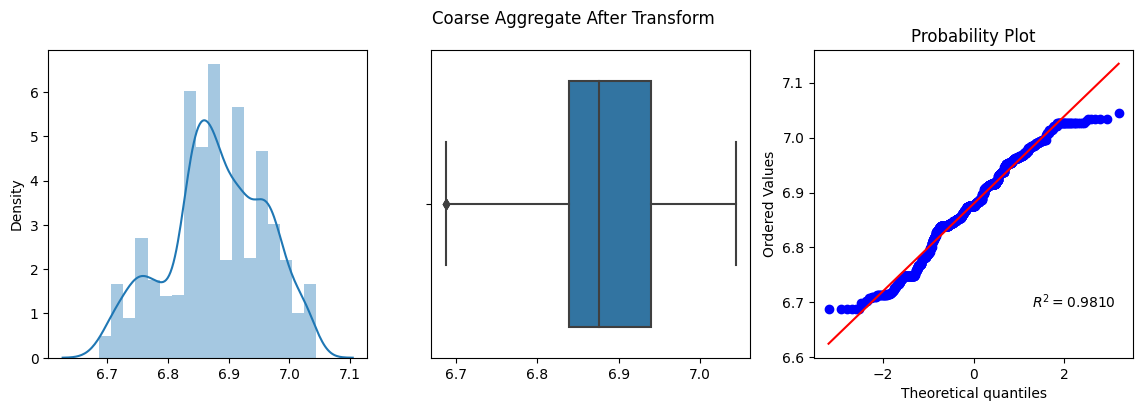

In [15]:
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.log1p),col)

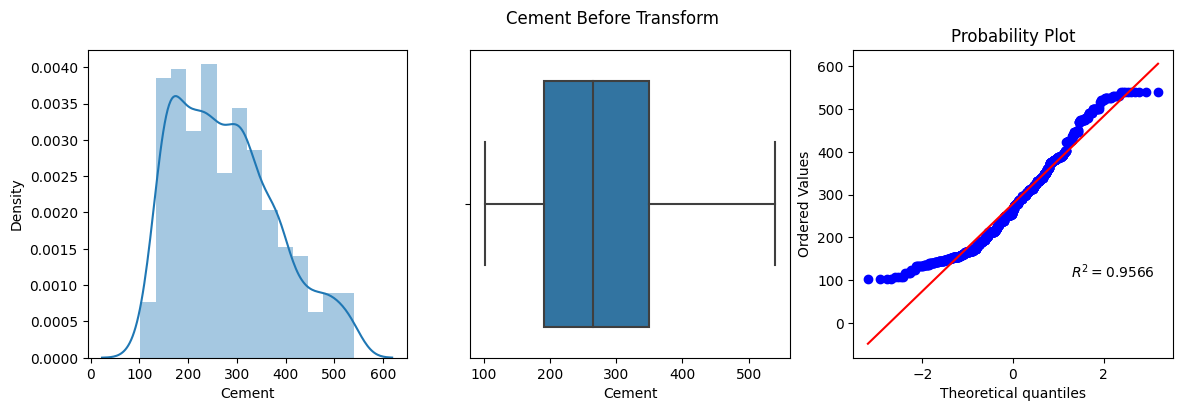

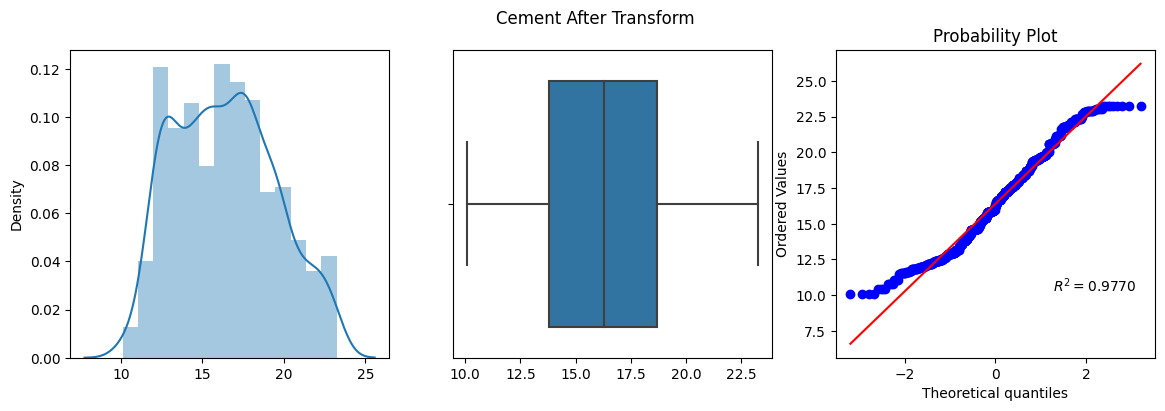

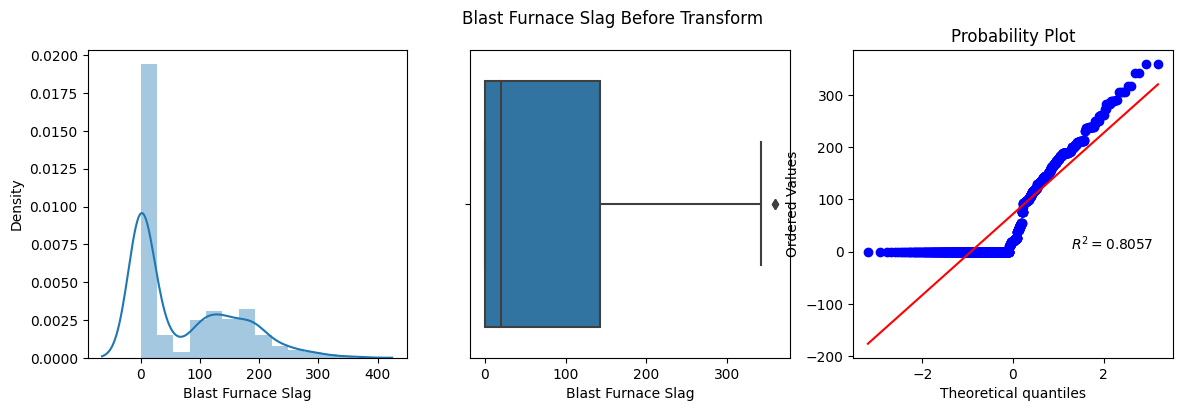

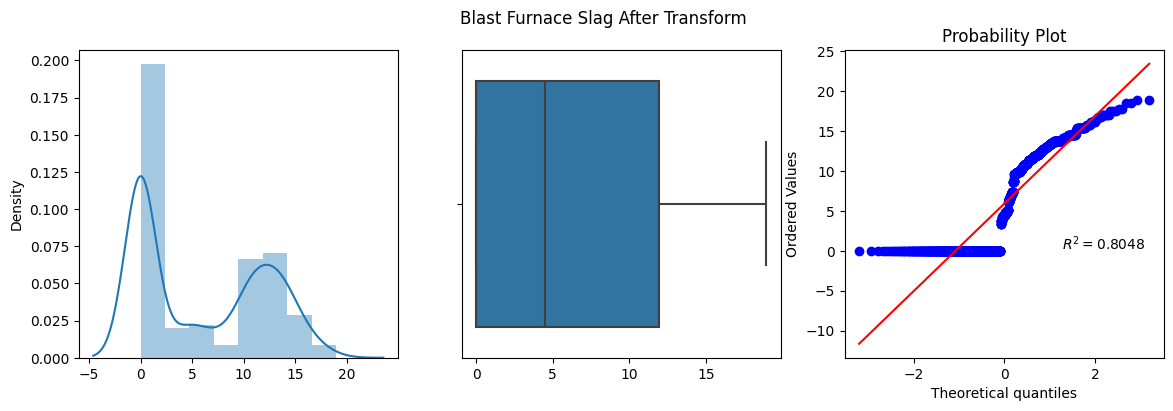

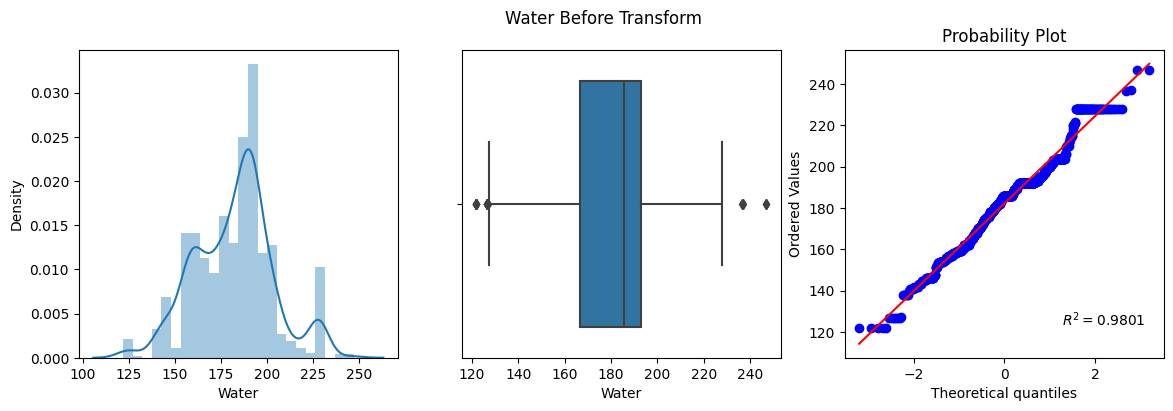

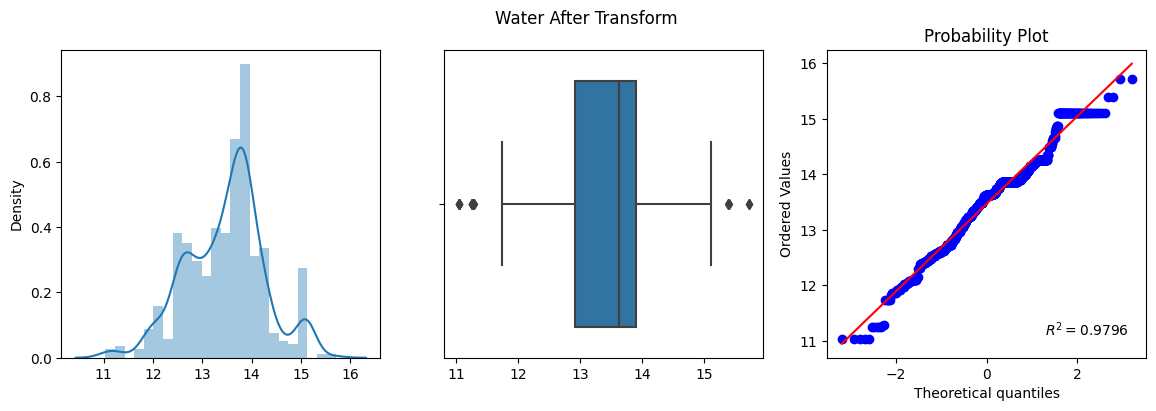

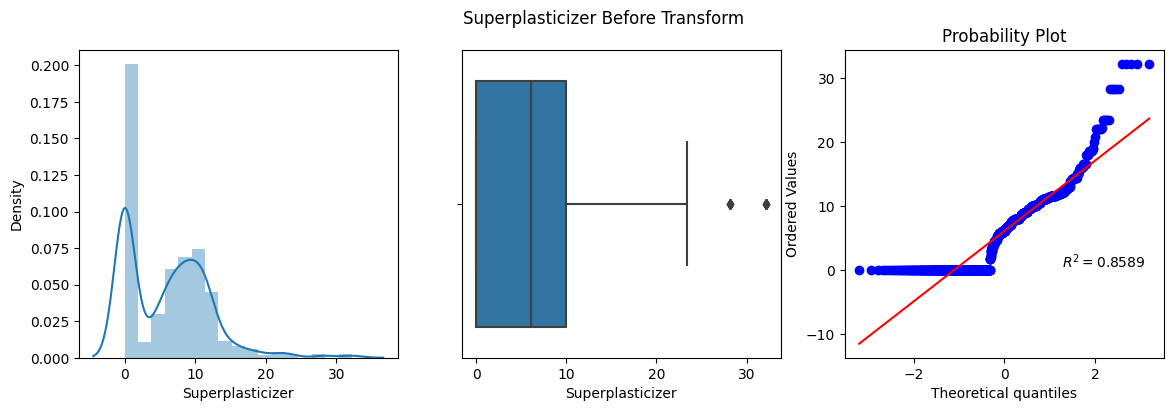

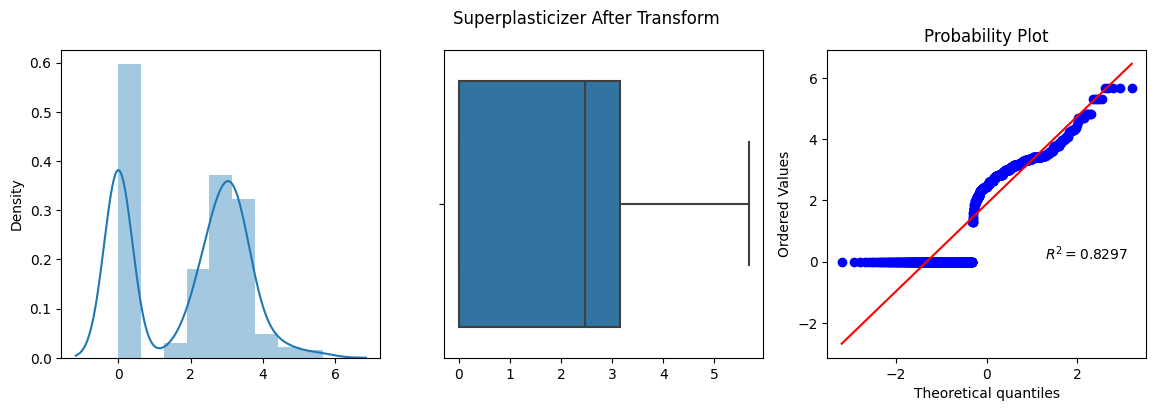

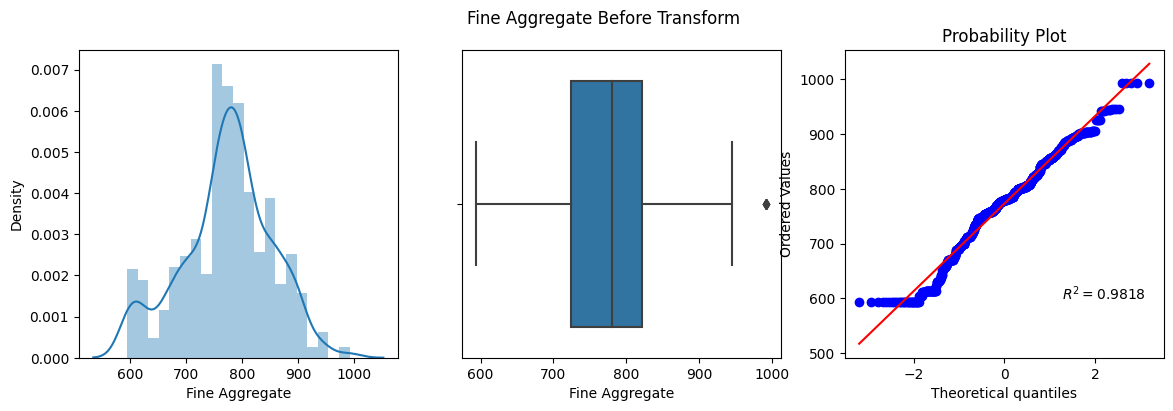

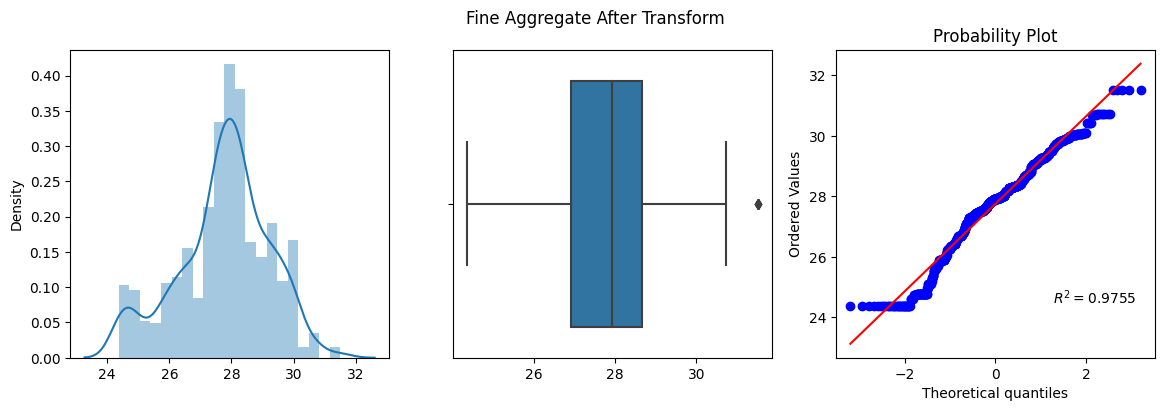

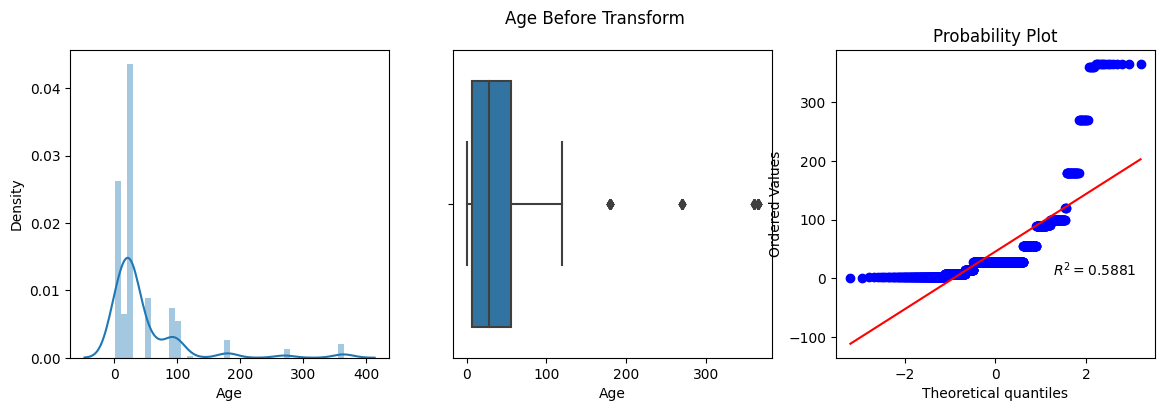

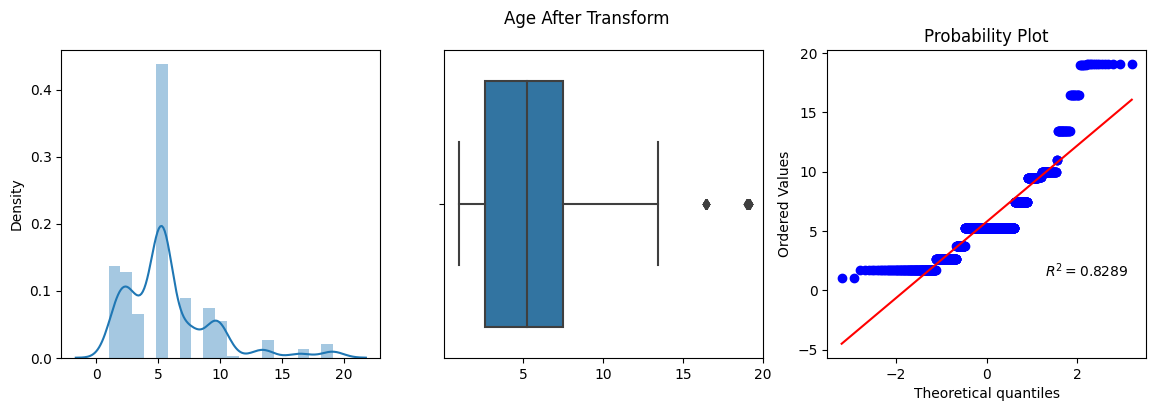

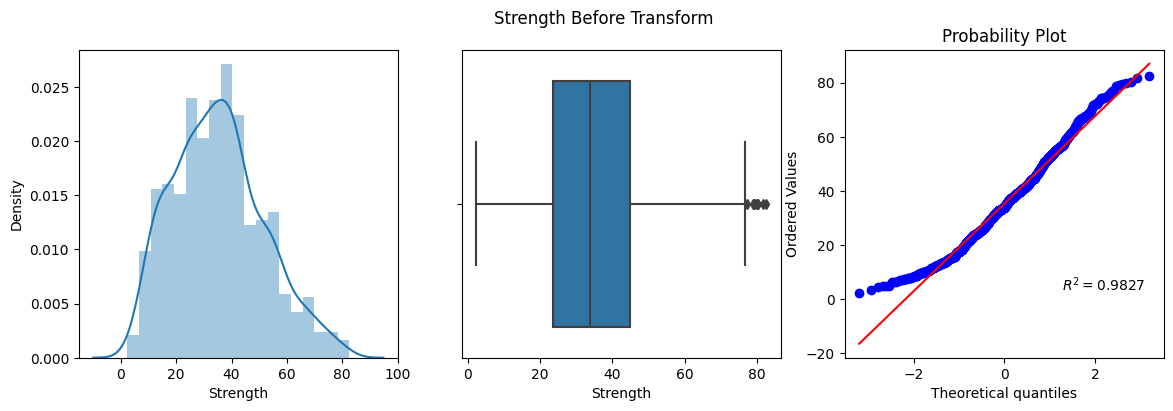

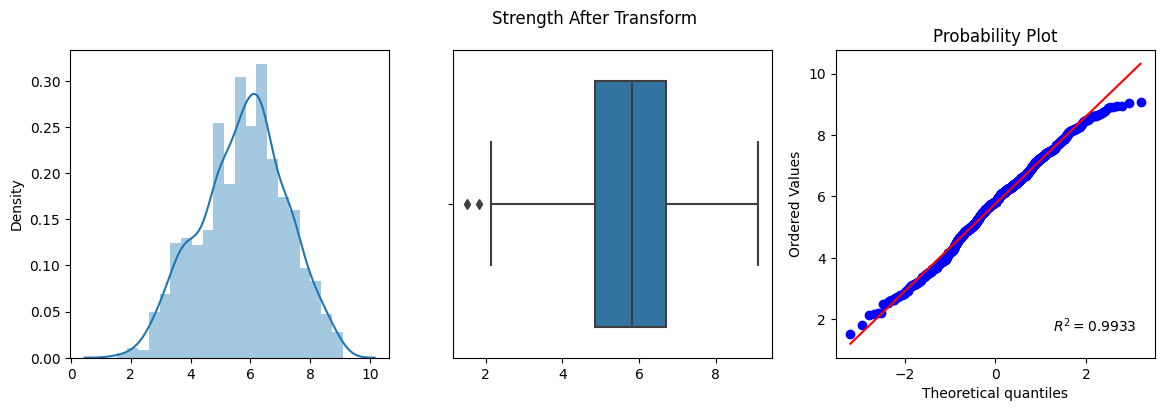

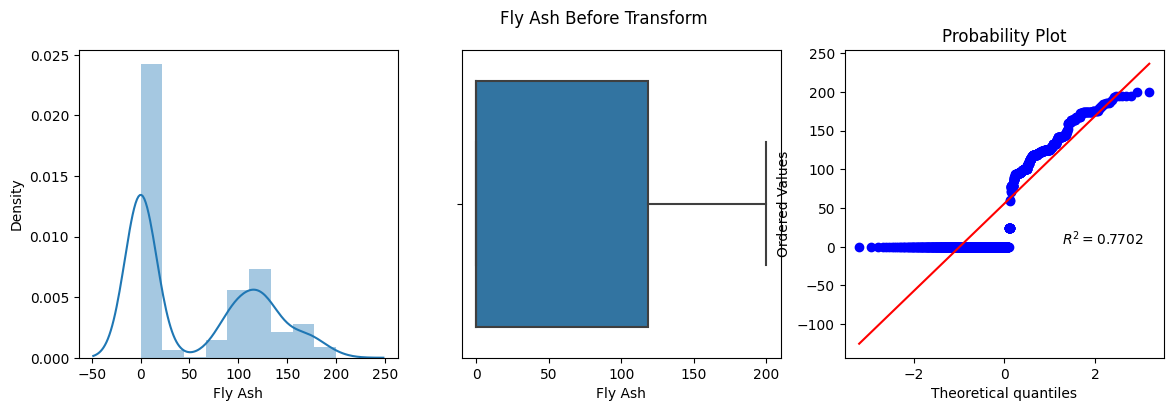

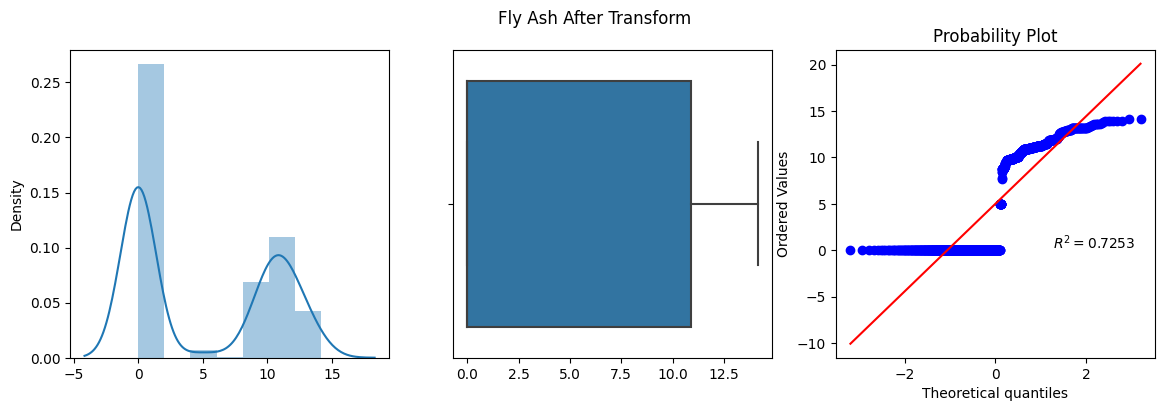

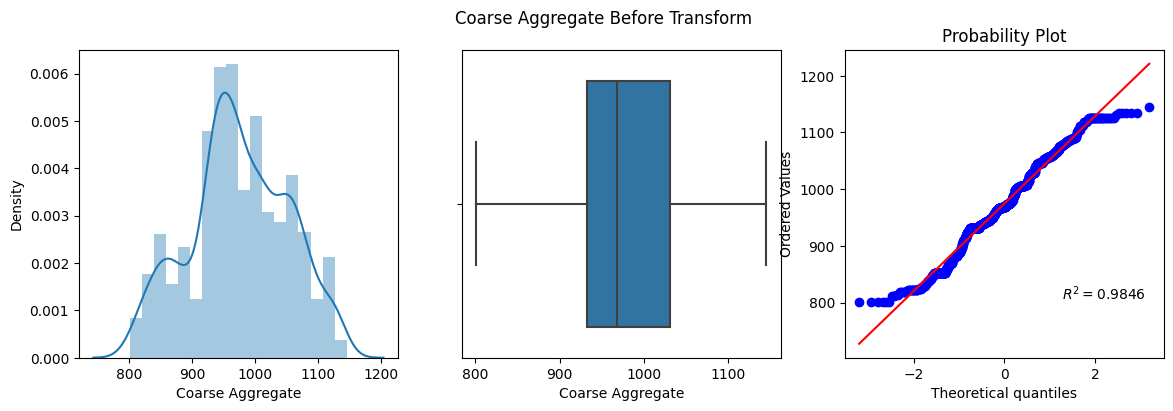

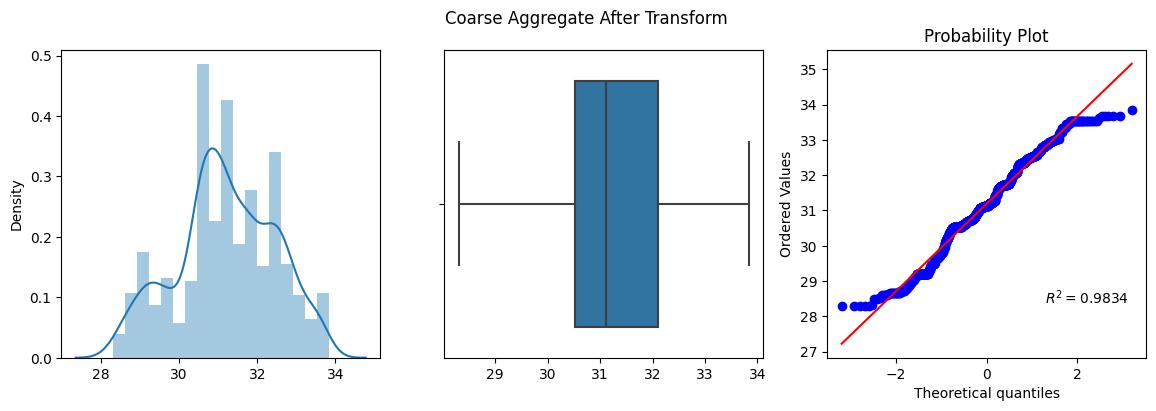

In [16]:
for col in skewed_cols:
    apply_transform(FunctionTransformer(np.sqrt),col)

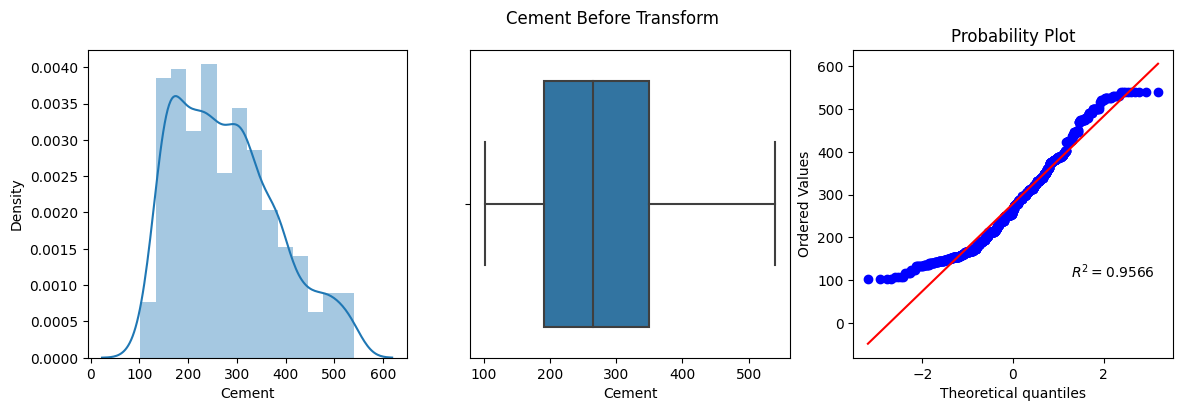

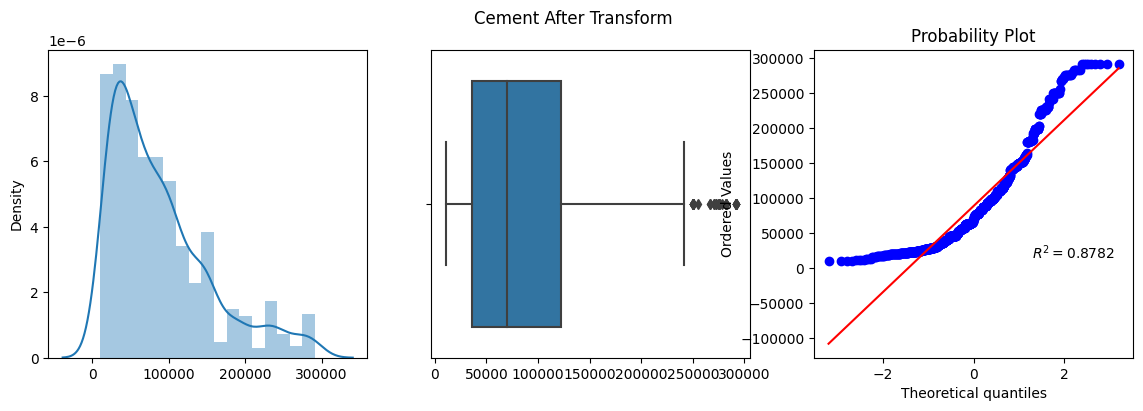

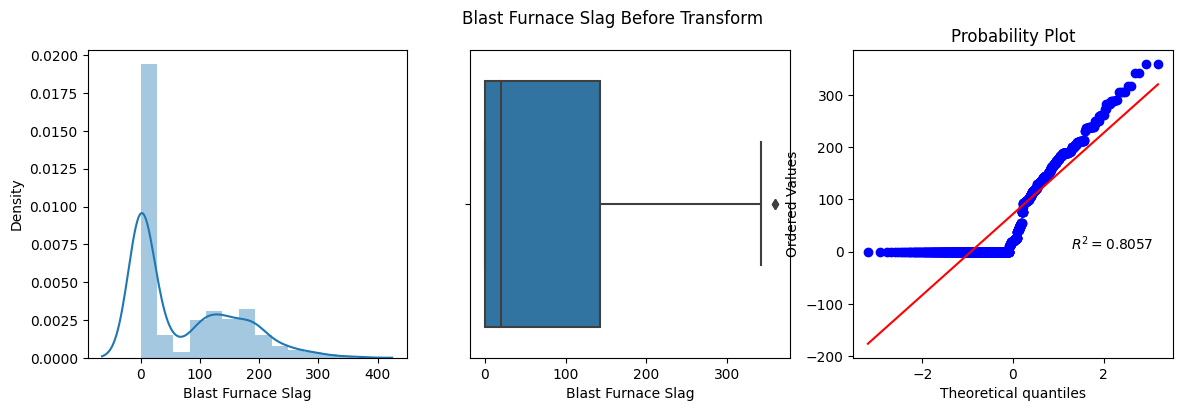

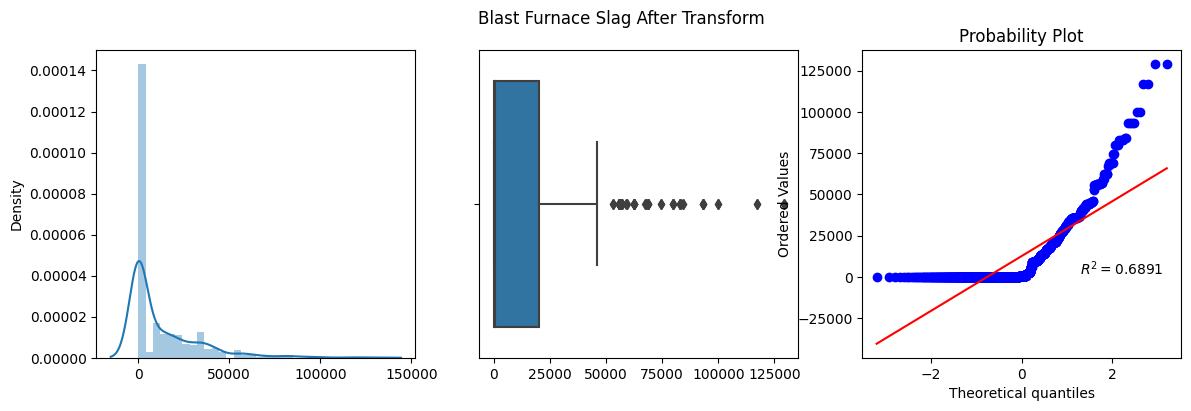

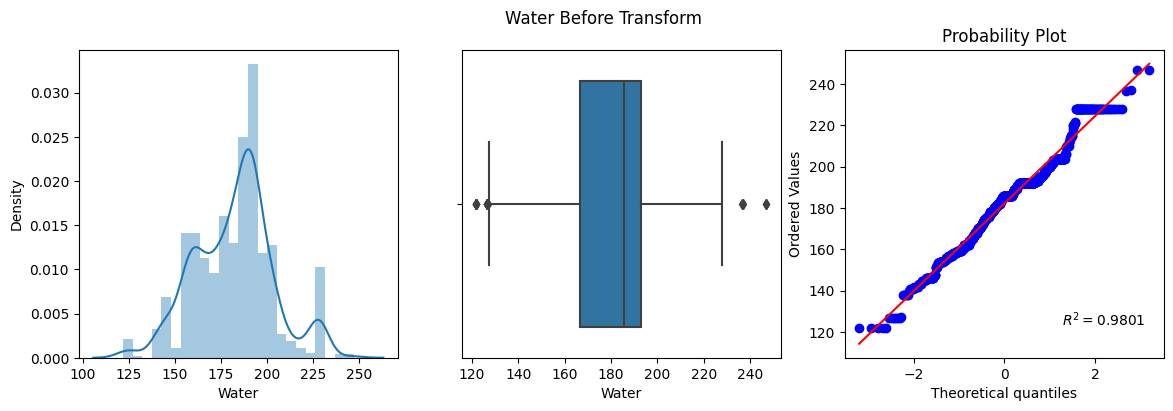

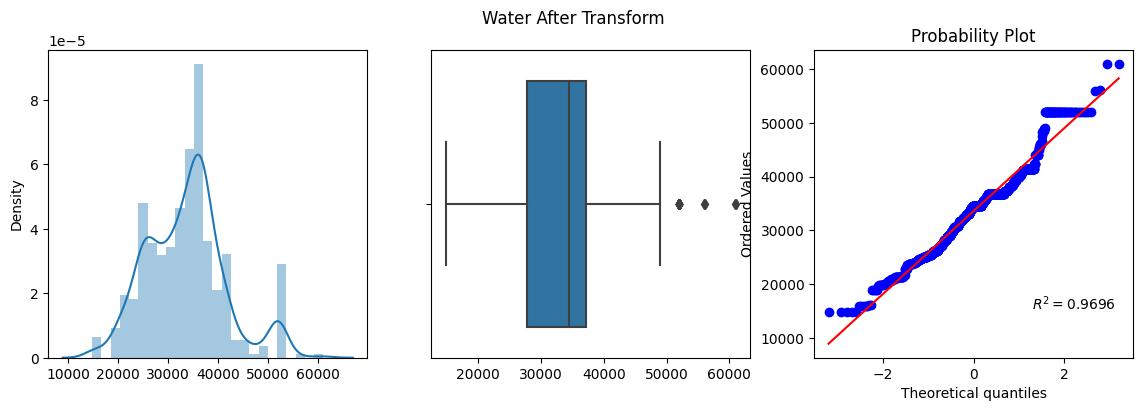

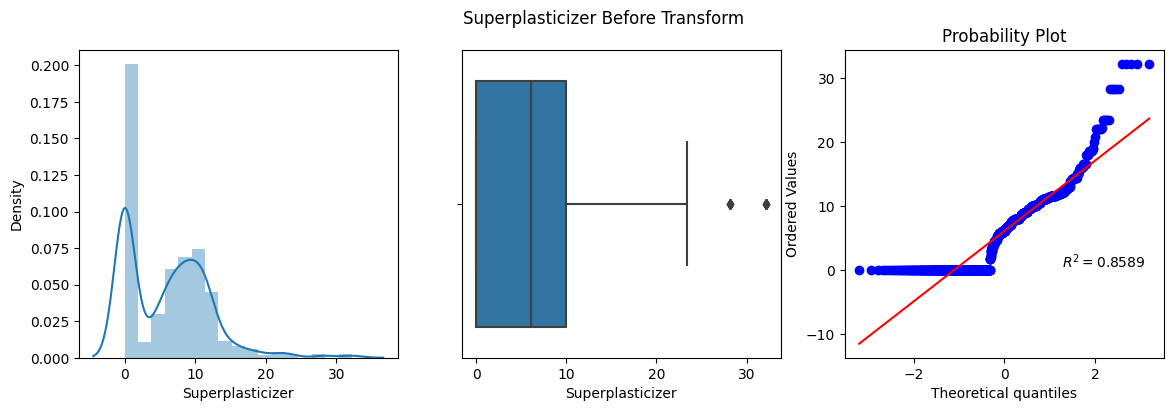

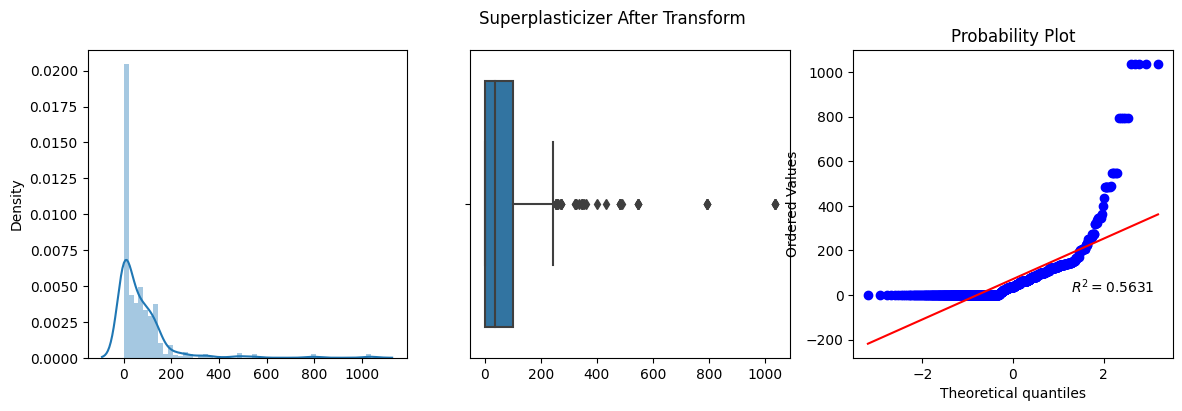

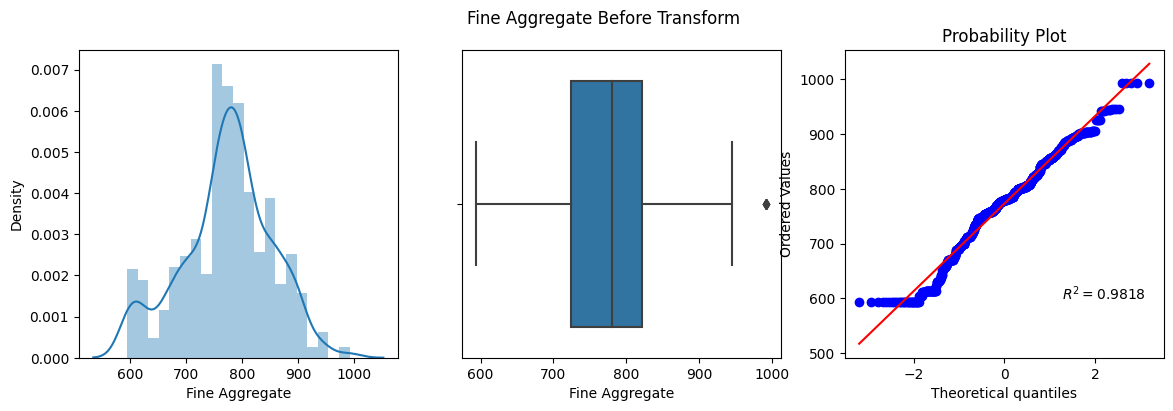

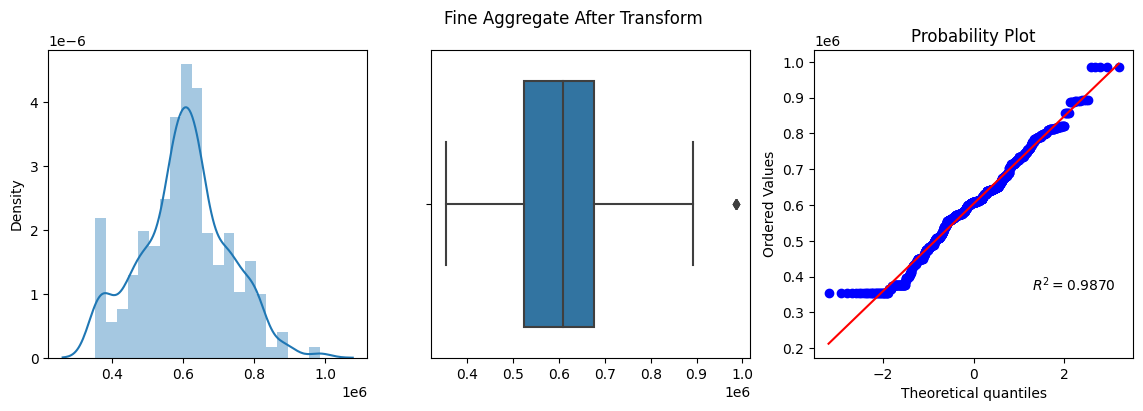

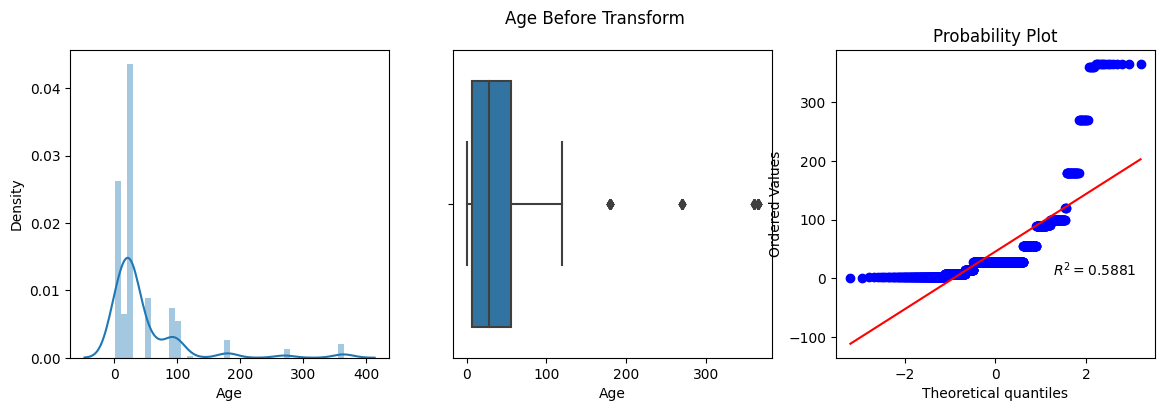

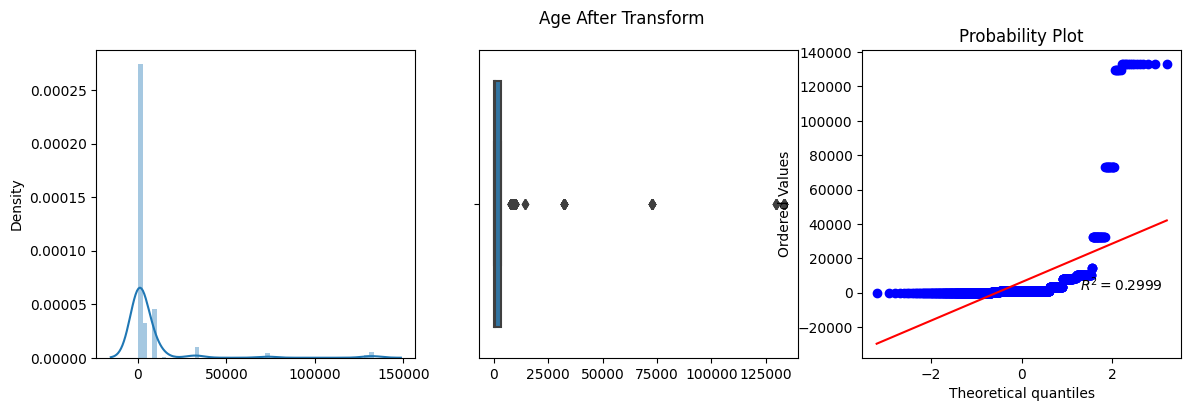

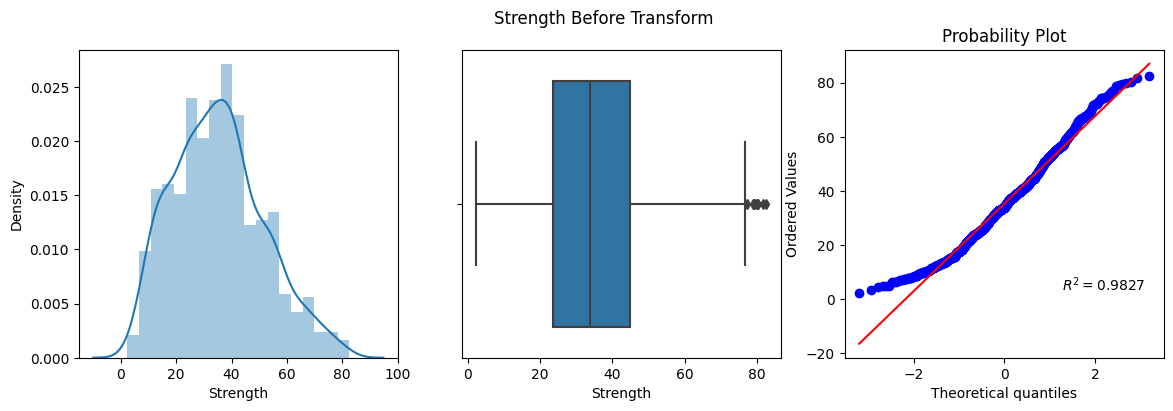

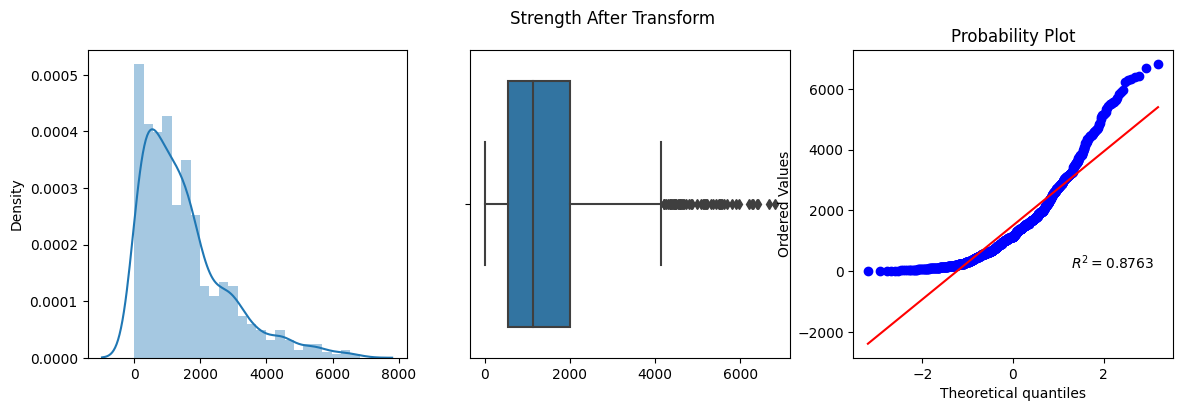

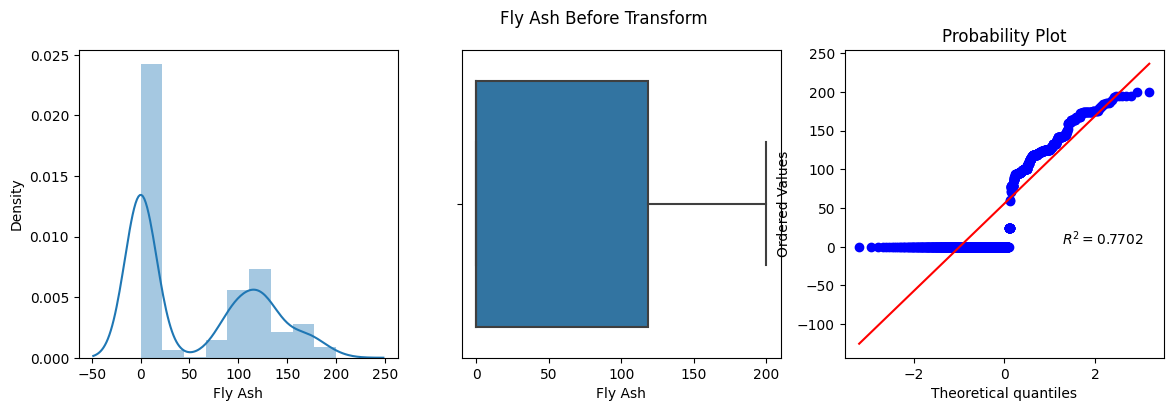

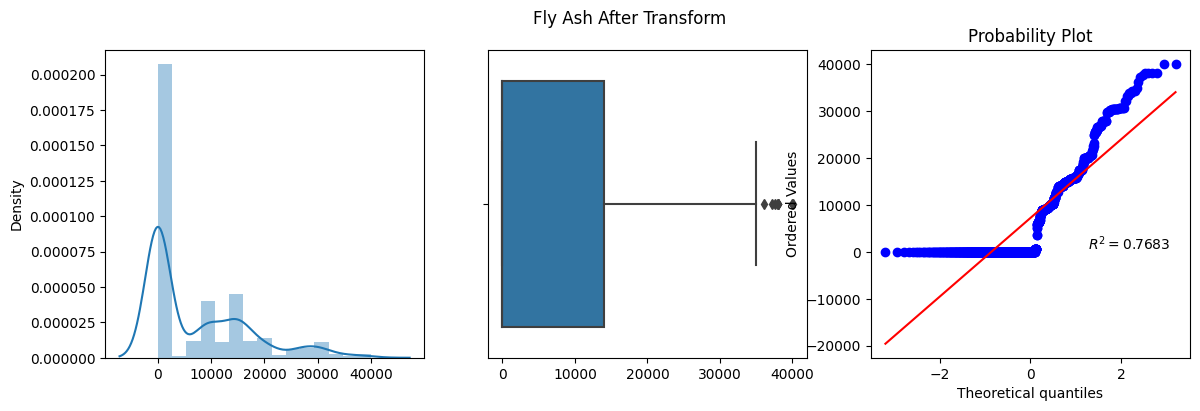

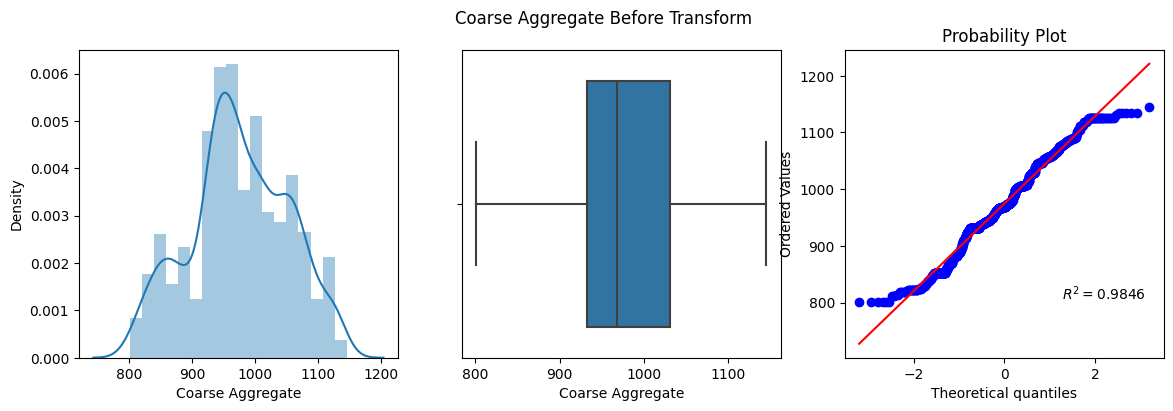

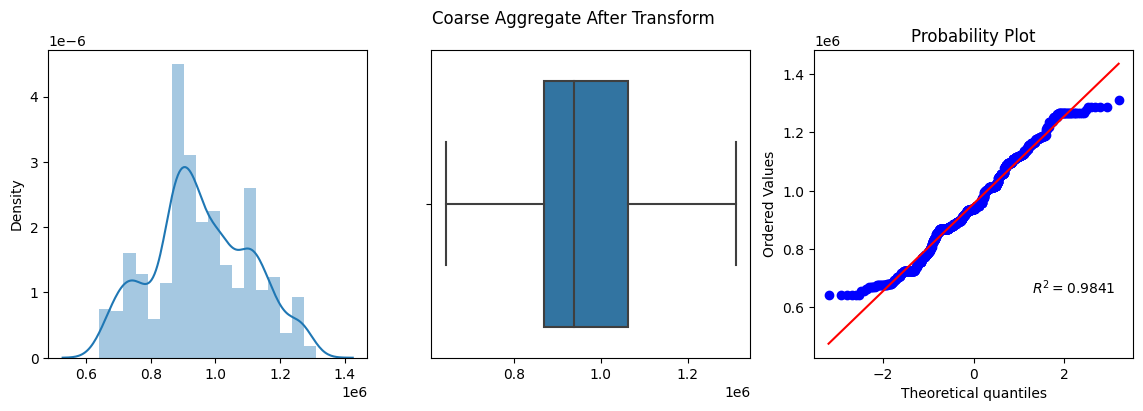

In [17]:
for col in skewed_cols:
    apply_transform(FunctionTransformer(lambda x: x**2),col)

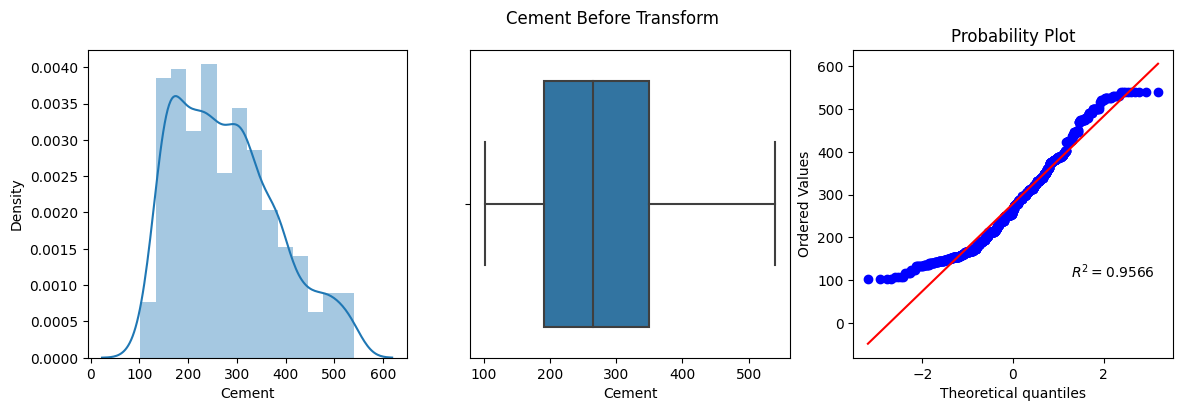

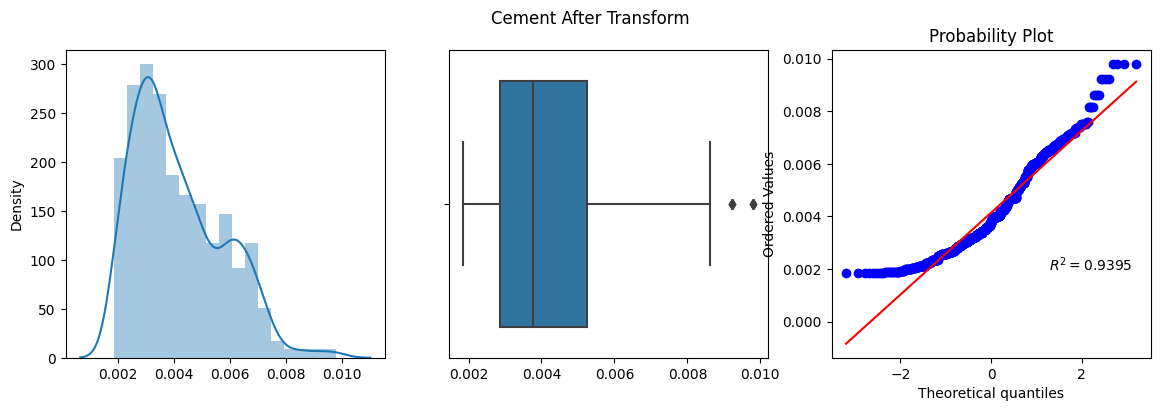

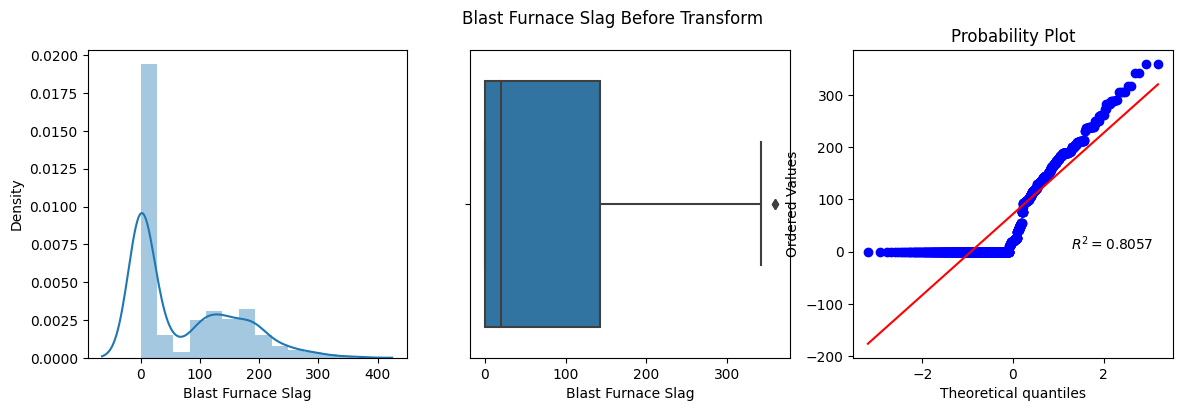

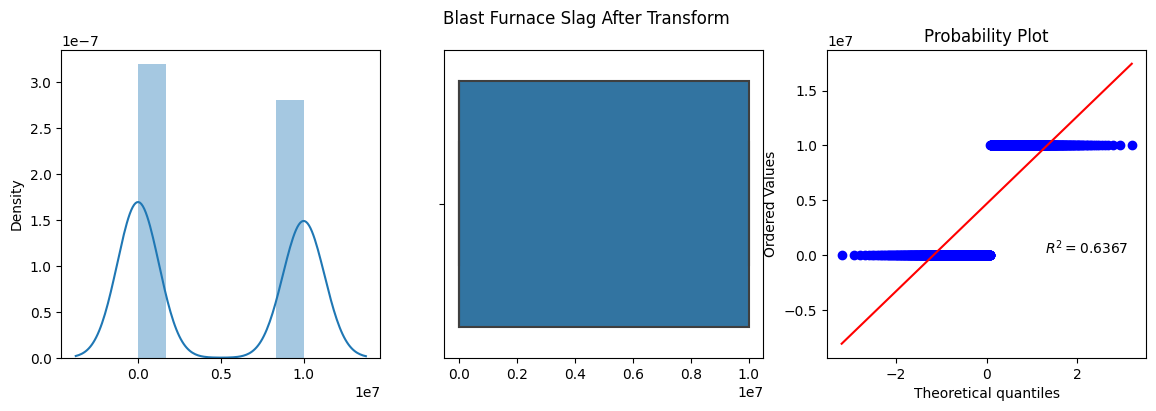

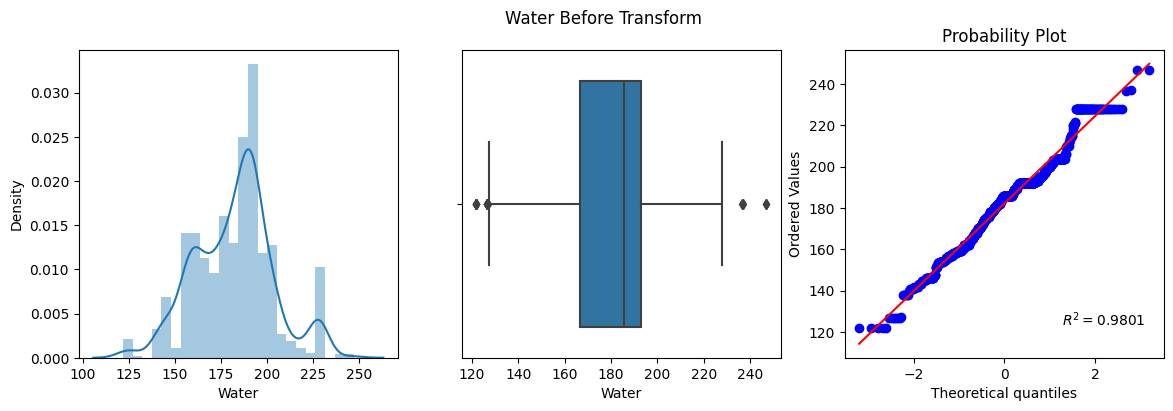

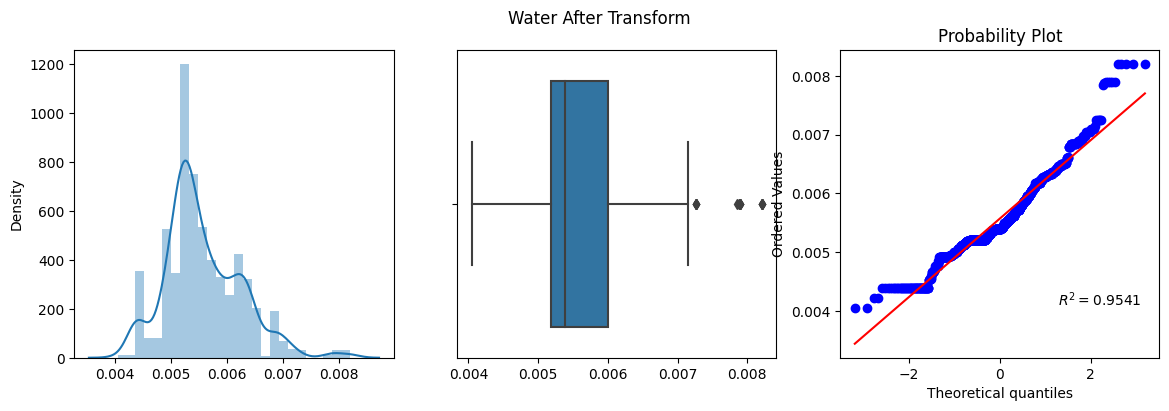

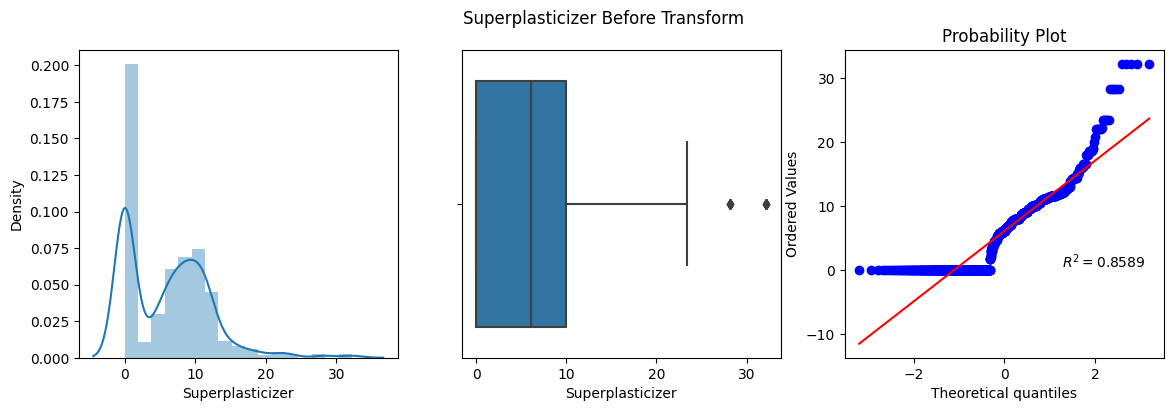

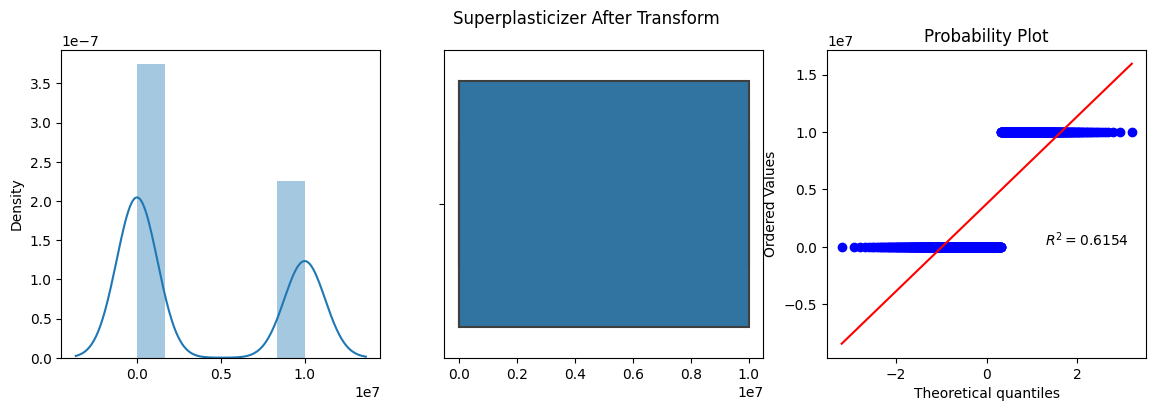

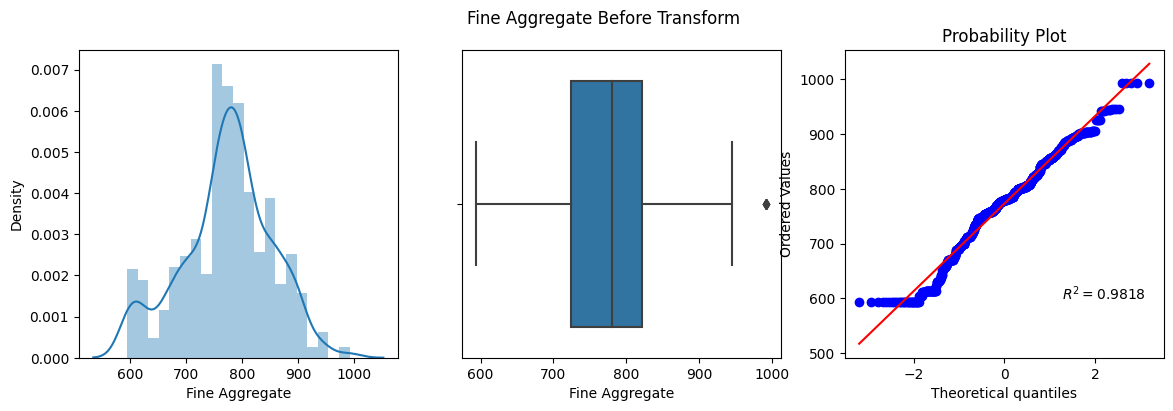

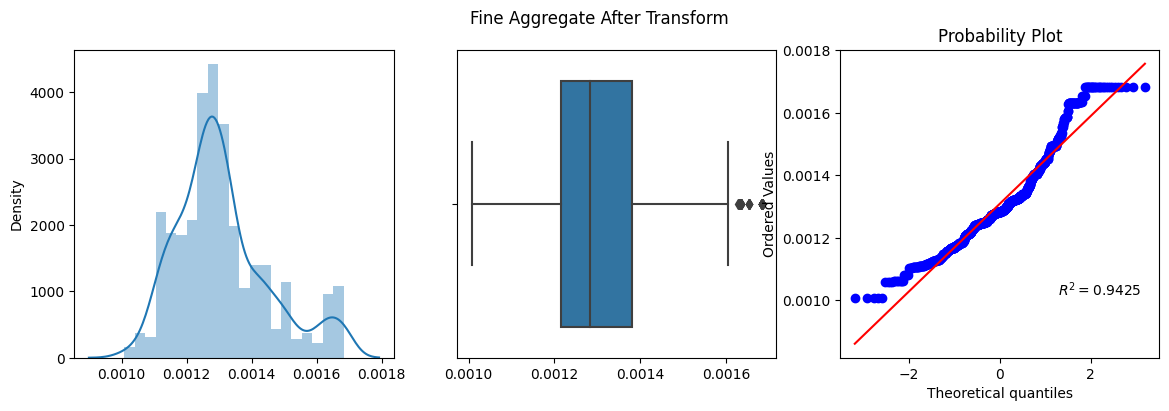

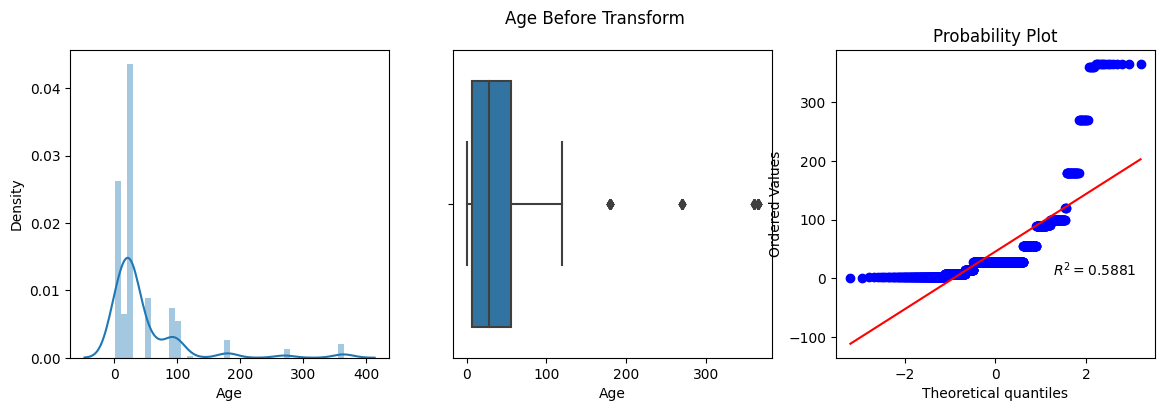

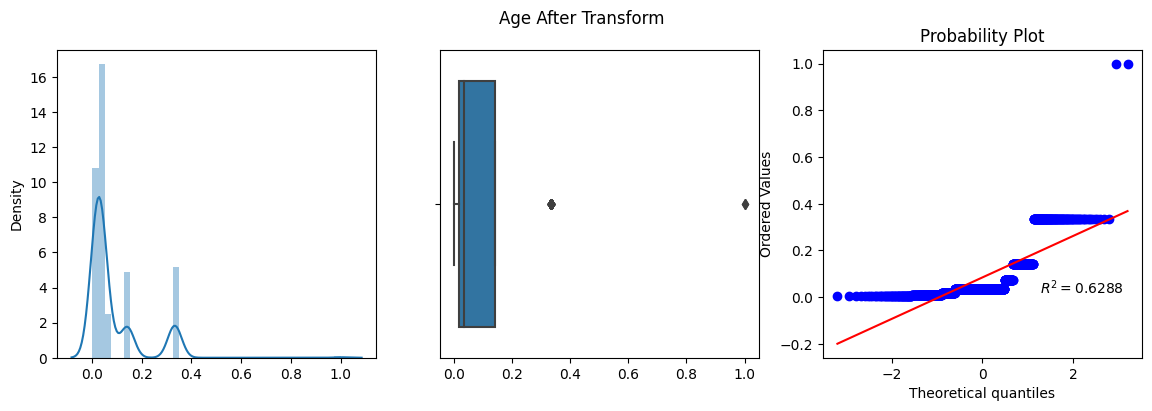

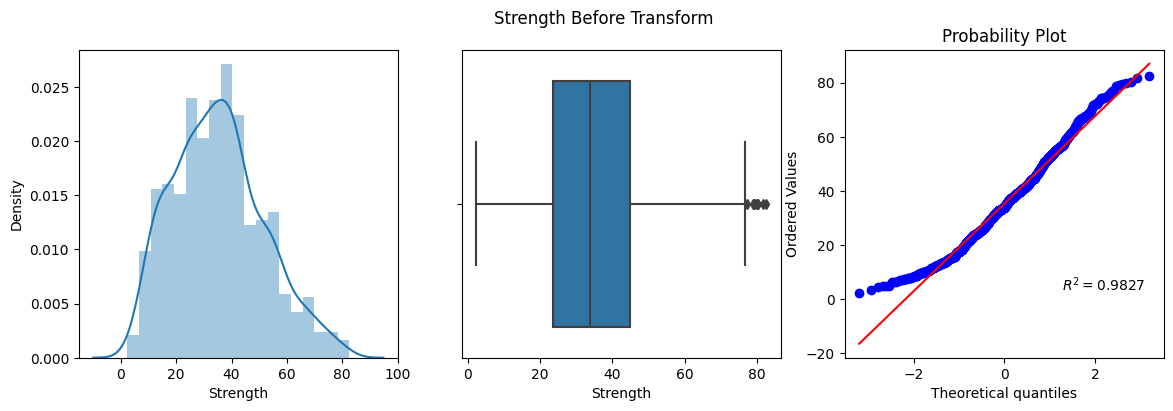

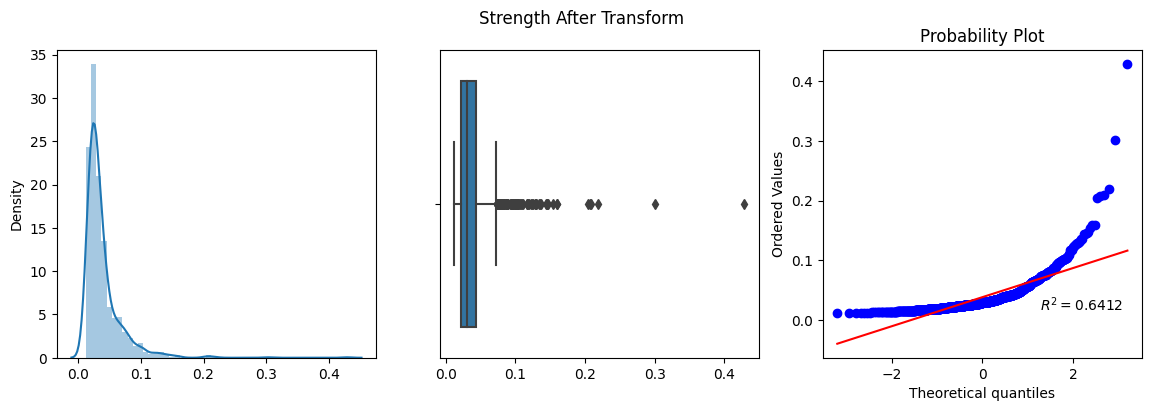

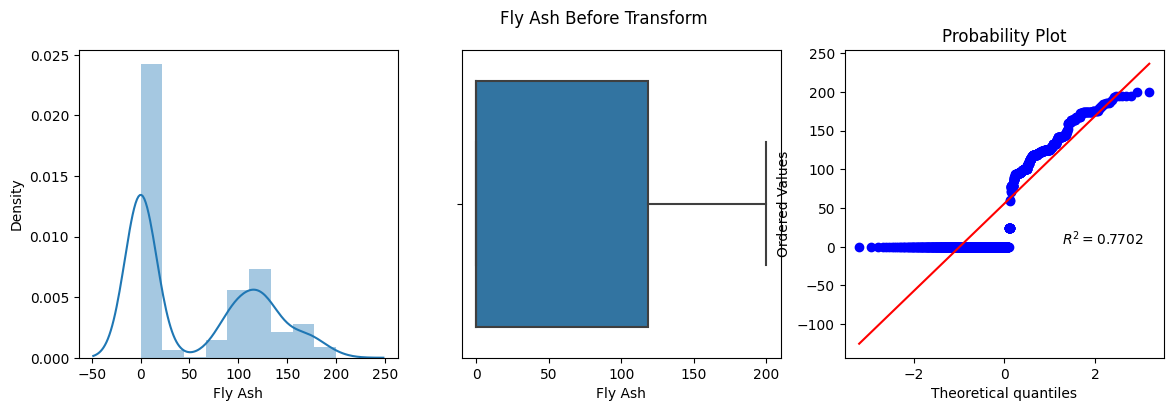

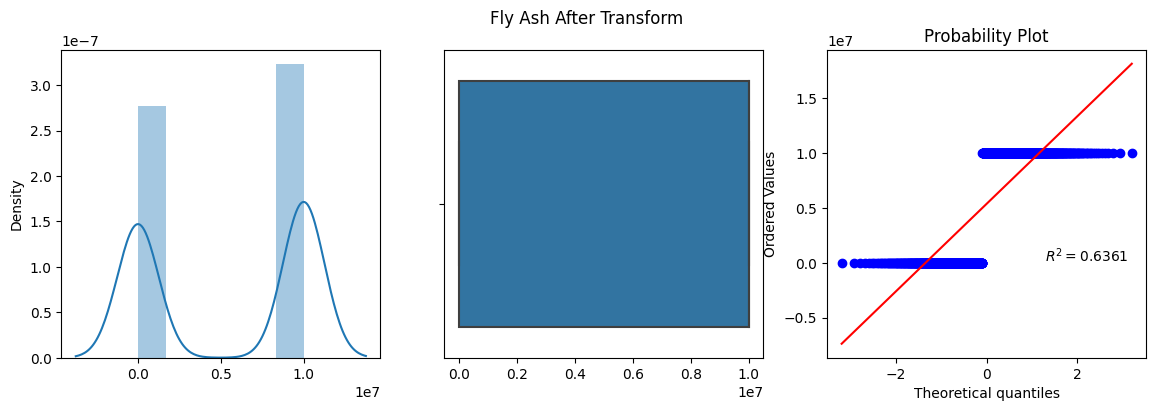

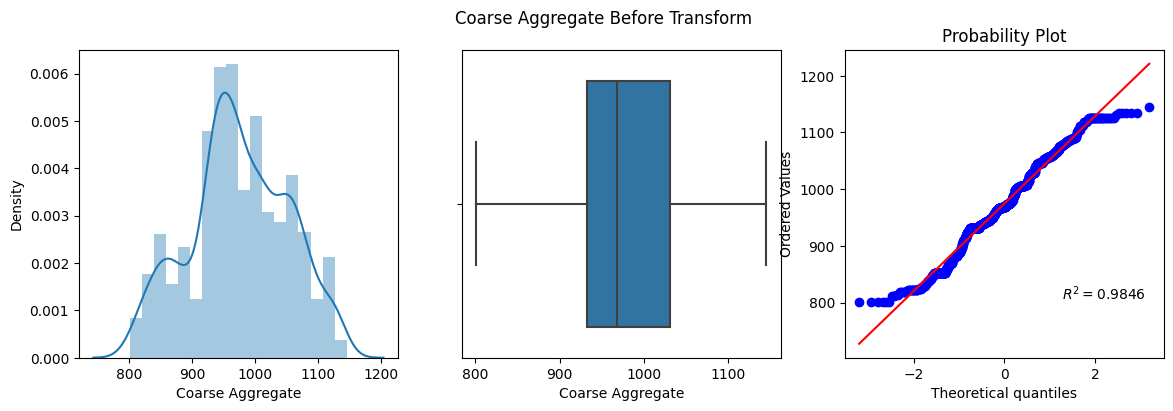

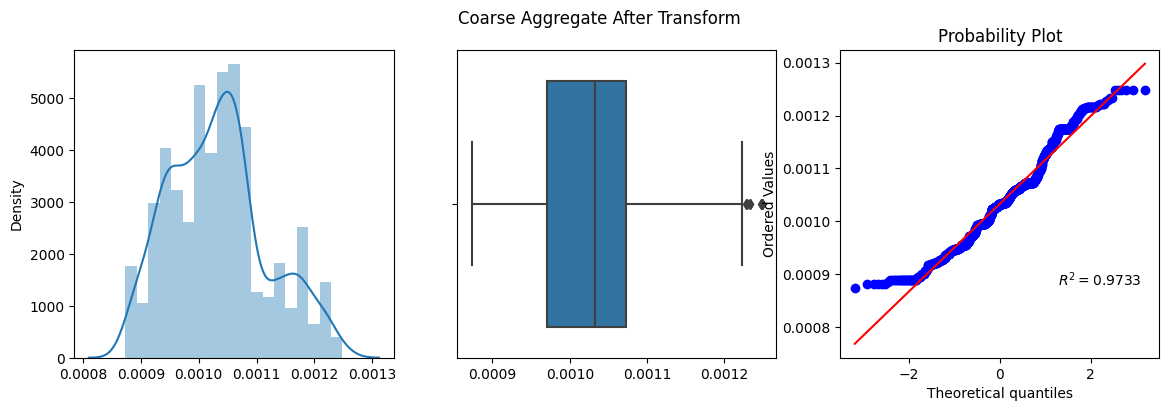

In [18]:
for col in skewed_cols:
    apply_transform(FunctionTransformer(lambda x: 1/(x+0.0000001)),col)

Power Transformer: Cement, Superplasticizer, Water, Course Aggregate, Strength <br>
Log Transform: Age <br>
Reciprocal Transform: None <br>
Square Transform: None <br>
Square Root Transform: None <br>
No Transform: Blast Furnace Slag, Fly Ash

### Outlier Treatment

In [22]:
outlier_cols = ['Blast Furnace Slag','Superplasticizer','Water','Fine Aggregate','Strength','Age']

def impute_outliers(data,col):
    winsorizer = Winsorizer(capping_method='iqr',fold=1.5,tail='both')
    fig = sns.boxplot(winsorizer.fit_transform(data[[col]]).values)
    plt.title(f"Box Plot of {col} after Outlier Removal")
    plt.show(fig)
    plt.close('all')
    del fig
    gc.collect()

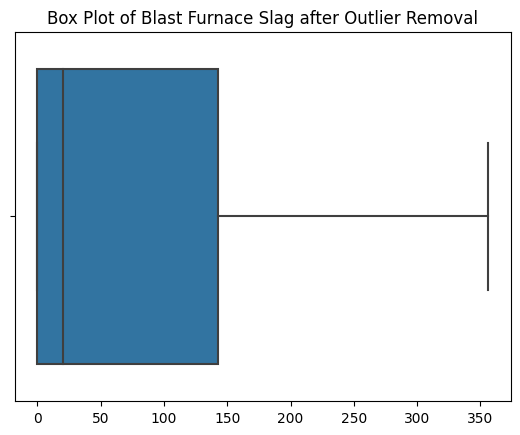

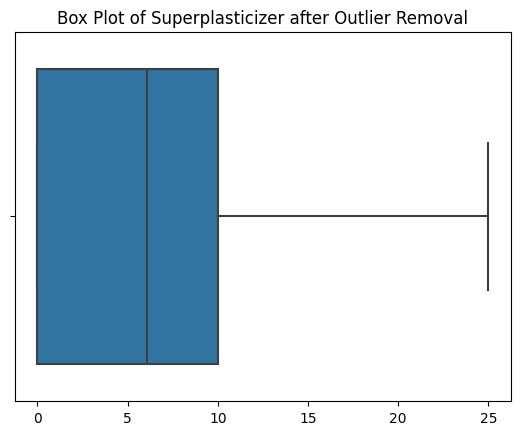

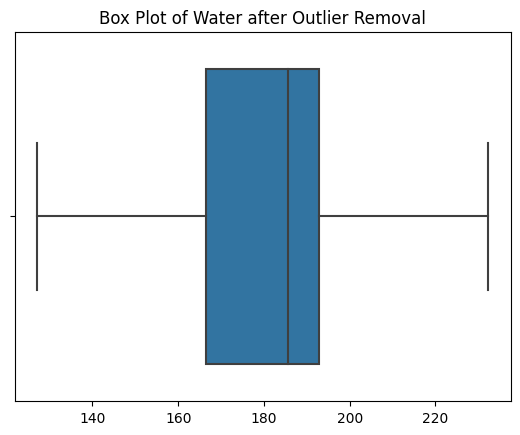

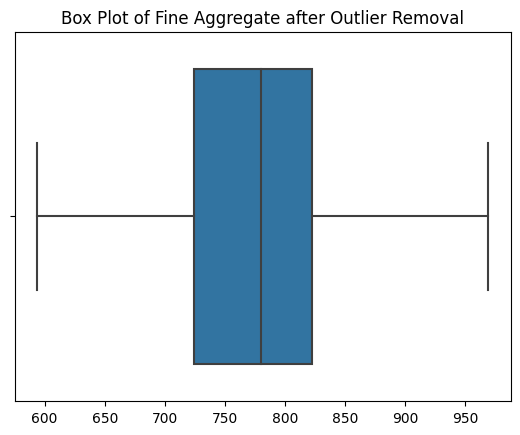

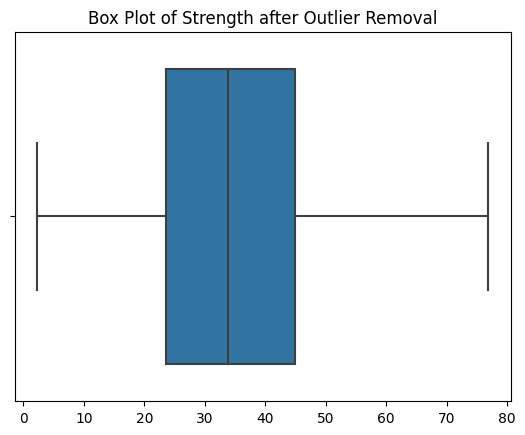

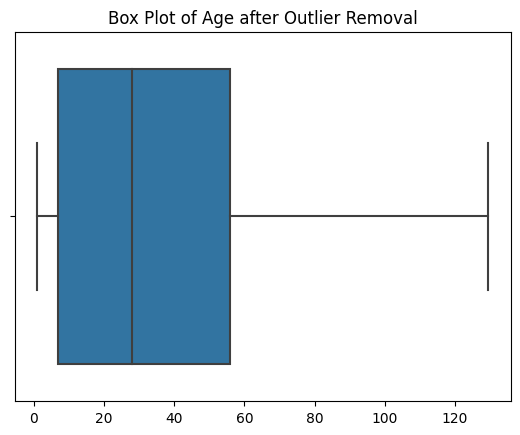

In [23]:
for col in outlier_cols:
    impute_outliers(df,col)

In [24]:
winsorizer = Winsorizer(capping_method='iqr',fold=1.5,tail='both')

for col in outlier_cols:
    df[col] = winsorizer.fit_transform(df[[col]])

Skewness of Cement: 0.5649589710818717
Kurtosis of Cement: -0.4324579679178684


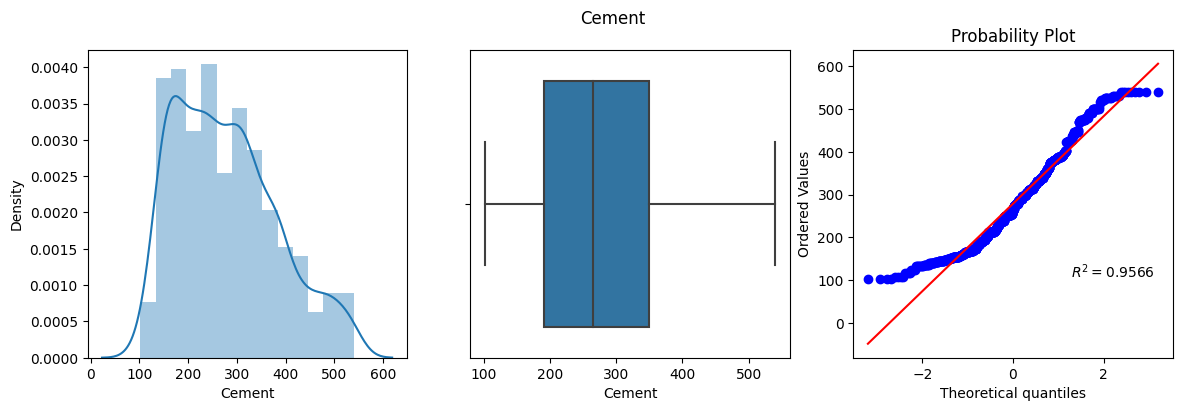

Skewness of Blast Furnace Slag: 0.8536542714260006
Kurtosis of Blast Furnace Slag: -0.415114081788305


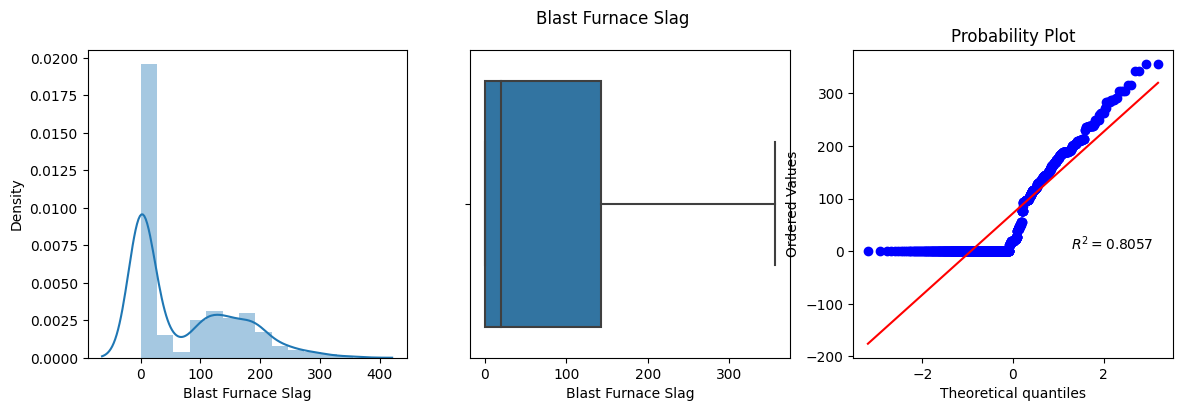

Skewness of Fly Ash: 0.4972312662135868
Kurtosis of Fly Ash: -1.3666936376512488


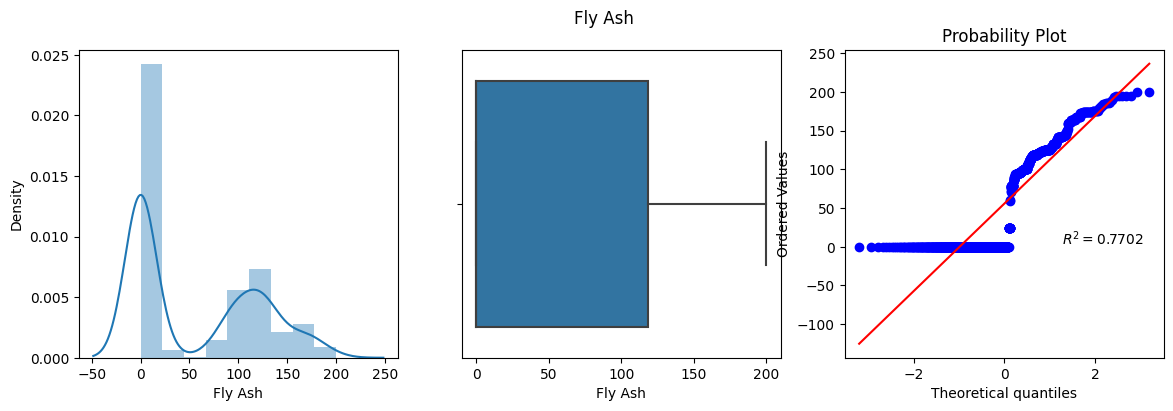

Skewness of Water: 0.02878410393083702
Kurtosis of Water: 0.025709168286796036


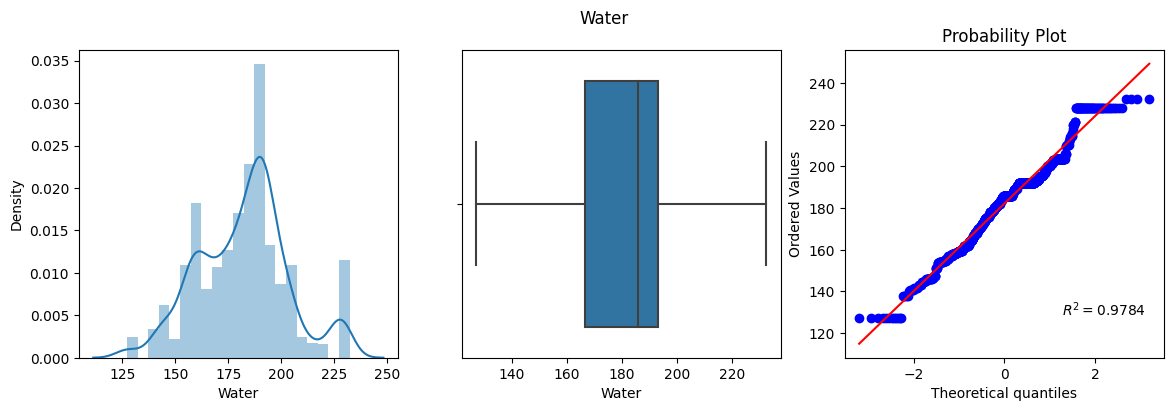

Skewness of Superplasticizer: 0.7083856241606192
Kurtosis of Superplasticizer: 0.2908347632951389


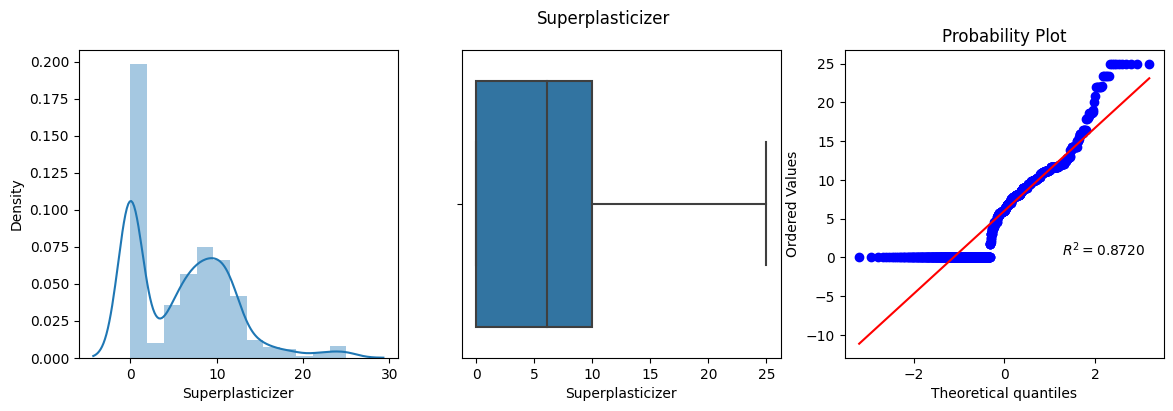

Skewness of Coarse Aggregate: -0.065255998835077
Kurtosis of Coarse Aggregate: -0.5830486495364529


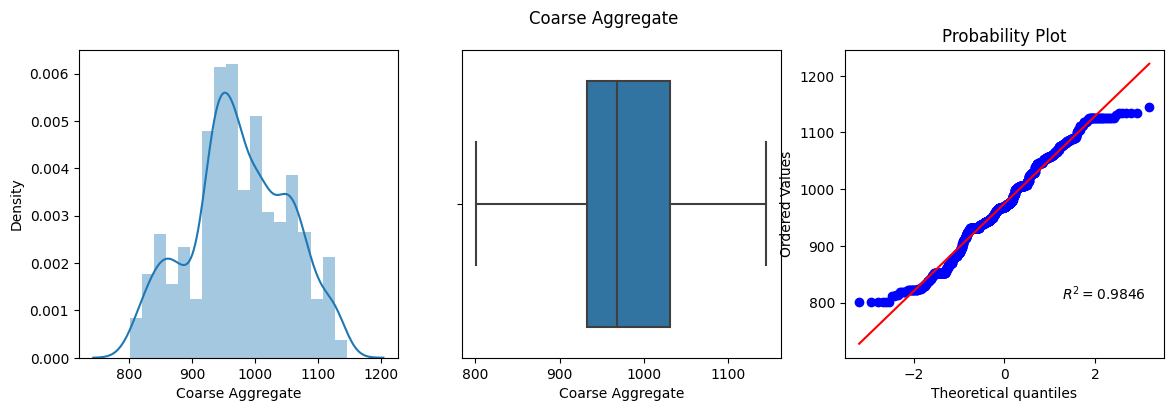

Skewness of Fine Aggregate: -0.2806647636796539
Kurtosis of Fine Aggregate: -0.16714582223147056


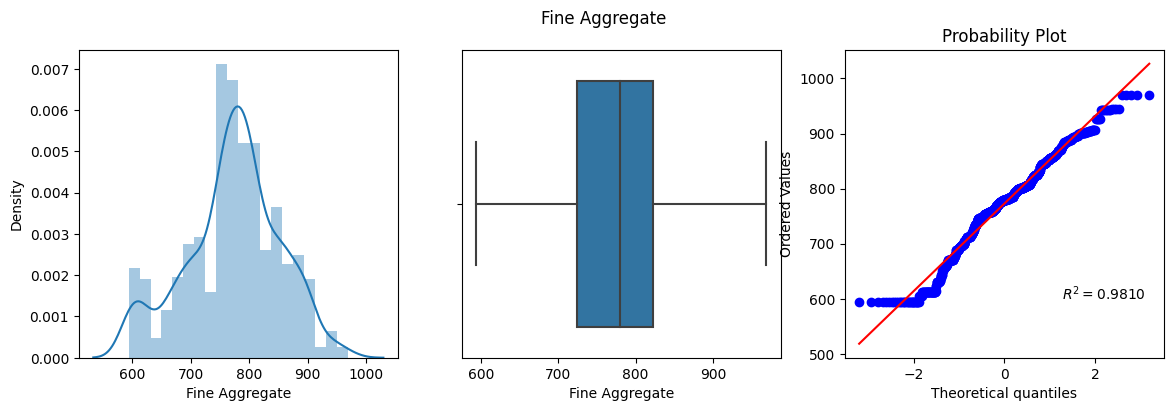

Skewness of Age: 1.2773161312092776
Kurtosis of Age: 0.5615283127242425


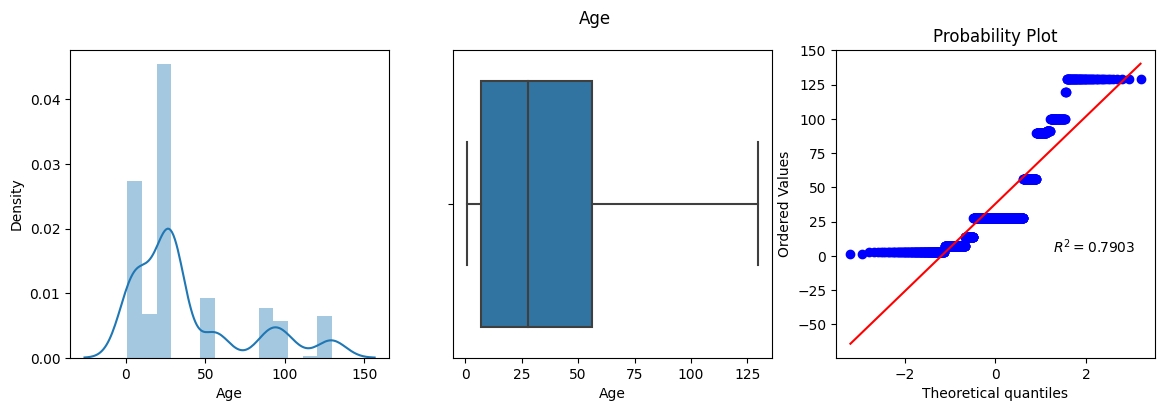

Skewness of Strength: 0.3726821244666138
Kurtosis of Strength: -0.37584191152713675


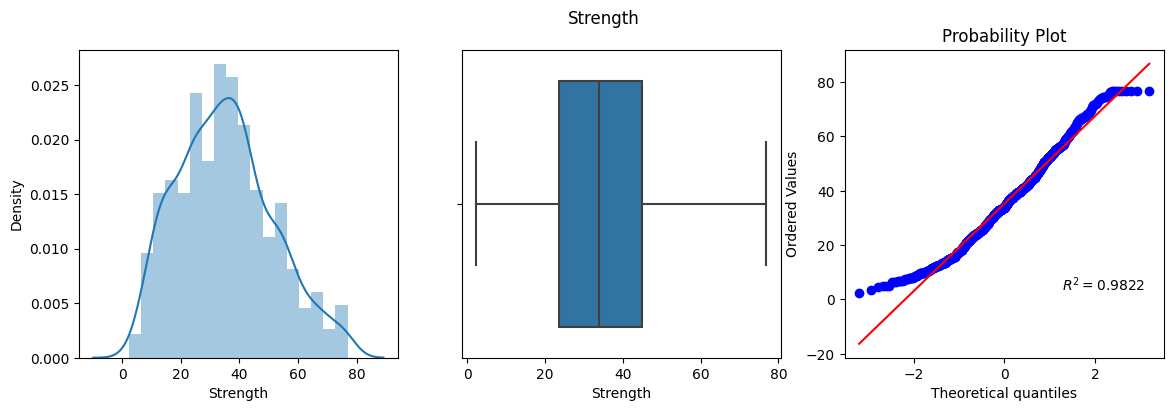

In [26]:
for col in df.columns:
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],rvalue=True,plot=plt,dist='norm')
    plt.suptitle(col)
    plt.show()
    gc.collect();

In [27]:
gc.collect()

0

### Feature Splitting

In [29]:
X = df.drop('Strength',axis=1)
y = df['Strength']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,shuffle=True,random_state=101)

### Feature Selection

In [31]:
kbest = SelectKBest(k=5,score_func=f_regression)
kbest.fit(X_train,y_train)

SelectKBest(k=5, score_func=<function f_regression at 0x0000021C9DE10280>)

In [32]:
selected_features = kbest.get_feature_names_out()
selected_features

array(['Cement', 'Water', 'Superplasticizer', 'Fine Aggregate', 'Age'],
      dtype=object)

In [33]:
perc = SelectPercentile(percentile=60,score_func=f_regression)
perc.fit(X_train,y_train)

SelectPercentile(percentile=60,
                 score_func=<function f_regression at 0x0000021C9DE10280>)

In [34]:
selected_features = perc.get_feature_names_out()
selected_features

array(['Cement', 'Water', 'Superplasticizer', 'Fine Aggregate', 'Age'],
      dtype=object)

In [35]:
lasso = SelectFromModel(estimator=Lasso(),max_features=5)
lasso.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(), max_features=5)

In [36]:
selected_features = lasso.get_feature_names_out()
selected_features

array(['Cement', 'Blast Furnace Slag', 'Water', 'Superplasticizer', 'Age'],
      dtype=object)

In [37]:
rf = RFE(estimator=RandomForestRegressor(),n_features_to_select=5,step=2,verbose=2)
rf.fit(X_train,y_train)

Fitting estimator with 8 features.
Fitting estimator with 6 features.


RFE(estimator=RandomForestRegressor(), n_features_to_select=5, step=2,
    verbose=2)

In [38]:
selected_features = rf.get_feature_names_out()
selected_features

array(['Cement', 'Blast Furnace Slag', 'Water', 'Superplasticizer', 'Age'],
      dtype=object)

In [39]:
sfs = SequentialFeatureSelector(estimator=RandomForestRegressor(),n_features_to_select=5,direction='forward')
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=RandomForestRegressor(),
                          n_features_to_select=5)

In [40]:
selected_features = sfs.get_feature_names_out()
selected_features

array(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Age'],
      dtype=object)

In [41]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
def plot_feature_importances(feat_imp_type):
    feat_imps = xgb.get_booster().get_score(importance_type=feat_imp_type)
    keys = list(feat_imps.keys())
    values = list(feat_imps.values())
    feat_imps_df = pd.DataFrame(data=values, index=keys, columns=["Importance"]).sort_values(by="Importance", ascending=False).reset_index()
    feat_imps_df.rename({'index': 'Feature'},axis=1,inplace=True)
    fig = sns.barplot(x='Importance',y='Feature',data=feat_imps_df,orient='horizontal',palette='viridis')
    plt.title(f"{feat_imp_type.title()} Feature Importance")
    plt.show(fig)
    plt.close('all')
    del fig
    gc.collect();

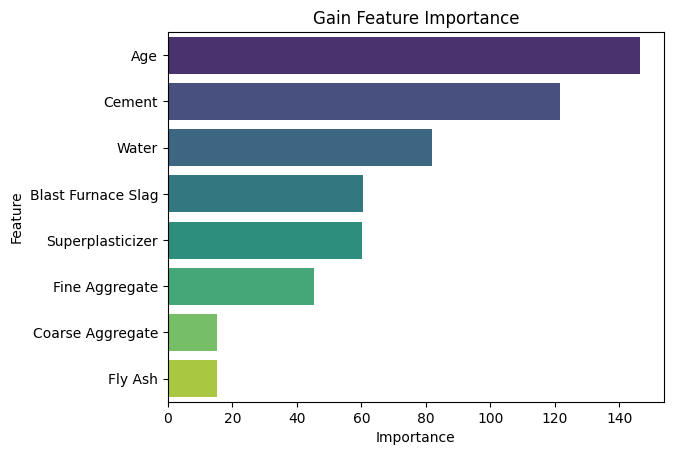

In [43]:
plot_feature_importances('gain')

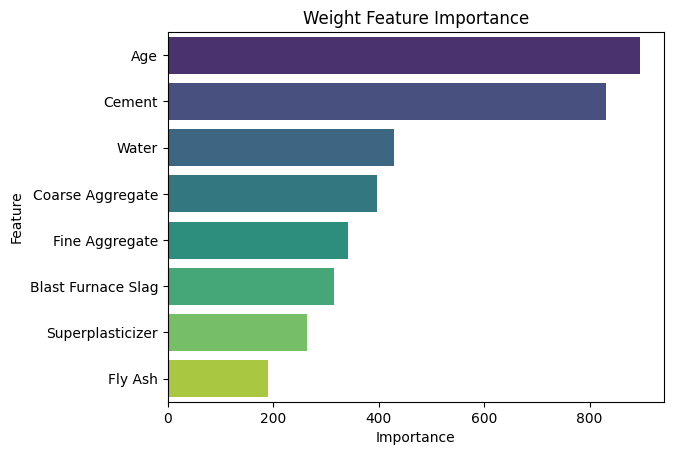

In [44]:
plot_feature_importances('weight')

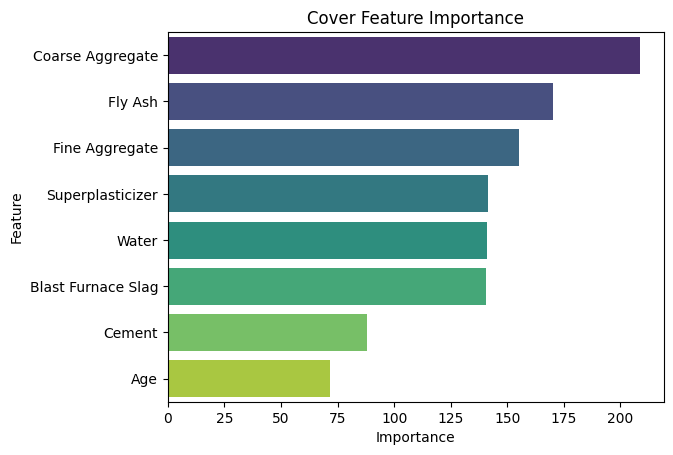

In [45]:
plot_feature_importances('cover')

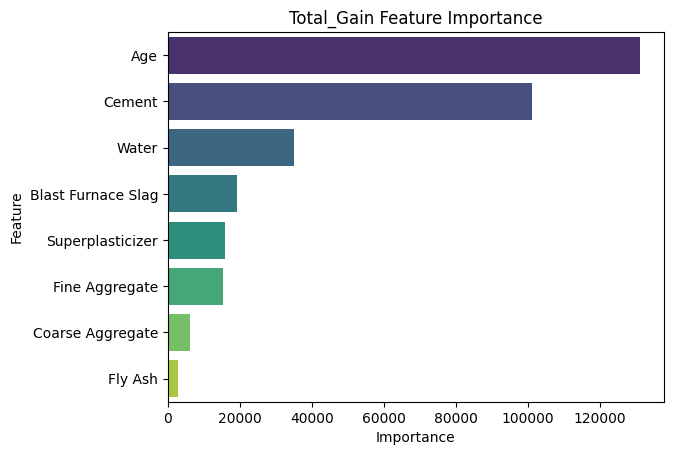

In [46]:
plot_feature_importances('total_gain')

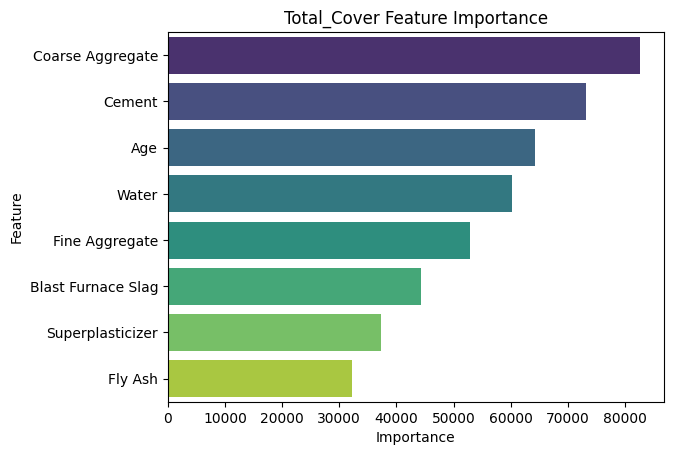

In [47]:
plot_feature_importances('total_cover')

In [50]:
final_selected_features = ['Age', 'Superplasticizer', 'Water', 'Coarse Aggregate', 'Blast Furnace Slag', 'Cement']

final_X_train = X_train[final_selected_features]
final_X_test = X_test[final_selected_features]

In [51]:
gc.collect()

0

### Applying the Column Transformer on the final selected features

In [52]:
transformer = ColumnTransformer(transformers=[
    ('power_transformer',PowerTransformer(),['Cement','Superplasticizer','Water','Coarse Aggregate']),
    ('log_transformer',FunctionTransformer(func=np.log1p,inverse_func=np.expm1),['Age'])
],remainder='passthrough')
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('power_transformer', PowerTransformer(),
                                 ['Cement', 'Superplasticizer', 'Water',
                                  'Coarse Aggregate']),
                                ('log_transformer',
                                 FunctionTransformer(func=<ufunc 'log1p'>,
                                                     inverse_func=<ufunc 'expm1'>),
                                 ['Age'])])

In [53]:
final_X_train_tf = transformer.fit_transform(final_X_train)
final_X_train_tf = pd.DataFrame(final_X_train_tf,columns=final_X_train.columns)
final_X_train_tf.head()

Age  Superplasticizer     Water  Coarse Aggregate  Blast Furnace Slag  \
0 -0.308956         -1.203700  0.576781         -0.094012            3.367296   
1 -0.565784          0.479102 -0.003862          1.201636            1.386294   
2 -0.580195          0.698695 -1.071440          0.429373            2.708050   
3  0.962505          1.837357 -2.630301         -1.586091            4.521789   
4 -0.133108          1.220405 -1.697673          0.165686            4.615121   

   Cement  
0     0.0  
1    98.1  
2     0.0  
3    93.8  
4     0.0

In [54]:
final_X_test_tf = transformer.transform(final_X_test)
final_X_test_tf = pd.DataFrame(final_X_test_tf,columns=final_X_test.columns)
final_X_test_tf.head()

Age  Superplasticizer     Water  Coarse Aggregate  Blast Furnace Slag  \
0 -0.709108         -0.502591  1.139790         -0.432956            3.367296   
1 -1.522613          0.948161 -0.046496          0.056658            3.367296   
2  1.327804          1.396512 -1.350193         -1.586091            3.367296   
3 -0.586218          0.593118 -1.085834          1.465094            1.386294   
4 -0.376105          0.135349  0.647339          0.715672            1.386294   

   Cement  
0    11.0  
1     0.0  
2   106.3  
3     0.0  
4     0.0

### Feature Scaling

In [55]:
scaler = StandardScaler()
features = final_X_train_tf.columns
final_X_train_tf = scaler.fit_transform(final_X_train_tf)
final_X_train_tf = pd.DataFrame(final_X_train_tf,columns=features)
final_X_test_tf = scaler.transform(final_X_test_tf)
final_X_test_tf = pd.DataFrame(final_X_test_tf,columns=features)
final_X_train_tf.head()

Age  Superplasticizer     Water  Coarse Aggregate  Blast Furnace Slag  \
0 -0.308956         -1.203700  0.576781         -0.094012            0.157495   
1 -0.565784          0.479102 -0.003862          1.201636           -1.718892   
2 -0.580195          0.698695 -1.071440          0.429373           -0.466937   
3  0.962505          1.837357 -2.630301         -1.586091            1.251021   
4 -0.133108          1.220405 -1.697673          0.165686            1.339424   

     Cement  
0 -0.835794  
1  0.309580  
2 -0.835794  
3  0.259375  
4 -0.835794

In [56]:
final_X_test_tf.head()

Age  Superplasticizer     Water  Coarse Aggregate  Blast Furnace Slag  \
0 -0.709108         -0.502591  1.139790         -0.432956            0.157495   
1 -1.522613          0.948161 -0.046496          0.056658            0.157495   
2  1.327804          1.396512 -1.350193         -1.586091            0.157495   
3 -0.586218          0.593118 -1.085834          1.465094           -1.718892   
4 -0.376105          0.135349  0.647339          0.715672           -1.718892   

     Cement  
0 -0.707362  
1 -0.835794  
2  0.405320  
3 -0.835794  
4 -0.835794

## Model Training & Evaluation

In [57]:
models = []
r2_scores = []
mape_scores = []
rmse_scores = []

In [58]:
def train_and_evaluate_model(model):
    model.fit(final_X_train_tf,y_train)
    y_pred = model.predict(final_X_test_tf)
    r2 = r2_score(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    mape = mean_absolute_percentage_error(y_test,y_pred)
    print("R2 Score:",r2)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    models.append(model)
    r2_scores.append(r2)
    mape_scores.append(mape)
    rmse_scores.append(rmse)
    gc.collect()

In [59]:
train_and_evaluate_model(LinearRegression())

R2 Score: 0.8234891257193805
RMSE: 6.945192431352772
MAPE: 0.18474751257779842


In [60]:
train_and_evaluate_model(SGDRegressor())

R2 Score: 0.8229100835605203
RMSE: 6.956574921137219
MAPE: 0.184898982238192


In [61]:
train_and_evaluate_model(PassiveAggressiveRegressor())

R2 Score: 0.8026566217600761
RMSE: 7.343613803286144
MAPE: 0.19451934207350124


In [62]:
train_and_evaluate_model(ARDRegression())

R2 Score: 0.8237917750780435
RMSE: 6.939235688368367
MAPE: 0.18317669808746023


In [63]:
train_and_evaluate_model(RANSACRegressor())

R2 Score: 0.780457524133884
RMSE: 7.74564929167127
MAPE: 0.1968457303541145


In [64]:
train_and_evaluate_model(PoissonRegressor())

R2 Score: 0.7621264343969683
RMSE: 8.062535529983778
MAPE: 0.23027377493797793


In [65]:
train_and_evaluate_model(GammaRegressor())

R2 Score: 0.5704622821488397
RMSE: 10.834258737723813
MAPE: 0.34794281359530516


In [66]:
train_and_evaluate_model(TheilSenRegressor())

R2 Score: 0.8239666663628842
RMSE: 6.935791146744896
MAPE: 0.18220211592852026


In [67]:
train_and_evaluate_model(TweedieRegressor())

R2 Score: 0.5734577914284247
RMSE: 10.796414677098518
MAPE: 0.3657477487796251


In [68]:
train_and_evaluate_model(HuberRegressor())

R2 Score: 0.8185716873439305
RMSE: 7.041271348920273
MAPE: 0.1841347800860444


In [69]:
train_and_evaluate_model(Lasso())

R2 Score: 0.7887417990426485
RMSE: 7.598105838458927
MAPE: 0.21260679969417431


In [70]:
train_and_evaluate_model(Ridge())

R2 Score: 0.8233850162294774
RMSE: 6.947240333095271
MAPE: 0.18467453460535815


In [71]:
train_and_evaluate_model(ElasticNet())

R2 Score: 0.6620327288564767
RMSE: 9.610276273234016
MAPE: 0.3132730668318949


In [72]:
train_and_evaluate_model(BayesianRidge())

R2 Score: 0.8233597327778778
RMSE: 6.947737584022338
MAPE: 0.18465725136666244


In [73]:
train_and_evaluate_model(KNeighborsRegressor())

R2 Score: 0.8553460997905545
RMSE: 6.287291904789513
MAPE: 0.15451389977994573


In [74]:
train_and_evaluate_model(SVR())

R2 Score: 0.7838346776228244
RMSE: 7.685843953995791
MAPE: 0.19433776095777588


In [75]:
train_and_evaluate_model(NuSVR())

R2 Score: 0.7674124222848757
RMSE: 7.97245007218804
MAPE: 0.22710182587319236


In [76]:
train_and_evaluate_model(LinearSVR())

R2 Score: 0.8122226424726369
RMSE: 7.16341582280255
MAPE: 0.17949599885238096


In [77]:
train_and_evaluate_model(DecisionTreeRegressor())

R2 Score: 0.7992992504788152
RMSE: 7.4058182132894155
MAPE: 0.17829522488935942


In [78]:
train_and_evaluate_model(RandomForestRegressor())

R2 Score: 0.9079270580073485
RMSE: 5.016081225515464
MAPE: 0.12598737128470694


In [79]:
train_and_evaluate_model(ExtraTreesRegressor())

R2 Score: 0.9173175688186039
RMSE: 4.753408837699072
MAPE: 0.11002664467278046


In [80]:
train_and_evaluate_model(BaggingRegressor())

R2 Score: 0.9001490721074533
RMSE: 5.223656405431692
MAPE: 0.12714050022858306


In [81]:
train_and_evaluate_model(AdaBoostRegressor())

R2 Score: 0.7938100193637536
RMSE: 7.506410817528506
MAPE: 0.26283673810737157


In [82]:
train_and_evaluate_model(GradientBoostingRegressor())

R2 Score: 0.9073879443765799
RMSE: 5.030745092701502
MAPE: 0.13009400116367448


In [83]:
train_and_evaluate_model(HistGradientBoostingRegressor())

R2 Score: 0.9348357721172125
RMSE: 4.219909888091361
MAPE: 0.10301022081493766


In [84]:
train_and_evaluate_model(XGBRegressor())

R2 Score: 0.9304301940509809
RMSE: 4.360225457569062
MAPE: 0.10005203860298813


In [85]:
train_and_evaluate_model(XGBRFRegressor())

R2 Score: 0.8401411955004456
RMSE: 6.609472967149207
MAPE: 0.18070279782036655


In [86]:
train_and_evaluate_model(MLPRegressor())

R2 Score: 0.7361800121927733
RMSE: 8.490874038990265
MAPE: 0.23504331309956097


In [87]:
train_and_evaluate_model(LGBMRegressor())

R2 Score: 0.9292914609917864
RMSE: 4.39576515632203
MAPE: 0.10367094181813069


In [88]:
train_and_evaluate_model(CatBoostRegressor(silent=True))

R2 Score: 0.9582656233026258
RMSE: 3.3771124051890404
MAPE: 0.07992649381472822


In [89]:
train_and_evaluate_model(VotingRegressor(estimators=[
    ('CAT',CatBoostRegressor(silent=True)),
    ('XGB',XGBRegressor()),
    ('LGBM',LGBMRegressor()),
    ('HGB',HistGradientBoostingRegressor())
],verbose=3))

[Voting] ...................... (1 of 4) Processing CAT, total=   1.9s
[Voting] ...................... (2 of 4) Processing XGB, total=   0.1s
[Voting] ..................... (3 of 4) Processing LGBM, total=   0.0s
[Voting] ...................... (4 of 4) Processing HGB, total=   0.4s
R2 Score: 0.9463374225279421
RMSE: 3.8294315804973342
MAPE: 0.08949899048552094


In [90]:
train_and_evaluate_model(StackingRegressor(estimators=[
    ('CAT',CatBoostRegressor(silent=True)),
    ('XGB',XGBRegressor()),
    ('HGB',HistGradientBoostingRegressor())
],final_estimator=LGBMRegressor(),verbose=3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


R2 Score: 0.9479828964342437
RMSE: 3.7702628886598823
MAPE: 0.09519245787417327


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished


## Baseline Models Performance Comparison

In [91]:
model_perfs = pd.DataFrame({'model': models, 'r2': r2_scores, 'rmse': rmse_scores, 'mape': mape_scores}).sort_values('r2',ascending=False).reset_index()
model_perfs

index                                              model        r2  \
0      29  <catboost.core.CatBoostRegressor object at 0x0...  0.958266   
1      31  StackingRegressor(estimators=[('CAT',\n       ...  0.947983   
2      30  VotingRegressor(estimators=[('CAT',\n         ...  0.946337   
3      24                    HistGradientBoostingRegressor()  0.934836   
4      25  XGBRegressor(base_score=None, booster=None, ca...  0.930430   
5      28                                    LGBMRegressor()  0.929291   
6      20  (ExtraTreeRegressor(random_state=1327462317), ...  0.917318   
7      19  (DecisionTreeRegressor(max_features='auto', ra...  0.907927   
8      23  ([DecisionTreeRegressor(criterion='friedman_ms...  0.907388   
9      21  (DecisionTreeRegressor(random_state=1417764542...  0.900149   
10     14                              KNeighborsRegressor()  0.855346   
11     26  XGBRFRegressor(base_score=None, booster=None, ...  0.840141   
12      7                                TheilSenRegressor()  0.823967   
13      3                                    ARDRegression()  0.823792   
14      0                                 LinearRegression()  0.823489   
15     11                                            Ridge()  0.823385   
16     13                                    BayesianRidge()  0.823360   
17      1                                     SGDRegressor()  0.822910   
18      9                                   HuberRegressor()  0.818572   
19     17                                        LinearSVR()  0.812223   
20      2                       PassiveAggressiveRegressor()  0.802657   
21     18                            DecisionTreeRegressor()  0.799299   
22     22  (DecisionTreeRegressor(max_depth=3, random_sta...  0.793810   
23     10                                            Lasso()  0.788742   
24     15                                              SVR()  0.783835   
25      4                                  RANSACRegressor()  0.780458   
26     16                                            NuSVR()  0.767412   
27      5                                 PoissonRegressor()  0.762126   
28     27                                     MLPRegressor()  0.736180   
29     12                                       ElasticNet()  0.662033   
30      8                                 TweedieRegressor()  0.573458   
31      6                                   GammaRegressor()  0.570462   

         rmse      mape  
0    3.377112  0.079926  
1    3.770263  0.095192  
2    3.829432  0.089499  
3    4.219910  0.103010  
4    4.360225  0.100052  
5    4.395765  0.103671  
6    4.753409  0.110027  
7    5.016081  0.125987  
8    5.030745  0.130094  
9    5.223656  0.127141  
10   6.287292  0.154514  
11   6.609473  0.180703  
12   6.935791  0.182202  
13   6.939236  0.183177  
14   6.945192  0.184748  
15   6.947240  0.184675  
16   6.947738  0.184657  
17   6.956575  0.184899  
18   7.041271  0.184135  
19   7.163416  0.179496  
20   7.343614  0.194519  
21   7.405818  0.178295  
22   7.506411  0.262837  
23   7.598106  0.212607  
24   7.685844  0.194338  
25   7.745649  0.196846  
26   7.972450  0.227102  
27   8.062536  0.230274  
28   8.490874  0.235043  
29   9.610276  0.313273  
30  10.796415  0.365748  
31  10.834259  0.347943

The Cat Boost Regressor is the best performing model which outperformed all other models by producing an excellent r2 score of almost 95.83% on the test dataset. 

## Hyperparameter Optimization & Cross Validation

In [92]:
param_grid = {'n_neighbors': [2,8,12,20],
              'weights': ['uniform','distance'],
              'algorithm': ['ball_tree', 'brute'],
              'metric': ['minkowski','manhattan','euclidean','chebyshev'],
              'p': [1,2]
             }

grid_knn = RandomizedSearchCV(KNeighborsRegressor(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_knn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END algorithm=brute, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=euclidean, n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=manhattan, n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=brute, metric=ma

In [93]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.8,1.0],
              'loss': ['squared_error','absolute_error','poisson','quantile'],
              'max_bins': np.arange(0,255,50),
              'interaction_cst': ['pairwise','no_interaction']}

grid_hgb = RandomizedSearchCV(HistGradientBoostingRegressor(),param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_hgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END interaction_cst=no_interaction, learning_rate=0.4, loss=absolute_error, max_bins=0; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.4, loss=absolute_error, max_bins=0; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.4, loss=absolute_error, max_bins=0; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.4, loss=absolute_error, max_bins=0; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.4, loss=absolute_error, max_bins=0; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.4, loss=squared_error, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.4, loss=squared_error, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction, learning_rate=0.4, loss=squared_error, max_bins=100; total time=   0.0s
[CV] END interaction_cst=no_interaction,

In [94]:
param_grid = {'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
             'C': [0.0001,0.001,0.01,0.1,1],
             'epsilon': np.linspace(0.001,1,5)}

grid_lsvr = RandomizedSearchCV(LinearSVR(),param_grid,cv=5,verbose=2,n_jobs=10)
train_and_evaluate_model(grid_lsvr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
R2 Score: 0.8233941059647596
RMSE: 6.947061556111715
MAPE: 0.18464318521204248


In [95]:
param_grid = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
              'splitter': ['best','random'],
              'max_features': ['sqrt','log2']
             }

grid_dt = RandomizedSearchCV(DecisionTreeRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_dt)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=squared_error, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=log2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_features=sqrt, splitter=random; total time=   0.0s
[CV] END criterion=absolute_error, max_features=s

In [96]:
param_grid =  {'loss': ['squared_error','absolute_error','huber','quantile'],
                'n_estimators': [100,400,700,1000],
                'learning_rate': [0.2,0.4,0.7,1],
                'criterion': ['friedman_mse','squared_error'],
                'max_features': ['sqrt','log2']
                }
    
grid_gb = RandomizedSearchCV(GradientBoostingRegressor(),param_grid,verbose=4,cv=5)
train_and_evaluate_model(grid_gb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=1000;, score=0.897 total time=   0.6s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=1000;, score=0.889 total time=   0.6s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=1000;, score=0.870 total time=   0.6s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=1000;, score=0.870 total time=   0.5s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.7, loss=squared_error, max_features=sqrt, n_estimators=1000;, score=0.816 total time=   0.6s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.2, loss=squared_error, max_features=sqrt, n_estimators=400;, score=0.927 total time=   0.2s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.2, loss=squ

In [97]:
param_grid = {'learning_rate': [0.2,0.4,0.5,0.7,1],
'n_estimators': [100,400,700,800,1000]
}
    
grid_cat = RandomizedSearchCV(CatBoostRegressor(silent=True),param_grid,verbose=5,cv=5)
train_and_evaluate_model(grid_cat)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.2, n_estimators=800;, score=0.930 total time=   1.8s
[CV 2/5] END learning_rate=0.2, n_estimators=800;, score=0.928 total time=   1.4s
[CV 3/5] END learning_rate=0.2, n_estimators=800;, score=0.915 total time=   1.4s
[CV 4/5] END learning_rate=0.2, n_estimators=800;, score=0.899 total time=   1.4s
[CV 5/5] END learning_rate=0.2, n_estimators=800;, score=0.892 total time=   1.5s
[CV 1/5] END .learning_rate=1, n_estimators=400;, score=0.908 total time=   1.1s
[CV 2/5] END .learning_rate=1, n_estimators=400;, score=0.896 total time=   1.0s
[CV 3/5] END .learning_rate=1, n_estimators=400;, score=0.879 total time=   1.1s
[CV 4/5] END .learning_rate=1, n_estimators=400;, score=0.859 total time=   0.9s
[CV 5/5] END .learning_rate=1, n_estimators=400;, score=0.860 total time=   1.0s
[CV 1/5] END learning_rate=1, n_estimators=1000;, score=0.907 total time=   1.6s
[CV 2/5] END learning_rate=1, n_estimators=

In [98]:
param_grid = {'boosting_type': ['gbdt','dart','goss','rf'],
            'learning_rate': np.linspace(0,1,6)[1:],
            'n_estimators': [100,300,500,800,1000],
            'importance_type': ['split','gain'],
            'min_split_gain': [0.68,0.79,0.87,1]}

grid_lgbm = RandomizedSearchCV(LGBMRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_lgbm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END boosting_type=goss, importance_type=split, learning_rate=0.2, min_split_gain=0.68, n_estimators=1000;, score=0.916 total time=   0.1s
[CV 2/5] END boosting_type=goss, importance_type=split, learning_rate=0.2, min_split_gain=0.68, n_estimators=1000;, score=0.910 total time=   0.1s
[CV 3/5] END boosting_type=goss, importance_type=split, learning_rate=0.2, min_split_gain=0.68, n_estimators=1000;, score=0.907 total time=   0.1s
[CV 4/5] END boosting_type=goss, importance_type=split, learning_rate=0.2, min_split_gain=0.68, n_estimators=1000;, score=0.877 total time=   0.0s
[CV 5/5] END boosting_type=goss, importance_type=split, learning_rate=0.2, min_split_gain=0.68, n_estimators=1000;, score=0.879 total time=   0.1s
[CV 1/5] END boosting_type=goss, importance_type=gain, learning_rate=1.0, min_split_gain=1, n_estimators=300;, score=0.605 total time=   0.0s
[CV 2/5] END boosting_type=goss, importance_type=gain, learnin

In [99]:
param_grid = {'n_estimators': [100,400,700,1000],
        'grow_policy': [0,1],
        'learning_rate': [0.1,0.4,0.7,1],
        'booster': ['gbtree','gblinear','dart'],
        'sampling_method': ['uniform','gradient_based'],
        'importance_type': ['gain','weight','cover','total_gain','total_cover']
}

grid_xgb = RandomizedSearchCV(XGBRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_xgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END booster=dart, grow_policy=1, importance_type=gain, learning_rate=0.7, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 2/5] END booster=dart, grow_policy=1, importance_type=gain, learning_rate=0.7, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 3/5] END booster=dart, grow_policy=1, importance_type=gain, learning_rate=0.7, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 4/5] END booster=dart, grow_policy=1, importance_type=gain, learning_rate=0.7, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[CV 5/5] END booster=dart, grow_policy=1, importance_type=gain, learning_rate=0.7, n_estimators=1000, sampling_method=uniform;, score=nan total time=   0.0s
[00:11:32] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "grow_policy", "sampling_method" } are n

[CV 3/5] END booster=gblinear, grow_policy=1, importance_type=total_cover, learning_rate=0.4, n_estimators=700, sampling_method=uniform;, score=0.790 total time=   0.0s
[00:11:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "grow_policy", "sampling_method" } are not used.

[CV 4/5] END booster=gblinear, grow_policy=1, importance_type=total_cover, learning_rate=0.4, n_estimators=700, sampling_method=uniform;, score=0.781 total time=   0.0s
[00:11:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "grow_policy", "sampling_method" } are not used.

[CV 5/5] END booster=gblinear, grow_policy=1, importance_type=total_cover, learning_rate=0.4, n_estimators=700, sampling_method=uniform;, score=0.823 total time=   0.0s
[00:11:35] WARNING: C:\Users\dev-admin\croot2\xgboost-split_1675461376218\work\src\learner.cc:767: 
Parameters: { "grow_policy", "sampling_method" } are not used.

[

In [100]:
param_grid = {'loss': ['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],
'penalty': ['l2', 'l1', 'elasticnet'],
'l1_ratio': [0.15,0.45,0.68,0.81,0.97],
'alpha': [0.0001,0.001,0.01,0.1,1],
'shuffle': [True,False],
'learning_rate': ['adaptive','constant','optimal','invscaling'],
'epsilon': np.linspace(0.001,100,10),
'average': [True,False]
}

grid_sgd = RandomizedSearchCV(SGDRegressor(),param_grid,verbose=3,cv=5)
train_and_evaluate_model(grid_sgd)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END alpha=0.01, average=True, epsilon=0.001, l1_ratio=0.81, learning_rate=constant, loss=squared_epsilon_insensitive, penalty=l1, shuffle=False;, score=0.785 total time=   0.0s
[CV 2/5] END alpha=0.01, average=True, epsilon=0.001, l1_ratio=0.81, learning_rate=constant, loss=squared_epsilon_insensitive, penalty=l1, shuffle=False;, score=0.812 total time=   0.0s
[CV 3/5] END alpha=0.01, average=True, epsilon=0.001, l1_ratio=0.81, learning_rate=constant, loss=squared_epsilon_insensitive, penalty=l1, shuffle=False;, score=0.791 total time=   0.0s
[CV 4/5] END alpha=0.01, average=True, epsilon=0.001, l1_ratio=0.81, learning_rate=constant, loss=squared_epsilon_insensitive, penalty=l1, shuffle=False;, score=0.769 total time=   0.0s
[CV 5/5] END alpha=0.01, average=True, epsilon=0.001, l1_ratio=0.81, learning_rate=constant, loss=squared_epsilon_insensitive, penalty=l1, shuffle=False;, score=0.801 total time=   0.0s
[CV 1/5] 

In [101]:
param_grid = {'epsilon': np.linspace(1,10,10),
'alpha': np.linspace(0.0001,10,10)}

grid_huber = RandomizedSearchCV(HuberRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_huber)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ...........................alpha=10.0, epsilon=10.0; total time=   0.0s
[CV] END ..........................alpha=4.4445, epsilon=9.0; total time=   0.0s
[CV] END ..........................alpha=4.4445, epsilon=9.0; total time=   0.0s
[CV] END ..........................alpha=4.4445, epsilon=9.0; total time=   0.0s
[CV] END ..........................alpha=4.4445, epsilon=9.0; total time=   0.0s
[CV] END ..........................alpha=4.4445, epsilon=9.0; total time=   0.0s
[CV] END ..........................alpha=6.6667, epsilon=5.0; total time=   0.0s
[CV] END ..........................alpha=6.6667,

In [102]:
param_grid = {'link': ['auto', 'identity', 'log'],
'solver': ['lbfgs', 'newton-cholesky'],
'alpha': np.linspace(0.0001,10,10)}

grid_tweedie = RandomizedSearchCV(TweedieRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_tweedie)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....alpha=5.5556, link=auto, solver=newton-cholesky; total time=   0.1s
[CV] END ....alpha=5.5556, link=auto, solver=newton-cholesky; total time=   0.0s
[CV] END ....alpha=5.5556, link=auto, solver=newton-cholesky; total time=   0.0s
[CV] END ....alpha=5.5556, link=auto, solver=newton-cholesky; total time=   0.0s
[CV] END ....alpha=5.5556, link=auto, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=1.1112, link=identity, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=1.1112, link=identity, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=1.1112, link=identity, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=1.1112, link=identity, solver=newton-cholesky; total time=   0.0s
[CV] END alpha=1.1112, link=identity, solver=newton-cholesky; total time=   0.0s
[CV] END ....alpha=8.8889, link=auto, solver=newton-cholesky; total time=   0.0s
[CV] END ....alpha=8.8889, link=auto, solver=new

In [103]:
param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
            'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
            'epsilon': np.linspace(0.001,1,5),
            'shuffle': [True,False],
            'average': [True,False]}

grid_pa = RandomizedSearchCV(PassiveAggressiveRegressor(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_pa)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.001, average=True, epsilon=0.5005, loss=epsilon_insensitive, shuffle=False; total time=   0.0s
[CV] END C=0.001, average=True, epsilon=0.5005, loss=epsilon_insensitive, shuffle=False; total time=   0.0s
[CV] END C=0.001, average=True, epsilon=0.5005, loss=epsilon_insensitive, shuffle=False; total time=   0.0s
[CV] END C=0.001, average=True, epsilon=0.5005, loss=epsilon_insensitive, shuffle=False; total time=   0.0s
[CV] END C=0.001, average=True, epsilon=0.5005, loss=epsilon_insensitive, shuffle=False; total time=   0.0s
[CV] END C=0.1, average=True, epsilon=0.25075, loss=epsilon_insensitive, shuffle=True; total time=   0.0s
[CV] END C=0.1, average=True, epsilon=0.25075, loss=epsilon_insensitive, shuffle=True; total time=   0.0s
[CV] END C=0.1, average=True, epsilon=0.25075, loss=epsilon_insensitive, shuffle=True; total time=   0.0s
[CV] END C=0.1, average=True, epsilon=0.25075, loss=epsilon_insensitive, shuffle=

In [104]:
param_grid = {
'alpha': [0.001,0.01,0.1],
'positive': [True,False],
'selection': ['cyclic','random'],
'fit_intercept': [True,False]
}

grid_lasso = RandomizedSearchCV(Lasso(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_lasso)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.01, fit_intercept=False, positive=False, selection=cyclic; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=False, positive=False, selection=cyclic; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=False, positive=False, selection=cyclic; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=False, positive=False, selection=cyclic; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=False, positive=False, selection=cyclic; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=False, positive=False, selection=random; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=False, positive=False, selection=random; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=False, positive=False, selection=random; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=False, positive=False, selection=random; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=False, positive=False, selection=random; tot

In [105]:
param_grid = {
'alpha': [0.001,0.01,0.1],
'positive': [True,False],
'fit_intercept': [True,False],
'solver': ['svd','cholesky','lsqr','sparse_cg','sag','saga','lbfgs']
}

grid_ridge = RandomizedSearchCV(Ridge(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_ridge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.001, fit_intercept=True, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, positive=False, solver=lbfgs; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, positive=False, solver=sag; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, positive=False, solver=sag; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, positive=False, solver=sag; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, positive=False, solver=sag; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, positive=False, solver=sag; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, posi

In [106]:
param_grid = {
    'alpha': [0.001,0.01,0.1],
    'selection': ['cyclic','random'],
    'l1_ratio': [0.1,0.3,0.5,0.8,1],
    'positive': [True,False],
    'fit_intercept': [True,False]
}

grid_elasticnet = RandomizedSearchCV(ElasticNet(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_elasticnet)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.001, fit_intercept=True, l1_ratio=0.3, positive=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, l1_ratio=0.3, positive=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, l1_ratio=0.3, positive=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, l1_ratio=0.3, positive=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.001, fit_intercept=True, l1_ratio=0.3, positive=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.8, positive=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.8, positive=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.8, positive=True, selection=cyclic; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=True, l1_ratio=0.8, positive=True, selectio

In [107]:
param_grid = {'alpha_1': [1e-5,1e-6,1e-7,1e-8],
'alpha_2': [1e-5,1e-6,1e-7,1e-8],
'lambda_1': [1e-5,1e-6,1e-7,1e-8],
'lambda_2': [1e-5,1e-6,1e-7,1e-8],
'fit_intercept': [True,False],
'compute_score': [True,False]}

grid_ard = RandomizedSearchCV(ARDRegression(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_ard)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha_1=1e-05, alpha_2=1e-06, compute_score=True, fit_intercept=True, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, compute_score=True, fit_intercept=True, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, compute_score=True, fit_intercept=True, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, compute_score=True, fit_intercept=True, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-06, compute_score=True, fit_intercept=True, lambda_1=1e-05, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-08, compute_score=False, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-08, compute_score=False, fit_intercept=True, lambda_1=1e-06, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alp

In [108]:
param_grid = {'fit_intercept': [True,False],
'positive': [True,False]}

grid_lr = RandomizedSearchCV(LinearRegression(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_lr)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END .................fit_intercept=False, po

In [109]:
param_grid = {
    'alpha': [0.001,0.01,0.1],
    'fit_intercept': [True,False],
    'solver': ['lbfgs','newton-cholesky'],
    'warm_start': [True,False]
}

grid_poisson = RandomizedSearchCV(estimator=PoissonRegressor(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_poisson)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.1, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.01, fit_intercept=True, solver=newton-cholesky, warm_start=False; total time=   0.0s
[CV] END alpha=0.01, fit_i

In [110]:
param_grid = {
    'stop_probability': np.linspace(0,1,5),
    'loss': ['absolute_error','squared_error'],
    'min_samples': np.linspace(0,1,5)[1:]
}

grid_ransac = RandomizedSearchCV(estimator=RANSACRegressor(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_ransac)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END loss=squared_error, min_samples=0.25, stop_probability=1.0; total time=   0.0s
[CV] END loss=squared_error, min_samples=0.25, stop_probability=1.0; total time=   0.0s
[CV] END loss=squared_error, min_samples=0.25, stop_probability=1.0; total time=   0.0s
[CV] END loss=squared_error, min_samples=0.25, stop_probability=1.0; total time=   0.0s
[CV] END loss=squared_error, min_samples=0.25, stop_probability=1.0; total time=   0.0s
[CV] END loss=absolute_error, min_samples=0.5, stop_probability=0.25; total time=   0.0s
[CV] END loss=absolute_error, min_samples=0.5, stop_probability=0.25; total time=   0.0s
[CV] END loss=absolute_error, min_samples=0.5, stop_probability=0.25; total time=   0.0s
[CV] END loss=absolute_error, min_samples=0.5, stop_probability=0.25; total time=   0.1s
[CV] END loss=absolute_error, min_samples=0.5, stop_probability=0.25; total time=   0.0s
[CV] END loss=absolute_error, min_samples=1.0, stop_pr

In [111]:
param_grid = {
    'n_estimators': [200,500,800,1000],
    'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
    'max_features': ['sqrt','log2'],
    'bootstrap': [True,False],
    'oob_score': [True,False],
    'warm_start': [True,False],
    'max_samples': [0.25,0.5,0.75,1.0]
}

grid_rf = RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=param_grid,verbose=2,return_train_score=True,scoring='r2')
train_and_evaluate_model(grid_rf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, criterion=absolute_error, max_features=sqrt, max_samples=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.8s
[CV] END bootstrap=True, criterion=absolute_error, max_features=sqrt, max_samples=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.8s
[CV] END bootstrap=True, criterion=absolute_error, max_features=sqrt, max_samples=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, criterion=absolute_error, max_features=sqrt, max_samples=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=True, criterion=absolute_error, max_features=sqrt, max_samples=1.0, n_estimators=800, oob_score=True, warm_start=False; total time=   4.7s
[CV] END bootstrap=False, criterion=absolute_error, max_features=log2, max_samples=0.5, n_estimators=500, oob_score=True, warm_start=True; total time

In [112]:
param_grid = {
    'alpha': [0.001,0.01,0.1],
    'fit_intercept': [True,False],
    'solver': ['lbfgs','newton-cholesky'],
    'warm_start': [True,False]
}

grid_gamma = RandomizedSearchCV(estimator=GammaRegressor(),param_distributions=param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_gamma)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha=0.1, fit_intercept=False, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=newton-cholesky, warm_start=True; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=lbfgs, warm_start=False; total time=   0.0s
[CV] END alpha=0.1, fit_intercept=False, solver=lbfgs, warm_start=

In [113]:
param_grid = {
    'kernel': ['linear','poly','rbf','sigmoid'],
    'degree': [1,2,3,4],
    'C': [0.01,0.1,1,10],
    'gamma': ['scale','auto'],
    'shrinking': [True,False],
    'epsilon': [0.001,0.01,0.1,1]
}

grid_svr = RandomizedSearchCV(estimator=SVR(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_svr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=0.1, degree=1, epsilon=0.001, gamma=scale, kernel=sigmoid, shrinking=False; total time=   0.1s
[CV] END C=0.1, degree=1, epsilon=0.001, gamma=scale, kernel=sigmoid, shrinking=False; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=0.001, gamma=scale, kernel=sigmoid, shrinking=False; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=0.001, gamma=scale, kernel=sigmoid, shrinking=False; total time=   0.0s
[CV] END C=0.1, degree=1, epsilon=0.001, gamma=scale, kernel=sigmoid, shrinking=False; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=poly, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=2, epsilon=0.01, gamma=auto, kernel=poly, shrinking=True; total time=   0.0s
[CV] END 

In [114]:
param_grid = {
    'nu': [0.001,0.01,0.1,0.5,1],
    'C': [0.1,1,10],
    'kernel': ['linear','poly','rbf','sigmoid'],
    'degree': [1,2,3,4],
    'shrinking': [True,False]
}

grid_nusvr = RandomizedSearchCV(estimator=NuSVR(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_nusvr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END C=10, degree=4, kernel=rbf, nu=0.001, shrinking=True; total time=   0.0s
[CV] END C=10, degree=4, kernel=rbf, nu=0.001, shrinking=True; total time=   0.0s
[CV] END C=10, degree=4, kernel=rbf, nu=0.001, shrinking=True; total time=   0.0s
[CV] END C=10, degree=4, kernel=rbf, nu=0.001, shrinking=True; total time=   0.0s
[CV] END C=10, degree=4, kernel=rbf, nu=0.001, shrinking=True; total time=   0.0s
[CV] END C=0.1, degree=2, kernel=sigmoid, nu=0.01, shrinking=False; total time=   0.0s
[CV] END C=0.1, degree=2, kernel=sigmoid, nu=0.01, shrinking=False; total time=   0.0s
[CV] END C=0.1, degree=2, kernel=sigmoid, nu=0.01, shrinking=False; total time=   0.0s
[CV] END C=0.1, degree=2, kernel=sigmoid, nu=0.01, shrinking=False; total time=   0.0s
[CV] END C=0.1, degree=2, kernel=sigmoid, nu=0.01, shrinking=False; total time=   0.0s
[CV] END .C=10, degree=2, kernel=poly, nu=1, shrinking=False; total time=   0.0s
[CV] END .C=1

In [115]:
param_grid = {
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'max_subpopulation': [1,10,100,1000,10000,100000],
    'n_subsamples': [300,500,753,None]
}

grid_tsr = RandomizedSearchCV(estimator=TheilSenRegressor(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_tsr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END copy_X=False, fit_intercept=True, max_subpopulation=100, n_subsamples=None; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, max_subpopulation=100, n_subsamples=None; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, max_subpopulation=100, n_subsamples=None; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, max_subpopulation=100, n_subsamples=None; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, max_subpopulation=100, n_subsamples=None; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, max_subpopulation=10, n_subsamples=None; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, max_subpopulation=10, n_subsamples=None; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, max_subpopulation=10, n_subsamples=None; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, max_subpopulation=10, n_subsamples=None; total time=   0.0s
[CV] EN

In [116]:
param_grid = {'alpha_1': [1e-5,1e-6,1e-7,1e-8],
'alpha_2': [1e-5,1e-6,1e-7,1e-8],
'lambda_1': [1e-5,1e-6,1e-7,1e-8],
'lambda_2': [1e-5,1e-6,1e-7,1e-8],
'fit_intercept': [True,False],
'compute_score': [True,False]
             }

grid_bayesian_ridge = RandomizedSearchCV(BayesianRidge(),param_grid,verbose=2,cv=5)
train_and_evaluate_model(grid_bayesian_ridge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END alpha_1=1e-06, alpha_2=1e-08, compute_score=True, fit_intercept=True, lambda_1=1e-08, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-08, compute_score=True, fit_intercept=True, lambda_1=1e-08, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-08, compute_score=True, fit_intercept=True, lambda_1=1e-08, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-08, compute_score=True, fit_intercept=True, lambda_1=1e-08, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-06, alpha_2=1e-08, compute_score=True, fit_intercept=True, lambda_1=1e-08, lambda_2=1e-07; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-07, compute_score=False, fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, alpha_2=1e-07, compute_score=False, fit_intercept=False, lambda_1=1e-06, lambda_2=1e-06; total time=   0.0s
[CV] END alpha_1=1e-05, a

In [117]:
param_grid = {
    'n_estimators': [200,500,800,1000],
    'learning_rate': [0.001,0.01,0.1,1],
    'loss': ['linear','square','exponential']
}

grid_ab = RandomizedSearchCV(estimator=AdaBoostRegressor(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_ab)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .learning_rate=0.01, loss=square, n_estimators=1000; total time=   1.8s
[CV] END .learning_rate=0.01, loss=square, n_estimators=1000; total time=   1.7s
[CV] END .learning_rate=0.01, loss=square, n_estimators=1000; total time=   1.8s
[CV] END .learning_rate=0.01, loss=square, n_estimators=1000; total time=   1.8s
[CV] END .learning_rate=0.01, loss=square, n_estimators=1000; total time=   1.8s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   0.9s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   0.8s
[CV] END ...learning_rate=0.1, loss=linear, n_estimators=500; total time=   0.8s
[CV] END ..learning_rate=0.01, loss=linear, n_estimators=200; total time=   0.3s
[CV] END ..learning_rate=0.01, loss=linear, n_es

In [118]:
param_grid = {
    'n_estimators': [200,500,800,1000],
    'criterion': ['squared_error','absolute_error','friedman_mse','poisson'],
    'max_features': ['auto','sqrt','log2'],
    'bootstrap': [True,False],
    'oob_score': [True,False],
    'max_samples': [0.5,0.75,0.9,1]
}

grid_et = RandomizedSearchCV(estimator=ExtraTreesRegressor(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_et)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, max_samples=1, n_estimators=800, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, max_samples=1, n_estimators=800, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, max_samples=1, n_estimators=800, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, max_samples=1, n_estimators=800, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, criterion=squared_error, max_features=sqrt, max_samples=1, n_estimators=800, oob_score=True; total time=   0.0s
[CV] END bootstrap=True, criterion=friedman_mse, max_features=log2, max_samples=0.75, n_estimators=200, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, criterion=friedman_mse, max_features=log2, max_samples=0.75, n_estimators=200, oob_s

In [119]:
param_grid = {
    'n_estimators': [200,500,800,1000],
    'learning_rate': [0.001,0.01,0.1,1],
    'booster': ['gbtree','dart','gblinear'],
    'importance_type': ['gain','weight','cover','total_gain','total_cover']
}

grid_xgbrf = RandomizedSearchCV(estimator=XGBRFRegressor(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_xgbrf)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.001, n_estimators=800; total time=   0.3s
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.001, n_estimators=800; total time=   0.3s
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.001, n_estimators=800; total time=   0.2s
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.001, n_estimators=800; total time=   0.7s
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.001, n_estimators=800; total time=   0.6s
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.1, n_estimators=200; total time=   0.0s
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.1, n_estimators=200; total time=   0.0s
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.1, n_estimators=200; total time=   0.0s
[CV] END booster=gbtree, importance_type=weight, learning_rate=0.1, n_estimators=200; tot

In [120]:
param_grid = {
    'n_estimators': [200,500,800,1000],
    'max_samples': [0.25,0.5,0.75,1],
    'max_features': [0.5,0.65,0.85,1],
    'bootstrap': [True,False],
    'oob_score': [True,False],
    'bootstrap_features': [True,False],
    'warm_start': [True,False]
}

grid_bag = RandomizedSearchCV(estimator=BaggingRegressor(),param_distributions=param_grid,cv=5,verbose=2)
train_and_evaluate_model(grid_bag)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=False, bootstrap_features=False, max_features=1, max_samples=0.75, n_estimators=1000, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1, max_samples=0.75, n_estimators=1000, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1, max_samples=0.75, n_estimators=1000, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1, max_samples=0.75, n_estimators=1000, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=False, bootstrap_features=False, max_features=1, max_samples=0.75, n_estimators=1000, oob_score=True, warm_start=False; total time=   0.0s
[CV] END bootstrap=True, bootstrap_features=False, max_features=0.85, max_samples=0.5, n_estimators=1000, oob_score=False, warm_start=True; total tim

## Optimized Models Performance Comparison

In [121]:
model_perfs = pd.DataFrame({'model': models, 'r2': r2_scores, 'rmse': rmse_scores, 'mape': mape_scores}).sort_values('r2',ascending=False).reset_index()
model_perfs

index                                              model        r2  \
0      37  RandomizedSearchCV(cv=5,\n                   e...  0.959442   
1      29  <catboost.core.CatBoostRegressor object at 0x0...  0.958266   
2      36  RandomizedSearchCV(cv=5, estimator=GradientBoo...  0.953355   
3      38  RandomizedSearchCV(cv=5, estimator=LGBMRegress...  0.948706   
4      31  StackingRegressor(estimators=[('CAT',\n       ...  0.947983   
..    ...                                                ...       ...   
56     59  RandomizedSearchCV(cv=5,\n                   e...  0.729917   
57     52  RandomizedSearchCV(cv=5, estimator=GammaRegres...  0.693932   
58     12                                       ElasticNet()  0.662033   
59      8                                 TweedieRegressor()  0.573458   
60      6                                   GammaRegressor()  0.570462   

         rmse      mape  
0    3.329187  0.077385  
1    3.377112  0.079926  
2    3.570266  0.093227  
3    3.743962  0.089808  
4    3.770263  0.095192  
..        ...       ...  
56   8.591062  0.234082  
57   9.145494  0.211911  
58   9.610276  0.313273  
59  10.796415  0.365748  
60  10.834259  0.347943  

[61 rows x 5 columns]

In [122]:
best_model = model_perfs.iloc[0]['model']
best_model

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000021CA63A37C0>,
                   param_distributions={'learning_rate': [0.2, 0.4, 0.5, 0.7,
                                                          1],
                                        'n_estimators': [100, 400, 700, 800,
                                                         1000]},
                   verbose=5)

After optimizing all the models through hyperparameter tuning, the Cat Boost Regressor has maintained its status as the best performing model and its performance has certainly improved as its r2 score slightly enhanced from about 95.83% to approximately 95.94% on the test dataset.

## Cross validating the best performing model

In [123]:
scores = cross_val_score(estimator=best_model,X=final_X_test,y=y_test,scoring='r2',cv=5,verbose=2)
print("Mean cross validation r2 score:",np.mean(scores))
del scores
gc.collect();

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV 1/5] END .learning_rate=1, n_estimators=400;, score=0.772 total time=   1.0s
[CV 2/5] END .learning_rate=1, n_estimators=400;, score=0.793 total time=   0.8s
[CV 3/5] END .learning_rate=1, n_estimators=400;, score=0.592 total time=   0.8s
[CV 4/5] END .learning_rate=1, n_estimators=400;, score=0.562 total time=   0.7s
[CV 5/5] END .learning_rate=1, n_estimators=400;, score=0.739 total time=   0.7s
[CV 1/5] END learning_rate=0.5, n_estimators=400;, score=0.785 total time=   0.8s
[CV 2/5] END learning_rate=0.5, n_estimators=400;, score=0.827 total time=   0.8s
[CV 3/5] END learning_rate=0.5, n_estimators=400;, score=0.644 total time=   0.7s
[CV 4/5] END learning_rate=0.5, n_estimators=400;, score=0.665 total time=   0.8s
[CV 5/5] END learning_rate=0.5, n_estimators=400;, score=0.886 total time=   0.8s
[CV 1/5] END learning_rate=0.7, n_estimators=700;, score=0.726 total time=   0.9s
[CV 2/5] END learning_rate=0.7, n_estimators=700;, score=0.836 total time=   0.9s
[CV 3/5] END learning

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.5s remaining:    0.0s


[CV 1/5] END learning_rate=0.5, n_estimators=400;, score=0.885 total time=   0.9s
[CV 2/5] END learning_rate=0.5, n_estimators=400;, score=0.832 total time=   1.1s
[CV 3/5] END learning_rate=0.5, n_estimators=400;, score=0.793 total time=   0.9s
[CV 4/5] END learning_rate=0.5, n_estimators=400;, score=0.709 total time=   0.9s
[CV 5/5] END learning_rate=0.5, n_estimators=400;, score=0.891 total time=   0.9s
[CV 1/5] END learning_rate=0.5, n_estimators=800;, score=0.885 total time=   1.2s
[CV 2/5] END learning_rate=0.5, n_estimators=800;, score=0.832 total time=   1.2s
[CV 3/5] END learning_rate=0.5, n_estimators=800;, score=0.793 total time=   1.2s
[CV 4/5] END learning_rate=0.5, n_estimators=800;, score=0.709 total time=   1.2s
[CV 5/5] END learning_rate=0.5, n_estimators=800;, score=0.891 total time=   1.2s
[CV 1/5] END learning_rate=0.4, n_estimators=400;, score=0.894 total time=   1.1s
[CV 2/5] END learning_rate=0.4, n_estimators=400;, score=0.837 total time=   0.9s
[CV 3/5] END lea

[CV 5/5] END learning_rate=0.2, n_estimators=800;, score=0.871 total time=   1.2s
[CV] END .................................................... total time= 1.0min
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END learning_rate=0.5, n_estimators=700;, score=0.920 total time=   1.0s
[CV 2/5] END learning_rate=0.5, n_estimators=700;, score=0.733 total time=   1.1s
[CV 3/5] END learning_rate=0.5, n_estimators=700;, score=0.843 total time=   1.1s
[CV 4/5] END learning_rate=0.5, n_estimators=700;, score=0.858 total time=   1.2s
[CV 5/5] END learning_rate=0.5, n_estimators=700;, score=0.826 total time=   1.1s
[CV 1/5] END learning_rate=0.4, n_estimators=700;, score=0.907 total time=   1.1s
[CV 2/5] END learning_rate=0.4, n_estimators=700;, score=0.725 total time=   1.1s
[CV 3/5] END learning_rate=0.4, n_estimators=700;, score=0.838 total time=   1.1s
[CV 4/5] END learning_rate=0.4, n_estimators=700;, score=0.870 total time=   1.2s
[CV 5/5] END learning_rate=0.4, n_esti

[CV 2/5] END learning_rate=0.4, n_estimators=800;, score=0.742 total time=   1.1s
[CV 3/5] END learning_rate=0.4, n_estimators=800;, score=0.831 total time=   1.1s
[CV 4/5] END learning_rate=0.4, n_estimators=800;, score=0.889 total time=   1.3s
[CV 5/5] END learning_rate=0.4, n_estimators=800;, score=0.621 total time=   1.2s
[CV] END .................................................... total time=  59.2s
Mean cross validation r2 score: 0.8659215289890405


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.9min finished


So, the cross validation performance of the Cat Boost Regressor model is decent as well, even though, there was a considerable drop in r2 score. This suggests that the model is relatively robust to production environments and guarantees atleast 86% precision in terms of predicting the concrete strength as the target variable.

## Saving the best model for deployment into production

In [132]:
pipeline = Pipeline([
    ('transformer',transformer),
    ('scaler',scaler),
    ('model',best_model)
])
pipeline

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power_transformer',
                                                  PowerTransformer(),
                                                  ['Cement', 'Superplasticizer',
                                                   'Water',
                                                   'Coarse Aggregate']),
                                                 ('log_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      inverse_func=<ufunc 'expm1'>),
                                                  ['Age'])])),
                ('scaler', StandardScaler()),
                ('model',
                 RandomizedSearchCV(cv=5,
                                    estimator=<catboost.core.CatBoostRegressor object at 0x0000021CA63A37C0>,
                                    param_distributions={'learning_rate': [0.2,
                                                                           0.4,
                                                                           0.5,
                                                                           0.7,
                                                                           1],
                                                         'n_estimators': [100,
                                                                          400,
                                                                          700,
                                                                          800,
                                                                          1000]},
                                    verbose=5))])

In [136]:
# Sample prediction using the pipeline
pipeline.predict(pd.DataFrame([[2.0,1.0,127.14,801.0,2.0,102.0]],columns=final_X_train_tf.columns))[0]

16.215003283529523

In [138]:
joblib.dump(pipeline,'pipeline.pkl')

['pipeline.pkl']

In [139]:
joblib.load('pipeline.pkl')

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('power_transformer',
                                                  PowerTransformer(),
                                                  ['Cement', 'Superplasticizer',
                                                   'Water',
                                                   'Coarse Aggregate']),
                                                 ('log_transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>,
                                                                      inverse_func=<ufunc 'expm1'>),
                                                  ['Age'])])),
                ('scaler', StandardScaler()),
                ('model',
                 RandomizedSearchCV(cv=5,
                                    estimator=<catboost.core.CatBoostRegressor object at 0x0000021CAFF6FC40>,
                                    param_distributions={'learning_rate': [0.2,
                                                                           0.4,
                                                                           0.5,
                                                                           0.7,
                                                                           1],
                                                         'n_estimators': [100,
                                                                          400,
                                                                          700,
                                                                          800,
                                                                          1000]},
                                    verbose=5))])

In [140]:
for col in final_X_train.columns:
    print(f"Min value of {col}:",df[col].min())
    print(f"Max value of {col}:",df[col].max())

Min value of Age: 1.0
Max value of Age: 129.5
Min value of Superplasticizer: 0.0
Max value of Superplasticizer: 25.0
Min value of Water: 127.14999999999998
Max value of Water: 232.35000000000002
Min value of Coarse Aggregate: 801.0
Max value of Coarse Aggregate: 1145.0
Min value of Blast Furnace Slag: 0.0
Max value of Blast Furnace Slag: 356.25
Min value of Cement: 102.0
Max value of Cement: 540.0
